In [1]:
import sys
sys.path.append('../')

In [2]:
### Libraries
from pipelines.experimental_modeling_pipeline import DiabetesPreprocessing as DP
from pipelines.experimental_modeling_pipeline import AsthmaPreprocessing as AP
from pipelines.experimental_modeling_pipeline import ClusteringAnalysis as QA
from pipelines.experimental_modeling_pipeline import Experimental_modeling_pipeline as emp
from pipelines.experimental_modeling_pipeline import CopdPreprocessing as COPDP
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

dp = DP("C:/Users/keimp/")
ap = AP("C:/Users/keimp/")
copdp = COPDP("C:/Users/keimp/")
emp = emp()

In [ ]:
df = copdp.pipeline()

INITIALIZED 0/7


C:\Users\keimp\NHS\Code\experimental_modeling\COPD\..\pipelines\experimental_modeling_pipeline.py:744: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  return pd.np.nan


1/7
2/7
3/7
4/7


C:\Users\keimp\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3378: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


5/7
6/7


C:\Users\keimp\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3378: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\keimp\NHS\Code\experimental_modeling\COPD\..\pipelines\experimental_modeling_pipeline.py:1101: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  return pd.np.nan
C:\Users\keimp\NHS\Code\experimental_modeling\COPD\..\pipelines\experimental_modeling_pipeline.py:1108: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  return pd.np.nan
C:\Users\keimp\NHS\Code\experimental_modeling\COPD\..\pipelines\experimental_modeling_pipeline.py:1115: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

In [146]:
smoking_data = pd.read_csv("C:/Users/keimp/NHS/Data_files/supplementary_data/smokers_data_keimpe_participant.csv")

In [147]:
smoking_data.head()

eid  p20161_i0  p20162_i0 p3436_i0 p2867_i0 p3456_i0 p6183_i0 p2887_i0
0  1000015        NaN        NaN      NaN      NaN      NaN      NaN      NaN
1  1000050        NaN        NaN      NaN      NaN      NaN      NaN      NaN
2  1000131       16.5   0.423077      NaN       16      NaN      NaN       20
3  1000186        NaN        NaN      NaN      NaN      NaN      NaN      NaN
4  1000214       11.0   0.297297      NaN       18      NaN      NaN       20

In [148]:
smoking_data = smoking_data.rename(columns={"eid": 'Participant ID', "p20161_i0":"Pack years of smoking",
                                          "p20162_i0":"Pack years adult smoking as proportion of life span exposed to smoking",
                                          "p3436_i0":"Age started smoking in current smokers",
                                          "p2867_i0":"Age started smoking in former smokers",
                                          "p3456_i0":"Number of cigarettes currently smoked daily (current cigarette smokers)",
                                          "p6183_i0":"Number of cigarettes previously smoked daily (current cigar/pipe smokers)",
                                          "p2887_i0":"Number of cigarettes previously smoked daily"})

In [149]:
smoking_data.head()

Participant ID  Pack years of smoking  \
0         1000015                    NaN   
1         1000050                    NaN   
2         1000131                   16.5   
3         1000186                    NaN   
4         1000214                   11.0   

   Pack years adult smoking as proportion of life span exposed to smoking  \
0                                                NaN                        
1                                                NaN                        
2                                           0.423077                        
3                                                NaN                        
4                                           0.297297                        

  Age started smoking in current smokers  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   

  Age started smoking in former smokers  \
0                                   NaN   
1                                   NaN   
2                                    16   
3                                   NaN   
4                                    18   

  Number of cigarettes currently smoked daily (current cigarette smokers)  \
0                                                NaN                        
1                                                NaN                        
2                                                NaN                        
3                                                NaN                        
4                                                NaN                        

  Number of cigarettes previously smoked daily (current cigar/pipe smokers)  \
0                                                NaN                          
1                                                NaN                          
2                                                NaN                          
3                                                NaN                          
4                                                NaN                          

  Number of cigarettes previously smoked daily  
0                                          NaN  
1                                          NaN  
2                                           20  
3                                          NaN  
4                                           20

In [150]:
df = df.merge(smoking_data, on="Participant ID")

In [151]:
#visualization function
def boxplot_timseries(data, title, abline=False):
    fig = plt.figure()
     
    # Creating axes instance
    ax = fig.add_axes([0, 0, 1, 1])
    ax.set_title(title)
    
    # Creating plot
    bp = ax.boxplot(data)
    #plt.xticks([1, 2], ['df1', 'df2'])
    if abline != False:
        plt.axvline(x = abline, color = 'b')
    
    plt.show()

In [152]:
data = [[x for x in df["Pack years of smoking"].loc[((df["all_copd"] == 1) )].tolist() if str(x) != 'nan' ], 
        [x for x in df["Pack years of smoking"].loc[((df["all_copd"] == 0) )].tolist() if str(x) != 'nan' ]]

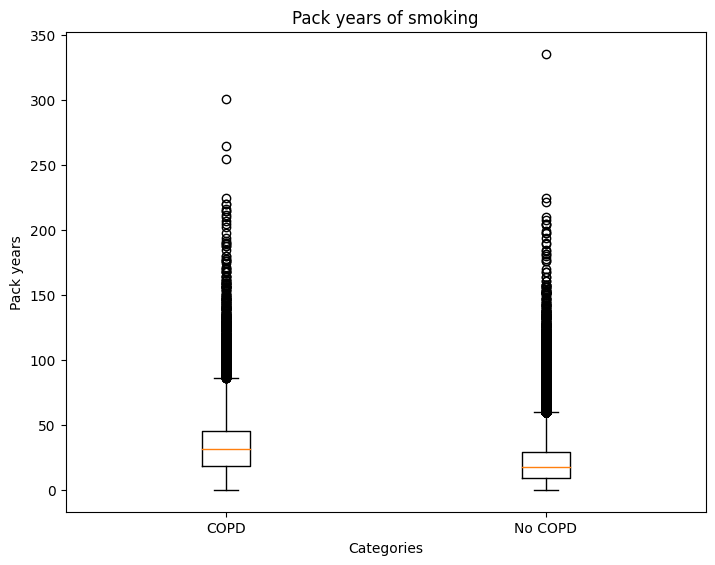

In [153]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title("Pack years of smoking")
ax.set_ylabel("Pack years")
ax.set_xlabel("Categories")
# Creating plot
bp = ax.boxplot(data, labels=['COPD', 'No COPD'])

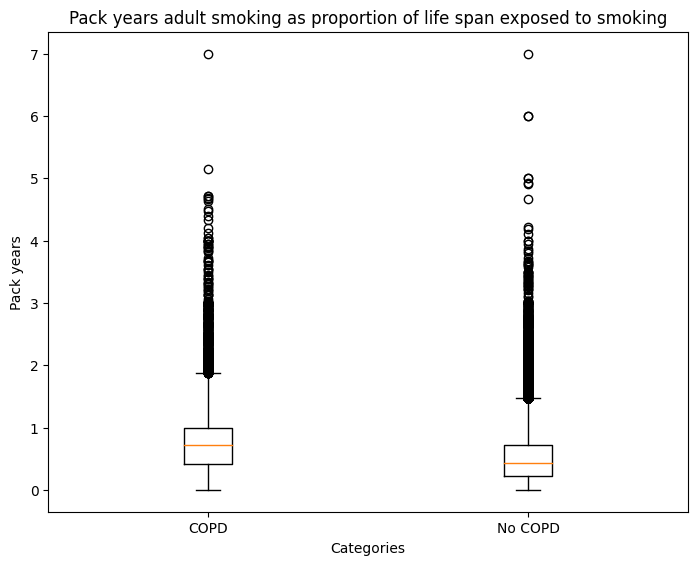

In [154]:
data = [[x for x in df["Pack years adult smoking as proportion of life span exposed to smoking"].loc[((df["all_copd"] == 1) )].tolist() if str(x) != 'nan' ], 
        [x for x in df["Pack years adult smoking as proportion of life span exposed to smoking"].loc[((df["all_copd"] == 0) )].tolist() if str(x) != 'nan' ]]

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title("Pack years adult smoking as proportion of life span exposed to smoking")
ax.set_ylabel("Pack years")
ax.set_xlabel("Categories")
# Creating plot
bp = ax.boxplot(data, labels=['COPD', 'No COPD'])

In [155]:
df['Age started smoking in current smokers'] = df['Age started smoking in current smokers'].replace("Do not know", pd.np.nan)
df['Age started smoking in current smokers'] = df['Age started smoking in current smokers'].replace("Prefer not to answer", pd.np.nan)

C:\Users\keimp\AppData\Local\Temp\ipykernel_8204\3369915718.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['Age started smoking in current smokers'] = df['Age started smoking in current smokers'].replace("Do not know", pd.np.nan)
C:\Users\keimp\AppData\Local\Temp\ipykernel_8204\3369915718.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['Age started smoking in current smokers'] = df['Age started smoking in current smokers'].replace("Prefer not to answer", pd.np.nan)


In [156]:
df["Age started smoking in current smokers"] = pd.to_numeric(df["Age started smoking in current smokers"])

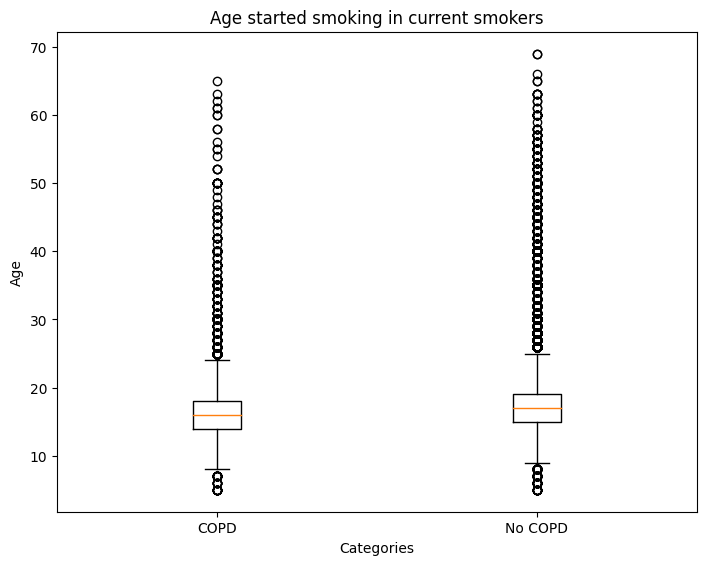

In [157]:
data = [[x for x in df["Age started smoking in current smokers"].loc[((df["all_copd"] == 1) )].tolist() if str(x) != 'nan' ], 
        [x for x in df["Age started smoking in current smokers"].loc[((df["all_copd"] == 0) )].tolist() if str(x) != 'nan' ]]

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title("Age started smoking in current smokers")
ax.set_ylabel("Age")
ax.set_xlabel("Categories")
# Creating plot
bp = ax.boxplot(data, labels=['COPD', 'No COPD'])

In [158]:
df['Age started smoking in former smokers'] = df['Age started smoking in former smokers'].replace("Do not know", pd.np.nan)
df['Age started smoking in former smokers'] = df['Age started smoking in former smokers'].replace("Prefer not to answer", pd.np.nan)

C:\Users\keimp\AppData\Local\Temp\ipykernel_8204\3830649293.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['Age started smoking in former smokers'] = df['Age started smoking in former smokers'].replace("Do not know", pd.np.nan)
C:\Users\keimp\AppData\Local\Temp\ipykernel_8204\3830649293.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['Age started smoking in former smokers'] = df['Age started smoking in former smokers'].replace("Prefer not to answer", pd.np.nan)


In [159]:
df["Age started smoking in former smokers"] = pd.to_numeric(df["Age started smoking in former smokers"])

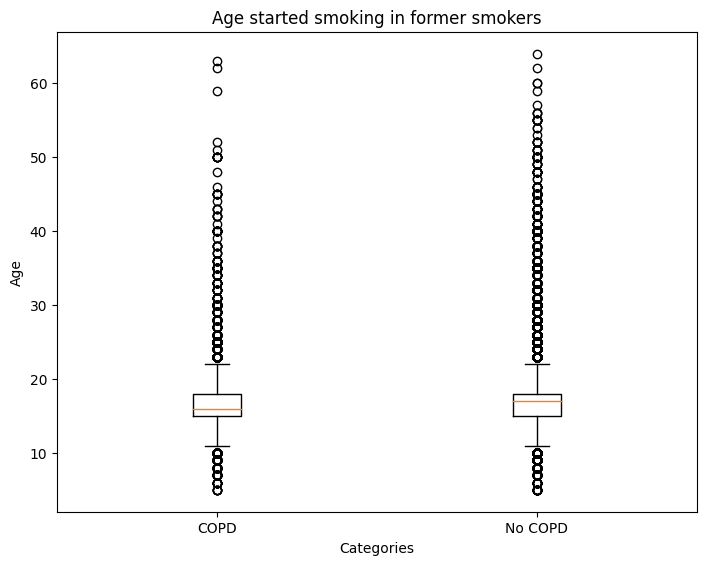

In [160]:
data = [[x for x in df["Age started smoking in former smokers"].loc[((df["all_copd"] == 1) )].tolist() if str(x) != 'nan' ], 
        [x for x in df["Age started smoking in former smokers"].loc[((df["all_copd"] == 0) )].tolist() if str(x) != 'nan' ]]

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title("Age started smoking in former smokers")
ax.set_ylabel("Age")
ax.set_xlabel("Categories")
# Creating plot
bp = ax.boxplot(data, labels=['COPD', 'No COPD'])

In [161]:
df['Number of cigarettes currently smoked daily (current cigarette smokers)'] = df['Number of cigarettes currently smoked daily (current cigarette smokers)'].replace("Do not know", pd.np.nan)
df['Number of cigarettes currently smoked daily (current cigarette smokers)'] = df['Number of cigarettes currently smoked daily (current cigarette smokers)'].replace("Prefer not to answer", pd.np.nan)
df['Number of cigarettes currently smoked daily (current cigarette smokers)'] = df['Number of cigarettes currently smoked daily (current cigarette smokers)'].replace("Less than one a day", pd.np.nan)
df["Number of cigarettes currently smoked daily (current cigarette smokers)"] = pd.to_numeric(df["Number of cigarettes currently smoked daily (current cigarette smokers)"])

C:\Users\keimp\AppData\Local\Temp\ipykernel_8204\2508925156.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['Number of cigarettes currently smoked daily (current cigarette smokers)'] = df['Number of cigarettes currently smoked daily (current cigarette smokers)'].replace("Do not know", pd.np.nan)
C:\Users\keimp\AppData\Local\Temp\ipykernel_8204\2508925156.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['Number of cigarettes currently smoked daily (current cigarette smokers)'] = df['Number of cigarettes currently smoked daily (current cigarette smokers)'].replace("Prefer not to answer", pd.np.nan)
C:\Users\keimp\AppData\Local\Temp\ipykernel_8204\2508925156.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['

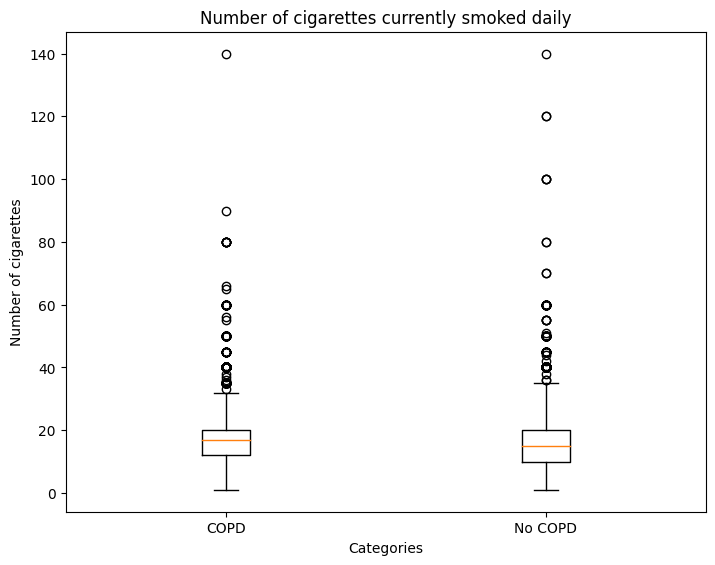

In [162]:
data = [[x for x in df["Number of cigarettes currently smoked daily (current cigarette smokers)"].loc[((df["all_copd"] == 1) )].tolist() if str(x) != 'nan' ], 
        [x for x in df["Number of cigarettes currently smoked daily (current cigarette smokers)"].loc[((df["all_copd"] == 0) )].tolist() if str(x) != 'nan' ]]

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title("Number of cigarettes currently smoked daily")
ax.set_ylabel("Number of cigarettes")
ax.set_xlabel("Categories")
# Creating plot
bp = ax.boxplot(data, labels=['COPD', 'No COPD'])

In [163]:
df['Number of cigarettes previously smoked daily'] = df['Number of cigarettes previously smoked daily'].replace("Do not know", pd.np.nan)
df['Number of cigarettes previously smoked daily'] = df['Number of cigarettes previously smoked daily'].replace("Prefer not to answer", pd.np.nan)
df['Number of cigarettes previously smoked daily'] = df['Number of cigarettes previously smoked daily'].replace("Less than one a day", pd.np.nan)
df["Number of cigarettes previously smoked daily"] = pd.to_numeric(df["Number of cigarettes previously smoked daily"])

C:\Users\keimp\AppData\Local\Temp\ipykernel_8204\2716117839.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['Number of cigarettes previously smoked daily'] = df['Number of cigarettes previously smoked daily'].replace("Do not know", pd.np.nan)
C:\Users\keimp\AppData\Local\Temp\ipykernel_8204\2716117839.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['Number of cigarettes previously smoked daily'] = df['Number of cigarettes previously smoked daily'].replace("Prefer not to answer", pd.np.nan)
C:\Users\keimp\AppData\Local\Temp\ipykernel_8204\2716117839.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['Number of cigarettes previously smoked daily'] = df['Number of cigarettes previously smoked daily'].replace(

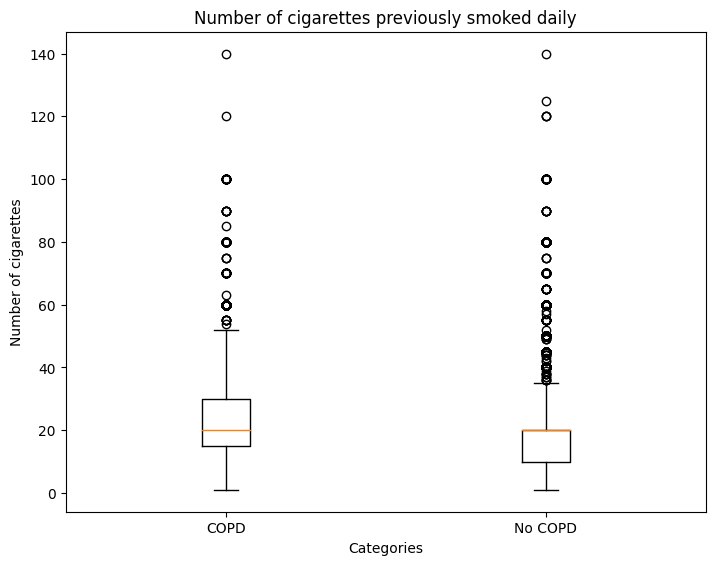

In [164]:
data = [[x for x in df["Number of cigarettes previously smoked daily"].loc[((df["all_copd"] == 1) )].tolist() if str(x) != 'nan' ], 
        [x for x in df["Number of cigarettes previously smoked daily"].loc[((df["all_copd"] == 0) )].tolist() if str(x) != 'nan' ]]

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title("Number of cigarettes previously smoked daily")
ax.set_ylabel("Number of cigarettes")
ax.set_xlabel("Categories")
# Creating plot
bp = ax.boxplot(data, labels=['COPD', 'No COPD'])

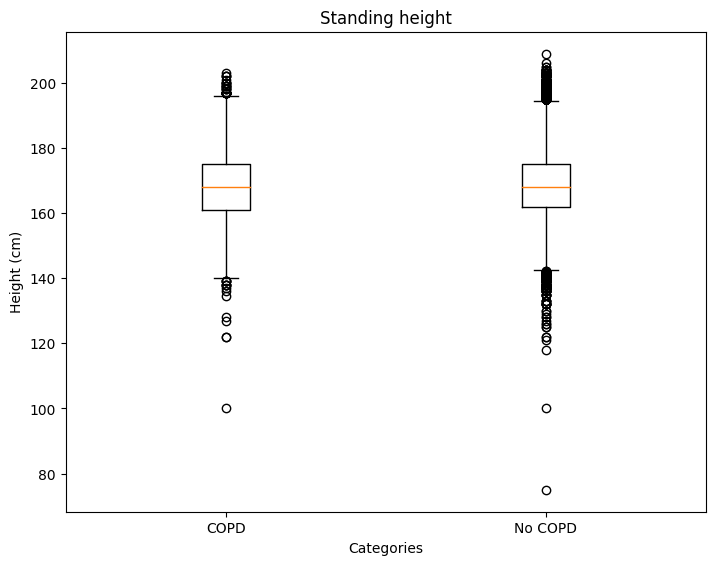

In [165]:
data = [[x for x in df["Standing height | Instance 0"].loc[((df["all_copd"] == 1) )].tolist() if str(x) != 'nan' ], 
        [x for x in df["Standing height | Instance 0"].loc[((df["all_copd"] == 0) )].tolist() if str(x) != 'nan' ]]

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title("Standing height")
ax.set_ylabel("Height (cm)")
ax.set_xlabel("Categories")
# Creating plot
bp = ax.boxplot(data, labels=['COPD', 'No COPD'])

#### Modeling test 

In [166]:
datacolumns_selected =[
 'Pack years of smoking',
 'Pack years adult smoking as proportion of life span exposed to smoking'
]

Date J40 first reported (bronchitis, not specified as acute or chronic)_binary
Number of missing values: 
 Pack years of smoking                                                             0
Pack years adult smoking as proportion of life span exposed to smoking            0
Date J40 first reported (bronchitis, not specified as acute or chronic)_binary    0
dtype: int64
Dataframe dimensions:  (7372, 3)


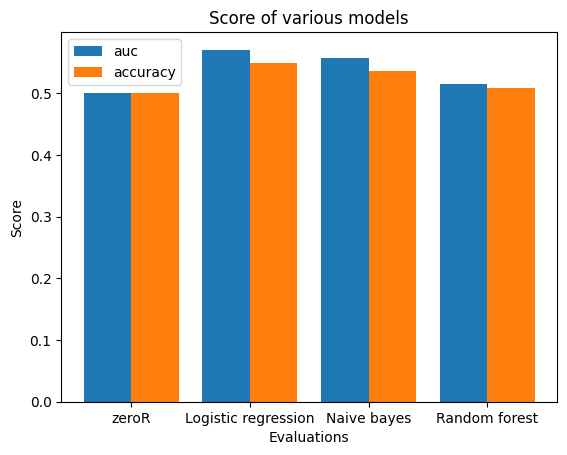

F1:  0.49296510135459487 0.3933041515240232 0.5073625746425313
auc:  [0.5, 0.5704868118099723, 0.5571754282547455, 0.5152350670319206]
accuracy:  [0.5, 0.5486974679759906, 0.5359484856150679, 0.5088173309109307]




Date J41 first reported (simple and mucopurulent chronic bronchitis)_binary
Number of missing values: 
 Pack years of smoking                                                          0
Pack years adult smoking as proportion of life span exposed to smoking         0
Date J41 first reported (simple and mucopurulent chronic bronchitis)_binary    0
dtype: int64
Dataframe dimensions:  (218, 3)


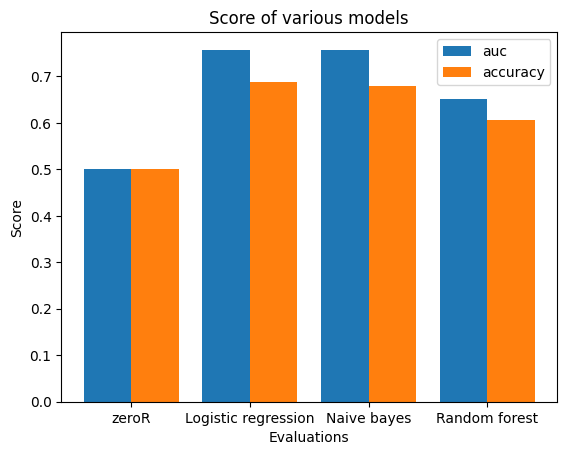

F1:  0.6747840531561462 0.6348178137651822 0.5943611001935498
auc:  [0.5, 0.7570838252656434, 0.7574773711137347, 0.650767414403778]
accuracy:  [0.5, 0.687737843551797, 0.6789640591966173, 0.6056025369978858]




Date J42 first reported (unspecified chronic bronchitis)_binary
Number of missing values: 
 Pack years of smoking                                                     0
Pack years adult smoking as proportion of life span exposed to smoking    0
Date J42 first reported (unspecified chronic bronchitis)_binary           0
dtype: int64
Dataframe dimensions:  (822, 3)


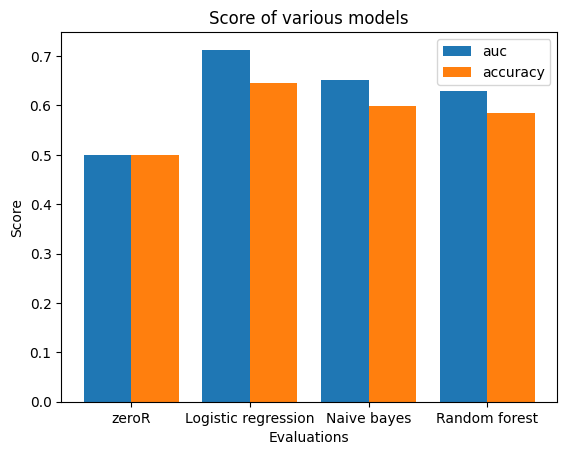

F1:  0.6073555549245357 0.4861024410584528 0.5866529175187588
auc:  [0.5, 0.7129482235903758, 0.65186044594798, 0.6293302896296668]
accuracy:  [0.5, 0.6447524020694753, 0.598640059127864, 0.5839246119733925]




Date J43 first reported (emphysema)_binary
Number of missing values: 
 Pack years of smoking                                                     0
Pack years adult smoking as proportion of life span exposed to smoking    0
Date J43 first reported (emphysema)_binary                                0
dtype: int64
Dataframe dimensions:  (9310, 3)


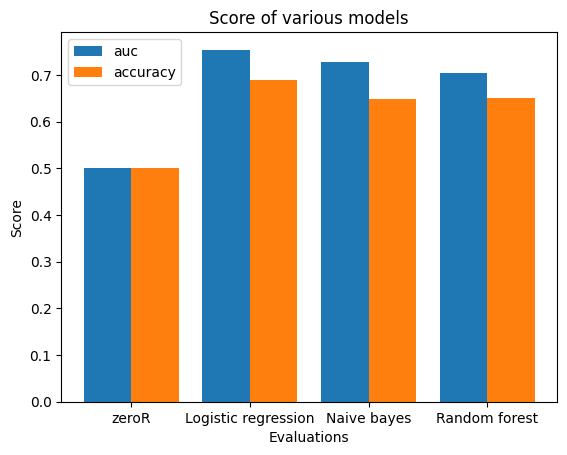

F1:  0.6697286277230041 0.5845706670703876 0.6583281957866933
auc:  [0.5, 0.7540181203353634, 0.7282699613849724, 0.7048570482520556]
accuracy:  [0.5, 0.6901181525241675, 0.6484425349087003, 0.6511278195488722]




Date J44 first reported (other chronic obstructive pulmonary disease)_binary
Number of missing values: 
 Pack years of smoking                                                           0
Pack years adult smoking as proportion of life span exposed to smoking          0
Date J44 first reported (other chronic obstructive pulmonary disease)_binary    0
dtype: int64
Dataframe dimensions:  (36790, 3)


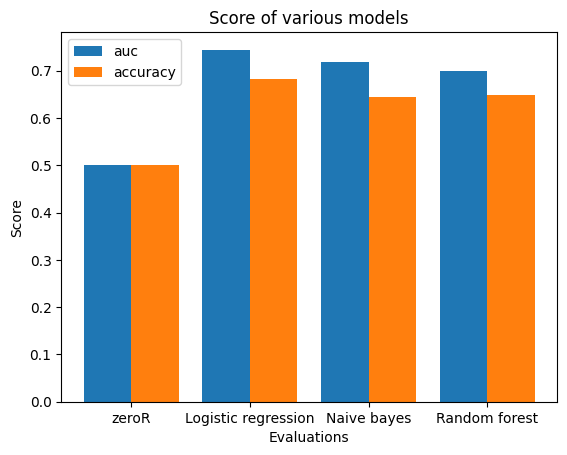

F1:  0.6571041642407955 0.5692315789543815 0.654652588921925
auc:  [0.5, 0.7441978121824677, 0.719095317110602, 0.6998640787272089]
accuracy:  [0.5, 0.6814895351997825, 0.645093775482468, 0.6492796955694482]




Date J47 first reported (bronchiectasis)_binary
Number of missing values: 
 Pack years of smoking                                                     0
Pack years adult smoking as proportion of life span exposed to smoking    0
Date J47 first reported (bronchiectasis)_binary                           0
dtype: int64
Dataframe dimensions:  (5452, 3)


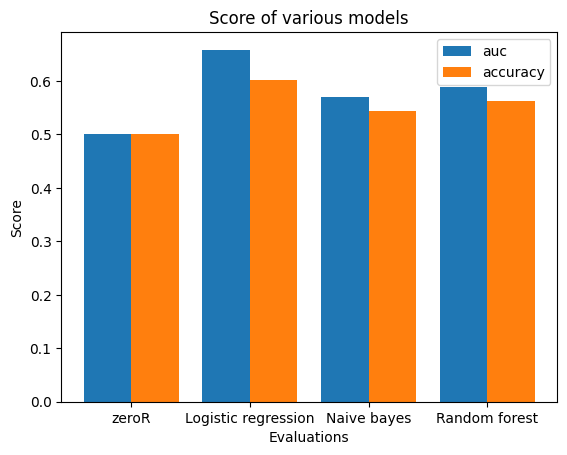

F1:  0.5691933943888826 0.38737558342341005 0.5670122849868511
auc:  [0.5, 0.6583797925274232, 0.5698396719852826, 0.588967947407641]
accuracy:  [0.5, 0.6016061352685441, 0.5441998335001135, 0.5618124942187539]






In [167]:
c = ['Date J40 first reported (bronchitis, not specified as acute or chronic)_binary',
 'Date J41 first reported (simple and mucopurulent chronic bronchitis)_binary',
 'Date J42 first reported (unspecified chronic bronchitis)_binary',
 'Date J43 first reported (emphysema)_binary',
 'Date J44 first reported (other chronic obstructive pulmonary disease)_binary',
 'Date J47 first reported (bronchiectasis)_binary']
for i in c:
    print(i)
    datacolumns_selected_lab = datacolumns_selected+[i]
    cohort = df[datacolumns_selected_lab].dropna()
    cohort = pd.concat([cohort[(cohort[i] == 1)],
                        cohort[(cohort[i] == 0)].sample(
                        cohort[(cohort[i] == 1)].shape[0]
                        )])
    cohort = cohort[datacolumns_selected_lab]
    emp.pipeline(cohort, i, datacolumns_selected,0.25, splits=5)
    print("\n\n\n")

In [168]:
datacolumns_selected =[
 'Pack years of smoking',
 'Pack years adult smoking as proportion of life span exposed to smoking',
'Sex',
'Age at recruitment',
'Body mass index (BMI) | Instance 0',
'Standing height | Instance 0',
'allergy',
 'rhinitis',
 'eczema',
]

In [169]:
df["Sex"] = df["Sex"].apply(dp.sex_to_binary)

Date J40 first reported (bronchitis, not specified as acute or chronic)_binary
Number of missing values: 
 Pack years of smoking                                                             0
Pack years adult smoking as proportion of life span exposed to smoking            0
Sex                                                                               0
Age at recruitment                                                                0
Body mass index (BMI) | Instance 0                                                0
Standing height | Instance 0                                                      0
allergy                                                                           0
rhinitis                                                                          0
eczema                                                                            0
Date J40 first reported (bronchitis, not specified as acute or chronic)_binary    0
dtype: int64
Dataframe dimensions:  (7332, 10)


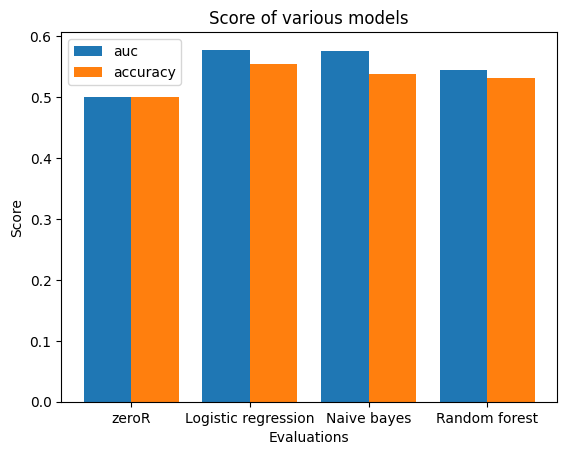

F1:  0.544569659913926 0.3649691384464686 0.5198838922167202
auc:  [0.5, 0.5776837974791225, 0.5756025244670789, 0.5449605290335809]
accuracy:  [0.5, 0.5549636337766469, 0.5386008326893336, 0.5310975150444848]




Date J41 first reported (simple and mucopurulent chronic bronchitis)_binary
Number of missing values: 
 Pack years of smoking                                                          0
Pack years adult smoking as proportion of life span exposed to smoking         0
Sex                                                                            0
Age at recruitment                                                             0
Body mass index (BMI) | Instance 0                                             0
Standing height | Instance 0                                                   0
allergy                                                                        0
rhinitis                                                                       0
eczema                            

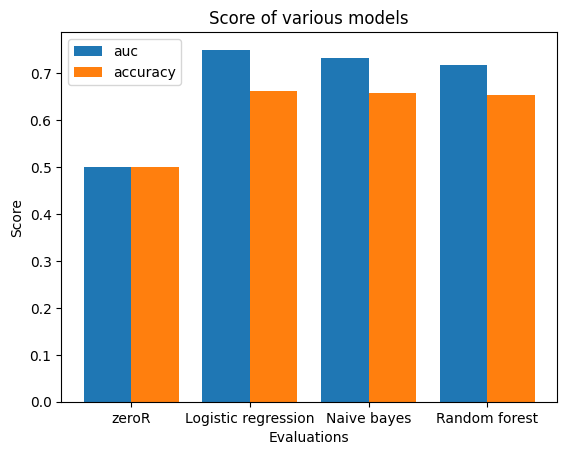

F1:  0.6602782754259006 0.6428854307924076 0.6642435084295549
auc:  [0.5, 0.7503345139708777, 0.731857536402991, 0.7183589138134593]
accuracy:  [0.5, 0.6620507399577167, 0.6571881606765327, 0.6528541226215645]




Date J42 first reported (unspecified chronic bronchitis)_binary
Number of missing values: 
 Pack years of smoking                                                     0
Pack years adult smoking as proportion of life span exposed to smoking    0
Sex                                                                       0
Age at recruitment                                                        0
Body mass index (BMI) | Instance 0                                        0
Standing height | Instance 0                                              0
allergy                                                                   0
rhinitis                                                                  0
eczema                                                                    0
Date J42 f

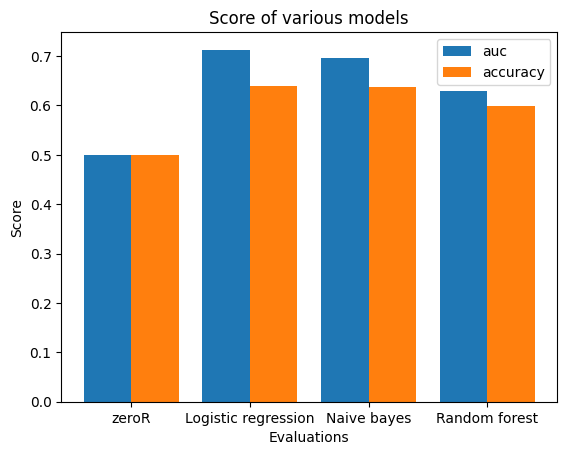

F1:  0.6355741118752346 0.5896425084486411 0.596968013476235
auc:  [0.5, 0.7128181679622009, 0.6958542905044962, 0.6297210791037952]
accuracy:  [0.5, 0.6395061728395062, 0.6382716049382716, 0.5987654320987654]




Date J43 first reported (emphysema)_binary
Number of missing values: 
 Pack years of smoking                                                     0
Pack years adult smoking as proportion of life span exposed to smoking    0
Sex                                                                       0
Age at recruitment                                                        0
Body mass index (BMI) | Instance 0                                        0
Standing height | Instance 0                                              0
allergy                                                                   0
rhinitis                                                                  0
eczema                                                                    0
Date J43 first reported (emphys

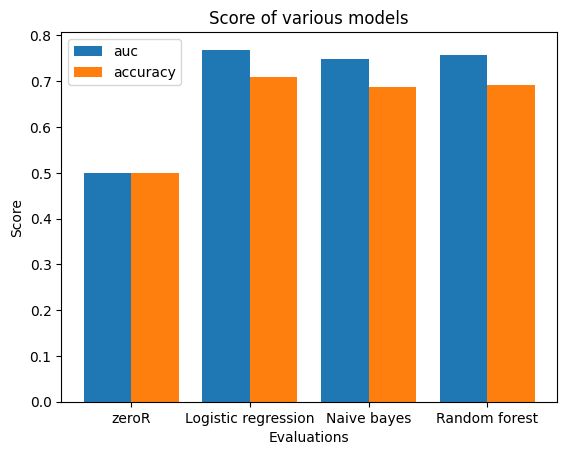

F1:  0.7093416004918424 0.721467015883255 0.6964662088037501
auc:  [0.5, 0.7688957675738484, 0.7495578274181, 0.7574702745471793]
accuracy:  [0.5, 0.7093831481143998, 0.6874436838308973, 0.6926578282939982]




Date J44 first reported (other chronic obstructive pulmonary disease)_binary
Number of missing values: 
 Pack years of smoking                                                           0
Pack years adult smoking as proportion of life span exposed to smoking          0
Sex                                                                             0
Age at recruitment                                                              0
Body mass index (BMI) | Instance 0                                              0
Standing height | Instance 0                                                    0
allergy                                                                         0
rhinitis                                                                        0
eczema                      

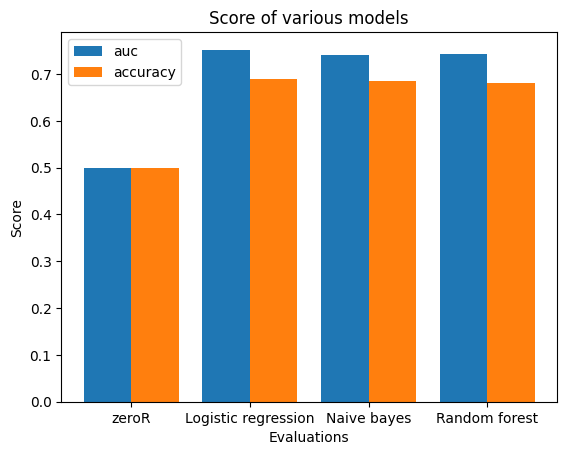

F1:  0.6838715699701414 0.7033806598785305 0.6836148386561185
auc:  [0.5, 0.7520145513826832, 0.7405474052046854, 0.7425611641106147]
accuracy:  [0.5, 0.6893956043956044, 0.685054945054945, 0.6810989010989011]




Date J47 first reported (bronchiectasis)_binary
Number of missing values: 
 Pack years of smoking                                                     0
Pack years adult smoking as proportion of life span exposed to smoking    0
Sex                                                                       0
Age at recruitment                                                        0
Body mass index (BMI) | Instance 0                                        0
Standing height | Instance 0                                              0
allergy                                                                   0
rhinitis                                                                  0
eczema                                                                    0
Date J47 first reported (b

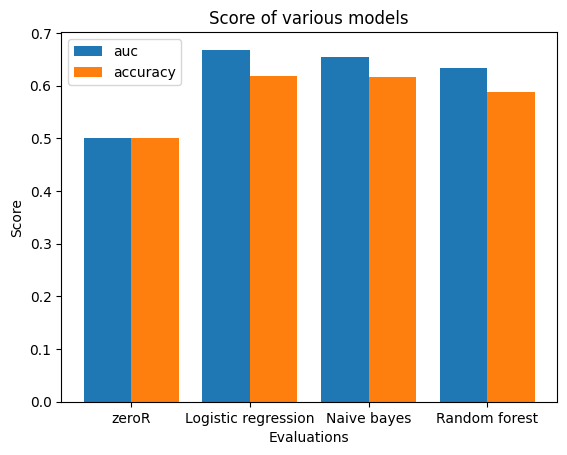

F1:  0.6411410087713615 0.6793858248350493 0.5954262768854437
auc:  [0.5, 0.6679512063374313, 0.6535337213496547, 0.6327888415158365]
accuracy:  [0.5, 0.6189711336547787, 0.6158149053493264, 0.5870486457434329]






In [170]:
for i in c:
    print(i)
    datacolumns_selected_lab = datacolumns_selected+[i]
    cohort = df[datacolumns_selected_lab].dropna()
    cohort = pd.concat([cohort[(cohort[i] == 1)],
                        cohort[(cohort[i] == 0)].sample(
                        cohort[(cohort[i] == 1)].shape[0]
                        )])
    cohort = cohort[datacolumns_selected_lab]
    emp.pipeline(cohort, i, datacolumns_selected,0.25, splits=5)
    print("\n\n\n")

In [171]:
datacolumns_selected =[
 'Pack years of smoking',
 'Pack years adult smoking as proportion of life span exposed to smoking',
'Sex',
'Age started smoking in current smokers',
'Number of cigarettes currently smoked daily (current cigarette smokers)',
'Age at recruitment',
'Body mass index (BMI) | Instance 0',
'Standing height | Instance 0',
'allergy',
 'rhinitis',
 'eczema',
]

Date J40 first reported (bronchitis, not specified as acute or chronic)_binary
Number of missing values: 
 Pack years of smoking                                                             0
Pack years adult smoking as proportion of life span exposed to smoking            0
Sex                                                                               0
Age started smoking in current smokers                                            0
Number of cigarettes currently smoked daily (current cigarette smokers)           0
Age at recruitment                                                                0
Body mass index (BMI) | Instance 0                                                0
Standing height | Instance 0                                                      0
allergy                                                                           0
rhinitis                                                                          0
eczema                                               

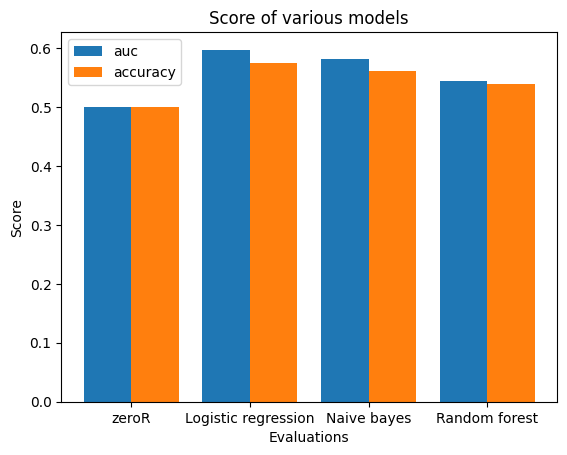

F1:  0.5906129626472693 0.5692475623310044 0.5270560307554047
auc:  [0.5, 0.5969850015304561, 0.5820018365472911, 0.5434624017957351]
accuracy:  [0.5, 0.5737373737373738, 0.5611111111111111, 0.5388888888888889]




Date J41 first reported (simple and mucopurulent chronic bronchitis)_binary
Number of missing values: 
 Pack years of smoking                                                          0
Pack years adult smoking as proportion of life span exposed to smoking         0
Sex                                                                            0
Age started smoking in current smokers                                         0
Number of cigarettes currently smoked daily (current cigarette smokers)        0
Age at recruitment                                                             0
Body mass index (BMI) | Instance 0                                             0
Standing height | Instance 0                                                   0
allergy                          

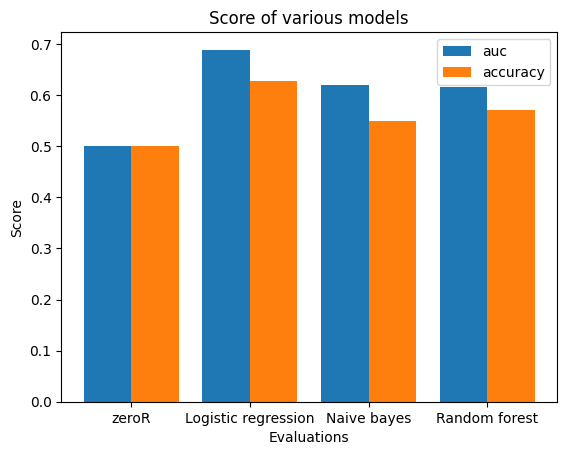

F1:  0.6334217506631299 0.6731527656221526 0.5768164246541528
auc:  [0.5, 0.6887074829931973, 0.6193197278911565, 0.6150340136054422]
accuracy:  [0.5, 0.6275862068965518, 0.5497536945812808, 0.5714285714285714]




Date J42 first reported (unspecified chronic bronchitis)_binary
Number of missing values: 
 Pack years of smoking                                                      0
Pack years adult smoking as proportion of life span exposed to smoking     0
Sex                                                                        0
Age started smoking in current smokers                                     0
Number of cigarettes currently smoked daily (current cigarette smokers)    0
Age at recruitment                                                         0
Body mass index (BMI) | Instance 0                                         0
Standing height | Instance 0                                               0
allergy                                                                    0


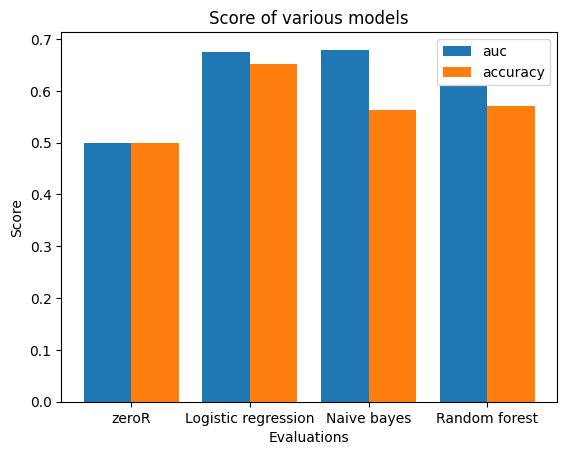

F1:  0.6533649071881444 0.6418660022148394 0.5503603136169722
auc:  [0.5, 0.6747991377621008, 0.6793699784440526, 0.6095825984714873]
accuracy:  [0.5, 0.650976430976431, 0.5628282828282828, 0.5698989898989899]




Date J43 first reported (emphysema)_binary
Number of missing values: 
 Pack years of smoking                                                      0
Pack years adult smoking as proportion of life span exposed to smoking     0
Sex                                                                        0
Age started smoking in current smokers                                     0
Number of cigarettes currently smoked daily (current cigarette smokers)    0
Age at recruitment                                                         0
Body mass index (BMI) | Instance 0                                         0
Standing height | Instance 0                                               0
allergy                                                                    0
rhinitis              

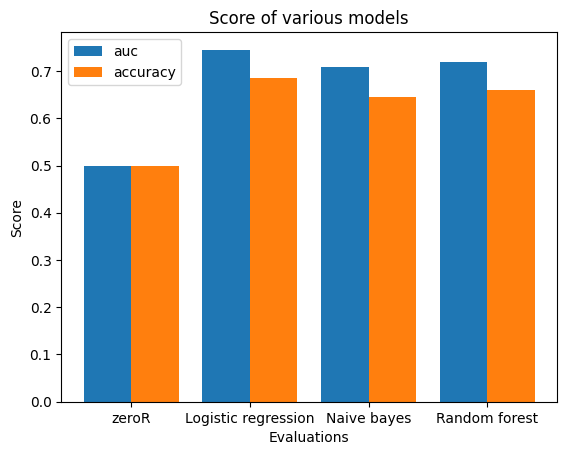

F1:  0.6961925481871547 0.7108297570212285 0.6660234646747708
auc:  [0.5, 0.7452261306532663, 0.7095445901583662, 0.7194235070393931]
accuracy:  [0.5, 0.6846095256154988, 0.6451215195474226, 0.6609658354666413]




Date J44 first reported (other chronic obstructive pulmonary disease)_binary
Number of missing values: 
 Pack years of smoking                                                           0
Pack years adult smoking as proportion of life span exposed to smoking          0
Sex                                                                             0
Age started smoking in current smokers                                          0
Number of cigarettes currently smoked daily (current cigarette smokers)         0
Age at recruitment                                                              0
Body mass index (BMI) | Instance 0                                              0
Standing height | Instance 0                                                    0
allergy                 

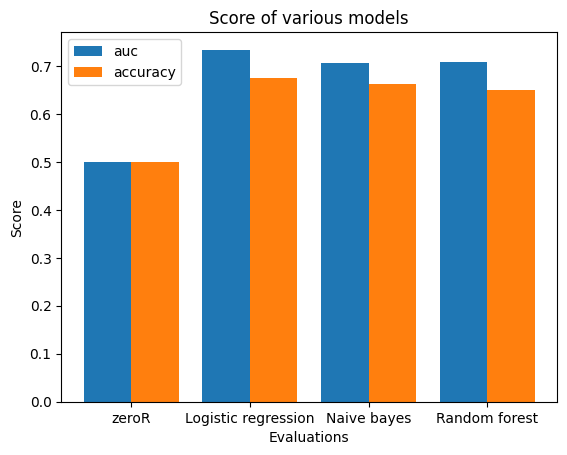

F1:  0.6845843729336757 0.6995409409446863 0.6566157668321648
auc:  [0.5, 0.7338158291587356, 0.7067461108073219, 0.7081712329198463]
accuracy:  [0.5, 0.6746826983169933, 0.6618128227506453, 0.6505693534754514]




Date J47 first reported (bronchiectasis)_binary
Number of missing values: 
 Pack years of smoking                                                      0
Pack years adult smoking as proportion of life span exposed to smoking     0
Sex                                                                        0
Age started smoking in current smokers                                     0
Number of cigarettes currently smoked daily (current cigarette smokers)    0
Age at recruitment                                                         0
Body mass index (BMI) | Instance 0                                         0
Standing height | Instance 0                                               0
allergy                                                                    0
rhinitis        

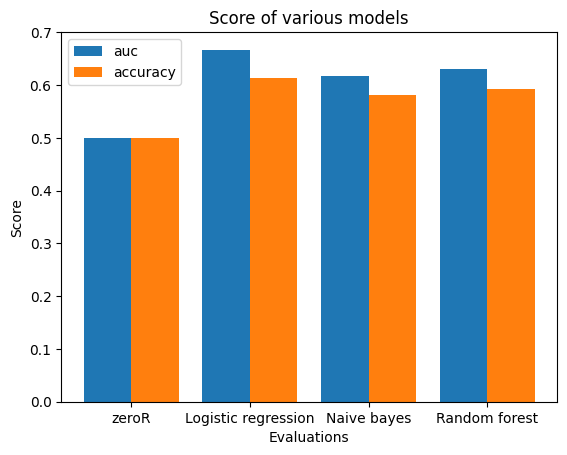

F1:  0.6263132599162488 0.5656807965804924 0.5946243509764381
auc:  [0.5, 0.666978480247922, 0.6171991597954869, 0.6305230021368717]
accuracy:  [0.5, 0.6143244837758112, 0.5815889872173058, 0.592188790560472]






In [172]:
for i in c:
    print(i)
    datacolumns_selected_lab = datacolumns_selected+[i]
    cohort = df[datacolumns_selected_lab].dropna()
    cohort = pd.concat([cohort[(cohort[i] == 1)],
                        cohort[(cohort[i] == 0)].sample(
                        cohort[(cohort[i] == 1)].shape[0]
                        )])
    cohort = cohort[datacolumns_selected_lab]
    emp.pipeline(cohort, i, datacolumns_selected,0.25, splits=5)
    print("\n\n\n")

In [173]:
datacolumns_selected =[
 'Pack years of smoking',
 'Pack years adult smoking as proportion of life span exposed to smoking',
'Sex',
'Number of cigarettes previously smoked daily',
'Age at recruitment',
'Body mass index (BMI) | Instance 0',
'Standing height | Instance 0',
'allergy',
 'rhinitis',
 'eczema',
]

Date J40 first reported (bronchitis, not specified as acute or chronic)_binary
Number of missing values: 
 Pack years of smoking                                                             0
Pack years adult smoking as proportion of life span exposed to smoking            0
Sex                                                                               0
Number of cigarettes previously smoked daily                                      0
Age at recruitment                                                                0
Body mass index (BMI) | Instance 0                                                0
Standing height | Instance 0                                                      0
allergy                                                                           0
rhinitis                                                                          0
eczema                                                                            0
Date J40 first reported (bronchitis, not specified as

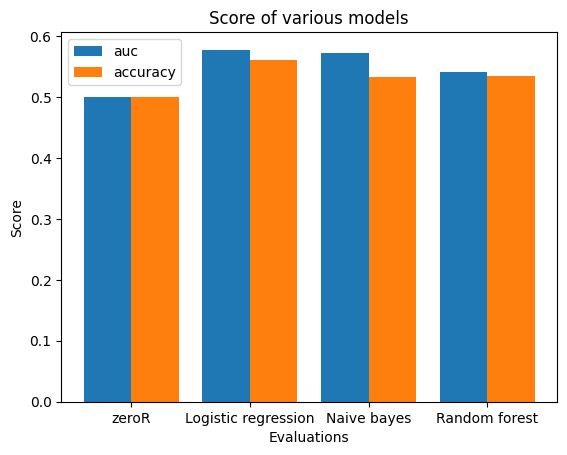

F1:  0.5608155419289944 0.37596893234171874 0.524989841006699
auc:  [0.5, 0.5776461728696521, 0.5714744517257436, 0.541879789236675]
accuracy:  [0.5, 0.5603572748097244, 0.5334528559816745, 0.5342170989433237]




Date J41 first reported (simple and mucopurulent chronic bronchitis)_binary
Number of missing values: 
 Pack years of smoking                                                          0
Pack years adult smoking as proportion of life span exposed to smoking         0
Sex                                                                            0
Number of cigarettes previously smoked daily                                   0
Age at recruitment                                                             0
Body mass index (BMI) | Instance 0                                             0
Standing height | Instance 0                                                   0
allergy                                                                        0
rhinitis                          

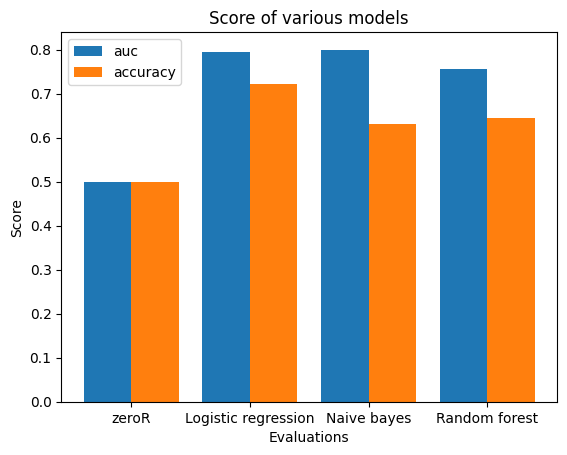

F1:  0.7073593073593073 0.6103540903540903 0.6455128205128204
auc:  [0.5, 0.7959183673469388, 0.7999999999999999, 0.7561224489795918]
accuracy:  [0.5, 0.721978021978022, 0.6318681318681318, 0.6450549450549451]




Date J42 first reported (unspecified chronic bronchitis)_binary
Number of missing values: 
 Pack years of smoking                                                     0
Pack years adult smoking as proportion of life span exposed to smoking    0
Sex                                                                       0
Number of cigarettes previously smoked daily                              0
Age at recruitment                                                        0
Body mass index (BMI) | Instance 0                                        0
Standing height | Instance 0                                              0
allergy                                                                   0
rhinitis                                                                  0
eczema    

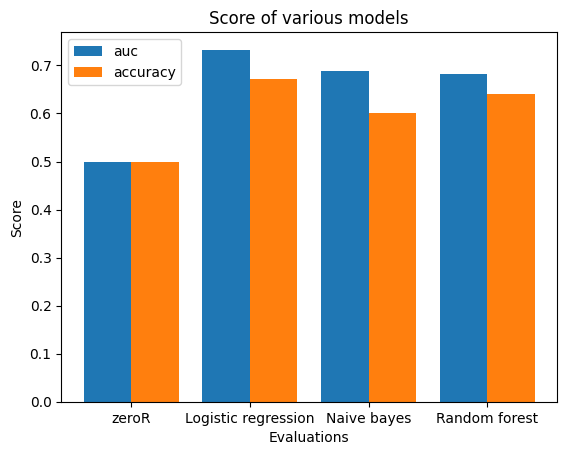

F1:  0.6757406024396316 0.6188568060148092 0.641407224344853
auc:  [0.5, 0.7327258746635908, 0.6882906574394464, 0.681923875432526]
accuracy:  [0.5, 0.6713647835371772, 0.6003688604154533, 0.639739856338575]




Date J43 first reported (emphysema)_binary
Number of missing values: 
 Pack years of smoking                                                     0
Pack years adult smoking as proportion of life span exposed to smoking    0
Sex                                                                       0
Number of cigarettes previously smoked daily                              0
Age at recruitment                                                        0
Body mass index (BMI) | Instance 0                                        0
Standing height | Instance 0                                              0
allergy                                                                   0
rhinitis                                                                  0
eczema                           

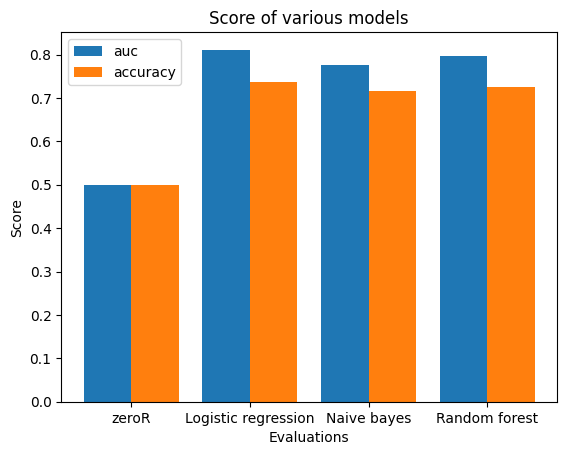

F1:  0.7348112522664564 0.7182554830119843 0.7257451616831939
auc:  [0.5, 0.8112112490429424, 0.7765966502714615, 0.796732730214613]
accuracy:  [0.5, 0.737644648947549, 0.7169528364715142, 0.7247863817077355]




Date J44 first reported (other chronic obstructive pulmonary disease)_binary
Number of missing values: 
 Pack years of smoking                                                           0
Pack years adult smoking as proportion of life span exposed to smoking          0
Sex                                                                             0
Number of cigarettes previously smoked daily                                    0
Age at recruitment                                                              0
Body mass index (BMI) | Instance 0                                              0
Standing height | Instance 0                                                    0
allergy                                                                         0
rhinitis                  

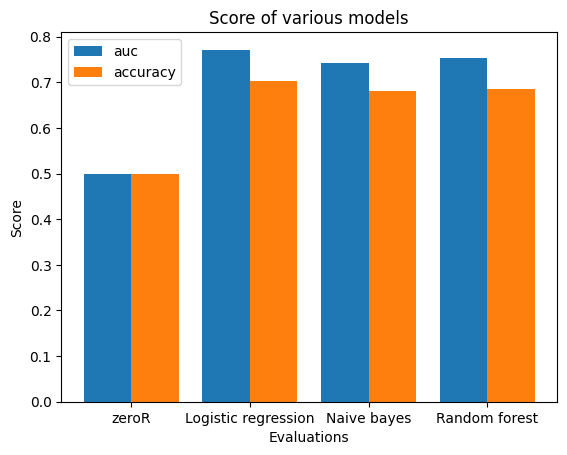

F1:  0.6993026434105934 0.6557414983435842 0.6851693432836296
auc:  [0.5, 0.7713255663825025, 0.7412843054691621, 0.753524910096209]
accuracy:  [0.5, 0.702821237935164, 0.680242354084938, 0.685441952923168]




Date J47 first reported (bronchiectasis)_binary
Number of missing values: 
 Pack years of smoking                                                     0
Pack years adult smoking as proportion of life span exposed to smoking    0
Sex                                                                       0
Number of cigarettes previously smoked daily                              0
Age at recruitment                                                        0
Body mass index (BMI) | Instance 0                                        0
Standing height | Instance 0                                              0
allergy                                                                   0
rhinitis                                                                  0
eczema                       

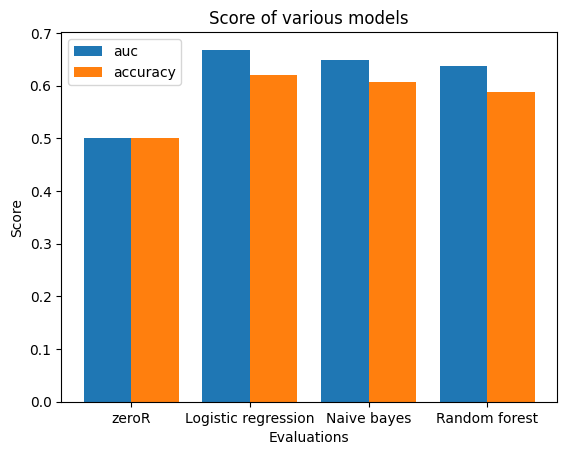

F1:  0.6356342969883592 0.6720856920792585 0.590715483619975
auc:  [0.5, 0.6682084473672407, 0.64882685824967, 0.6376498842134141]
accuracy:  [0.5, 0.6196776781365498, 0.6074684124573819, 0.5883222072601209]






In [174]:
for i in c:
    print(i)
    datacolumns_selected_lab = datacolumns_selected+[i]
    cohort = df[datacolumns_selected_lab].dropna()
    cohort = pd.concat([cohort[(cohort[i] == 1)],
                        cohort[(cohort[i] == 0)].sample(
                        cohort[(cohort[i] == 1)].shape[0]
                        )])
    cohort = cohort[datacolumns_selected_lab]
    emp.pipeline(cohort, i, datacolumns_selected,0.25, splits=5)
    print("\n\n\n")

In [175]:
datacolumns_selected =[
 'Pack years of smoking',
 'Pack years adult smoking as proportion of life span exposed to smoking',
'Sex',
'Number of cigarettes previously smoked daily',
'Age at recruitment',
'Body mass index (BMI) | Instance 0',
'Standing height | Instance 0',
'allergy',
 'rhinitis',
 'eczema',
'asbestosis',
 'chronic_sinusitis',
 'nasal_polyps',
 'nasal_sinus_disorder',
 'pneumonia',
 'Hayfever_allergic_rhinitis_eczema_doctor',
]

Date J40 first reported (bronchitis, not specified as acute or chronic)_binary
Number of missing values: 
 Pack years of smoking                                                             0
Pack years adult smoking as proportion of life span exposed to smoking            0
Sex                                                                               0
Number of cigarettes previously smoked daily                                      0
Age at recruitment                                                                0
Body mass index (BMI) | Instance 0                                                0
Standing height | Instance 0                                                      0
allergy                                                                           0
rhinitis                                                                          0
eczema                                                                            0
asbestosis                                           

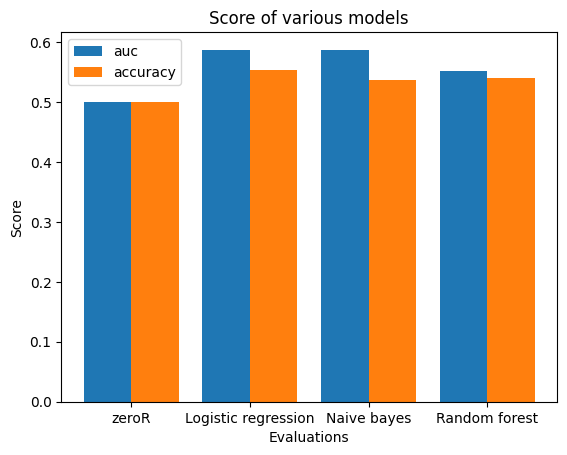

F1:  0.5215632311614964 0.24098697725931473 0.5209070142549399
auc:  [0.5, 0.5872196319662915, 0.5867997904575861, 0.5511839409022249]
accuracy:  [0.5, 0.5540174019064509, 0.5365198034434345, 0.5395994975245696]




Date J41 first reported (simple and mucopurulent chronic bronchitis)_binary
Number of missing values: 
 Pack years of smoking                                                          0
Pack years adult smoking as proportion of life span exposed to smoking         0
Sex                                                                            0
Number of cigarettes previously smoked daily                                   0
Age at recruitment                                                             0
Body mass index (BMI) | Instance 0                                             0
Standing height | Instance 0                                                   0
allergy                                                                        0
rhinitis                        

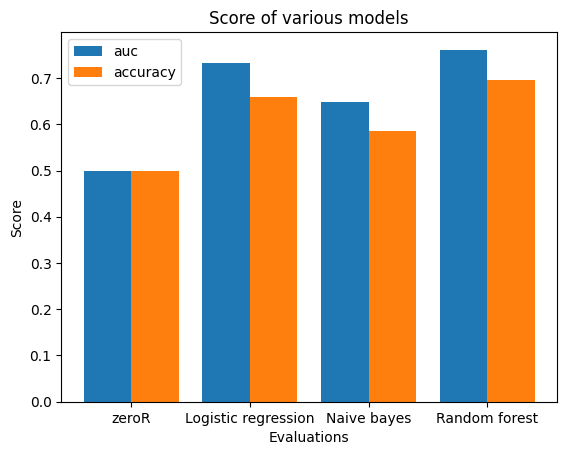

F1:  0.6608974358974359 0.5054545454545455 0.6925750719868367
auc:  [0.5, 0.7333333333333334, 0.648639455782313, 0.7612244897959184]
accuracy:  [0.5, 0.6593406593406593, 0.5857142857142857, 0.6956043956043956]




Date J42 first reported (unspecified chronic bronchitis)_binary
Number of missing values: 
 Pack years of smoking                                                     0
Pack years adult smoking as proportion of life span exposed to smoking    0
Sex                                                                       0
Number of cigarettes previously smoked daily                              0
Age at recruitment                                                        0
Body mass index (BMI) | Instance 0                                        0
Standing height | Instance 0                                              0
allergy                                                                   0
rhinitis                                                                  0
eczema    

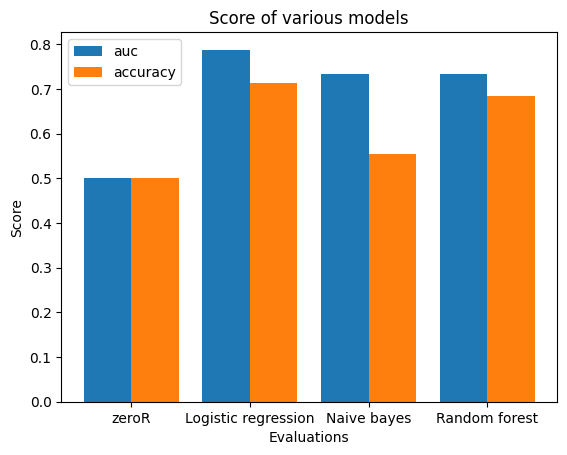

F1:  0.7148444216498272 0.2761133603238866 0.6835573811301967
auc:  [0.5, 0.7881414840445983, 0.7329327181853134, 0.7329111880046136]
accuracy:  [0.5, 0.7145602795573676, 0.5551543389633081, 0.6848961366724908]




Date J43 first reported (emphysema)_binary
Number of missing values: 
 Pack years of smoking                                                     0
Pack years adult smoking as proportion of life span exposed to smoking    0
Sex                                                                       0
Number of cigarettes previously smoked daily                              0
Age at recruitment                                                        0
Body mass index (BMI) | Instance 0                                        0
Standing height | Instance 0                                              0
allergy                                                                   0
rhinitis                                                                  0
eczema                        

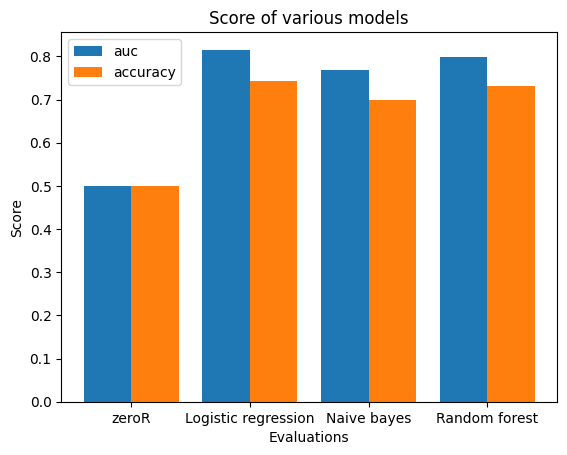

F1:  0.7407639328817491 0.7289691712866927 0.7313453367869981
auc:  [0.5, 0.8156516054764743, 0.7675340270847192, 0.7997527292105401]
accuracy:  [0.5, 0.7430685556295534, 0.6982615890698473, 0.7318179249661965]




Date J44 first reported (other chronic obstructive pulmonary disease)_binary
Number of missing values: 
 Pack years of smoking                                                           0
Pack years adult smoking as proportion of life span exposed to smoking          0
Sex                                                                             0
Number of cigarettes previously smoked daily                                    0
Age at recruitment                                                              0
Body mass index (BMI) | Instance 0                                              0
Standing height | Instance 0                                                    0
allergy                                                                         0
rhinitis                

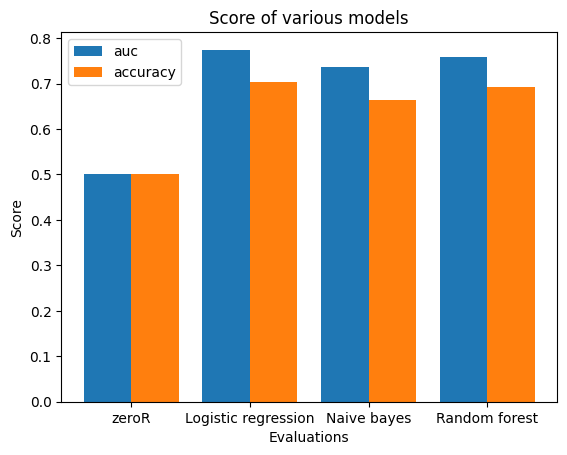

F1:  0.6998905185896578 0.6014421304458064 0.6918141080148785
auc:  [0.5, 0.7745209411610403, 0.7367269307974078, 0.7595712145114131]
accuracy:  [0.5, 0.7042171696542326, 0.6646925266528658, 0.6922778213277389]




Date J47 first reported (bronchiectasis)_binary
Number of missing values: 
 Pack years of smoking                                                     0
Pack years adult smoking as proportion of life span exposed to smoking    0
Sex                                                                       0
Number of cigarettes previously smoked daily                              0
Age at recruitment                                                        0
Body mass index (BMI) | Instance 0                                        0
Standing height | Instance 0                                              0
allergy                                                                   0
rhinitis                                                                  0
eczema                   

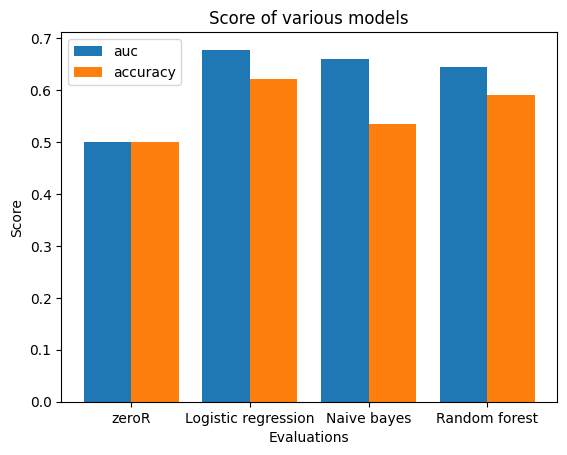

F1:  0.6382003981800202 0.2126804911644101 0.6010209210835915
auc:  [0.5, 0.6774650415424626, 0.6593188424009538, 0.6435379866249625]
accuracy:  [0.5, 0.6206374810188237, 0.5349448471478097, 0.589995988883477]






In [176]:
for i in c:
    print(i)
    datacolumns_selected_lab = datacolumns_selected+[i]
    cohort = df[datacolumns_selected_lab].dropna()
    cohort = pd.concat([cohort[(cohort[i] == 1)],
                        cohort[(cohort[i] == 0)].sample(
                        cohort[(cohort[i] == 1)].shape[0]
                        )])
    cohort = cohort[datacolumns_selected_lab]
    emp.pipeline(cohort, i, datacolumns_selected,0.25, splits=5)
    print("\n\n\n")

In [177]:
df = df.merge(pd.read_csv(copdp.bloodpressure), on= "Participant ID")
df = df.merge(pd.read_csv(copdp.blood_biomarkers), on= "Participant ID")

In [178]:
df = df.merge(pd.read_csv(copdp.alcohol), on= "Participant ID")
df = df.merge(pd.read_csv(copdp.physical_activity), on= "Participant ID")
df = df.merge(pd.read_csv(copdp.white_bloodcell), on= "Participant ID")

C:\Users\keimp\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3139: DtypeWarning: Columns (13,14,15,16,17,18,19,20,22,23,24,26,27,28,30,31,32,33,34,35,36,38,39,40,42,43,44,46,47,48,50,51,52,54,55,56,57,58,59,60,77,78) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\keimp\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3139: DtypeWarning: Columns (12,24,37,42,75) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [179]:
one_hot = pd.get_dummies(df['Usual walking pace | Instance 0'])
df = pd.concat([df, one_hot], axis=1)

In [180]:
datacolumns_selected =[
 'Pack years of smoking',
 'Pack years adult smoking as proportion of life span exposed to smoking',
'Sex',
'Number of cigarettes previously smoked daily',
'Age at recruitment',
'Body mass index (BMI) | Instance 0',
'Standing height | Instance 0',
'allergy',
 'rhinitis',
 'eczema',
'asbestosis',
 'chronic_sinusitis',
 'nasal_polyps',
 'nasal_sinus_disorder',
 'pneumonia',
 'Hayfever_allergic_rhinitis_eczema_doctor',
'Haemoglobin concentration | Instance 0',
'Diastolic blood pressure, automated reading | Instance 0 | Array 0',
 'Systolic blood pressure, automated reading | Instance 0 | Array 0',
'Brisk pace',
 'Slow pace',
 'Steady average pace',
'Summed MET minutes per week for all activity | Instance 0',
'Summed minutes activity | Instance 0'
]


Date J40 first reported (bronchitis, not specified as acute or chronic)_binary
Number of missing values: 
 Pack years of smoking                                                             0
Pack years adult smoking as proportion of life span exposed to smoking            0
Sex                                                                               0
Number of cigarettes previously smoked daily                                      0
Age at recruitment                                                                0
Body mass index (BMI) | Instance 0                                                0
Standing height | Instance 0                                                      0
allergy                                                                           0
rhinitis                                                                          0
eczema                                                                            0
asbestosis                                           

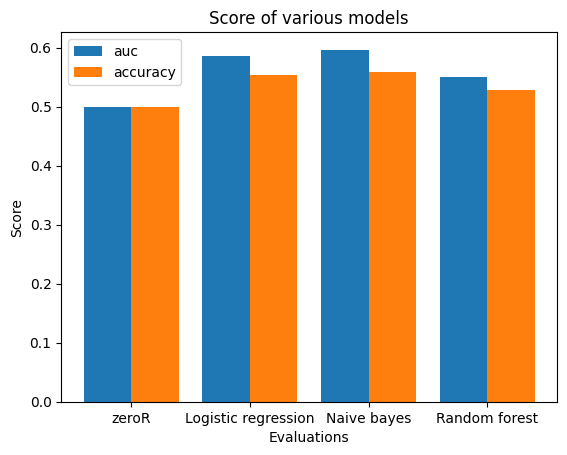

F1:  0.528444672923671 0.3752144754165371 0.5117175091009197
auc:  [0.5, 0.5860408837563378, 0.596262729363813, 0.5497538340347736]
accuracy:  [0.5, 0.5539466009757571, 0.5584006367809624, 0.528803016475335]




Date J41 first reported (simple and mucopurulent chronic bronchitis)_binary
Number of missing values: 
 Pack years of smoking                                                          0
Pack years adult smoking as proportion of life span exposed to smoking         0
Sex                                                                            0
Number of cigarettes previously smoked daily                                   0
Age at recruitment                                                             0
Body mass index (BMI) | Instance 0                                             0
Standing height | Instance 0                                                   0
allergy                                                                        0
rhinitis                            

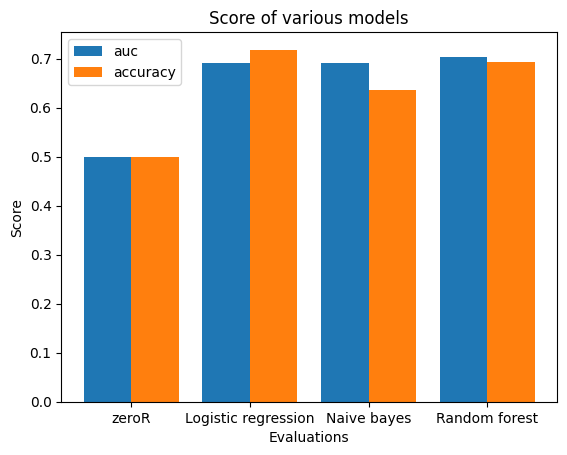

F1:  0.6844444444444445 0.5514862914862915 0.6488888888888888
auc:  [0.5, 0.6906666666666668, 0.6906666666666667, 0.7033333333333334]
accuracy:  [0.5, 0.7181818181818183, 0.6363636363636364, 0.6927272727272727]




Date J42 first reported (unspecified chronic bronchitis)_binary
Number of missing values: 
 Pack years of smoking                                                     0
Pack years adult smoking as proportion of life span exposed to smoking    0
Sex                                                                       0
Number of cigarettes previously smoked daily                              0
Age at recruitment                                                        0
Body mass index (BMI) | Instance 0                                        0
Standing height | Instance 0                                              0
allergy                                                                   0
rhinitis                                                                  0
eczema   

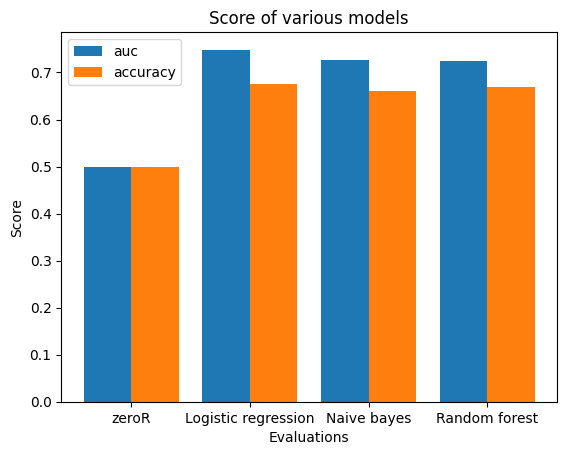

F1:  0.6702666841541521 0.5922426810477658 0.6624752551669028
auc:  [0.5, 0.7484033613445379, 0.7265114045618247, 0.7252749099639856]
accuracy:  [0.5, 0.6751552795031056, 0.6611594202898551, 0.6692753623188405]




Date J43 first reported (emphysema)_binary
Number of missing values: 
 Pack years of smoking                                                     0
Pack years adult smoking as proportion of life span exposed to smoking    0
Sex                                                                       0
Number of cigarettes previously smoked daily                              0
Age at recruitment                                                        0
Body mass index (BMI) | Instance 0                                        0
Standing height | Instance 0                                              0
allergy                                                                   0
rhinitis                                                                  0
eczema                        

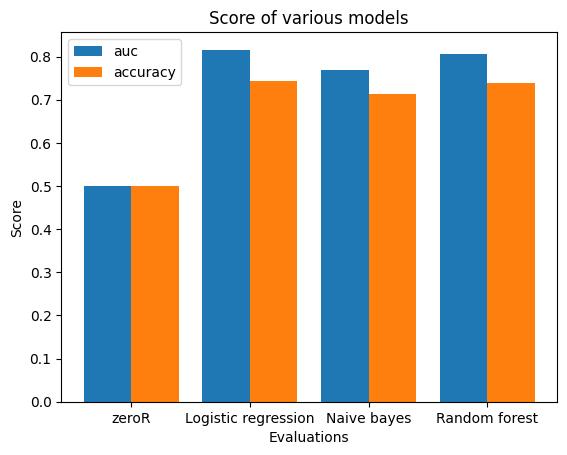

F1:  0.7396121426830311 0.7027762559426435 0.7431928610535055
auc:  [0.5, 0.8158286268715591, 0.7677764897233891, 0.8049388746739169]
accuracy:  [0.5, 0.7429669849436831, 0.714243721037616, 0.7383705206220419]




Date J44 first reported (other chronic obstructive pulmonary disease)_binary
Number of missing values: 
 Pack years of smoking                                                           0
Pack years adult smoking as proportion of life span exposed to smoking          0
Sex                                                                             0
Number of cigarettes previously smoked daily                                    0
Age at recruitment                                                              0
Body mass index (BMI) | Instance 0                                              0
Standing height | Instance 0                                                    0
allergy                                                                         0
rhinitis                 

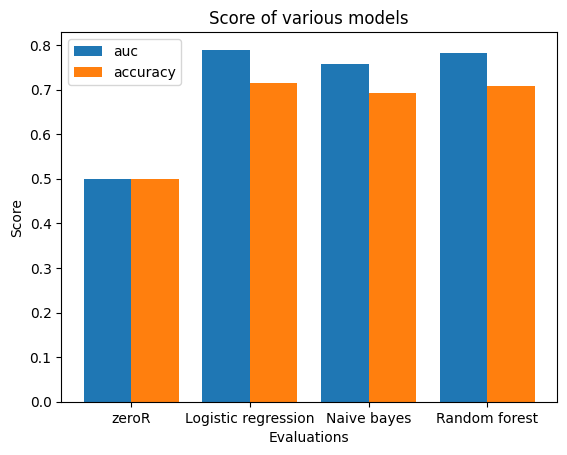

F1:  0.7080583651099203 0.6574538902847478 0.7037781886055807
auc:  [0.5, 0.7892960166476094, 0.7575716812014065, 0.7825559130714683]
accuracy:  [0.5, 0.7157133734840797, 0.6922547663856211, 0.7084253698825081]




Date J47 first reported (bronchiectasis)_binary
Number of missing values: 
 Pack years of smoking                                                     0
Pack years adult smoking as proportion of life span exposed to smoking    0
Sex                                                                       0
Number of cigarettes previously smoked daily                              0
Age at recruitment                                                        0
Body mass index (BMI) | Instance 0                                        0
Standing height | Instance 0                                              0
allergy                                                                   0
rhinitis                                                                  0
eczema                   

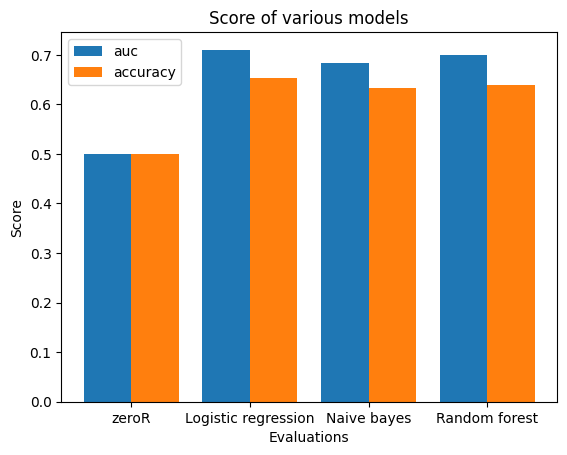

F1:  0.6598250956510058 0.607834963387503 0.6425329373994115
auc:  [0.5, 0.7102282341491384, 0.6837509983317489, 0.699585369914253]
accuracy:  [0.5, 0.653476635405341, 0.6333476751690496, 0.639841038193859]






In [181]:
for i in c:
    print(i)
    datacolumns_selected_lab = datacolumns_selected+[i]
    cohort = df[datacolumns_selected_lab].dropna()
    cohort = pd.concat([cohort[(cohort[i] == 1)],
                        cohort[(cohort[i] == 0)].sample(
                        cohort[(cohort[i] == 1)].shape[0]
                        )])
    cohort = cohort[datacolumns_selected_lab]
    emp.pipeline(cohort, i, datacolumns_selected,0.25, splits=5)
    print("\n\n\n")

In [182]:
datacolumns_selected =[
 'Pack years of smoking',
 'Pack years adult smoking as proportion of life span exposed to smoking',
'Sex',
'Number of cigarettes previously smoked daily',
'Age at recruitment',
'Body mass index (BMI) | Instance 0',
'Standing height | Instance 0',
'allergy',
 'rhinitis',
 'eczema',
'asbestosis',
 'chronic_sinusitis',
 'nasal_polyps',
 'nasal_sinus_disorder',
 'pneumonia',
 'Hayfever_allergic_rhinitis_eczema_doctor',
'Haemoglobin concentration | Instance 0',
'Diastolic blood pressure, automated reading | Instance 0 | Array 0',
 'Systolic blood pressure, automated reading | Instance 0 | Array 0',
'Brisk pace',
 'Slow pace',
 'Steady average pace',
'Summed MET minutes per week for all activity | Instance 0',
'Summed minutes activity | Instance 0',
'White blood cell (leukocyte) count | Instance 0'
]

Date J40 first reported (bronchitis, not specified as acute or chronic)_binary
Number of missing values: 
 Pack years of smoking                                                             0
Pack years adult smoking as proportion of life span exposed to smoking            0
Sex                                                                               0
Number of cigarettes previously smoked daily                                      0
Age at recruitment                                                                0
Body mass index (BMI) | Instance 0                                                0
Standing height | Instance 0                                                      0
allergy                                                                           0
rhinitis                                                                          0
eczema                                                                            0
asbestosis                                           

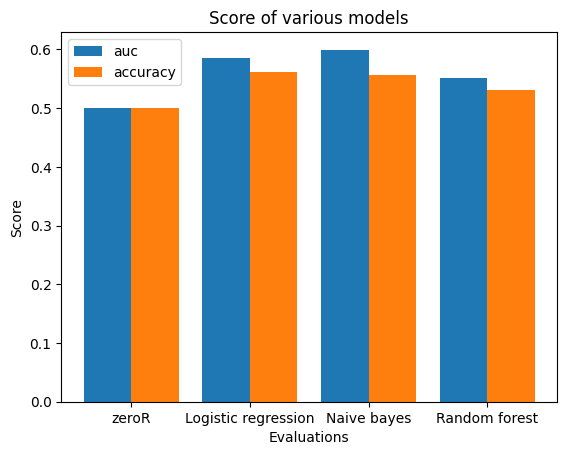

F1:  0.5339560387399618 0.3755733783663549 0.5108239326454811
auc:  [0.5, 0.5850818723383927, 0.5993748516557823, 0.5505026058579662]
accuracy:  [0.5, 0.56180412123541, 0.556831671618645, 0.5309061777359967]




Date J41 first reported (simple and mucopurulent chronic bronchitis)_binary
Number of missing values: 
 Pack years of smoking                                                          0
Pack years adult smoking as proportion of life span exposed to smoking         0
Sex                                                                            0
Number of cigarettes previously smoked daily                                   0
Age at recruitment                                                             0
Body mass index (BMI) | Instance 0                                             0
Standing height | Instance 0                                                   0
allergy                                                                        0
rhinitis                            

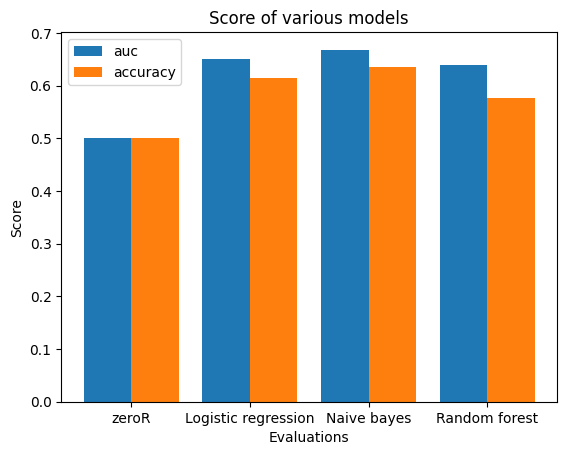

F1:  0.6228749028749029 0.6202564102564102 0.5343434343434343
auc:  [0.5, 0.6506666666666666, 0.668, 0.6393333333333333]
accuracy:  [0.5, 0.6145454545454545, 0.6345454545454545, 0.5763636363636363]




Date J42 first reported (unspecified chronic bronchitis)_binary
Number of missing values: 
 Pack years of smoking                                                     0
Pack years adult smoking as proportion of life span exposed to smoking    0
Sex                                                                       0
Number of cigarettes previously smoked daily                              0
Age at recruitment                                                        0
Body mass index (BMI) | Instance 0                                        0
Standing height | Instance 0                                              0
allergy                                                                   0
rhinitis                                                                  0
eczema                

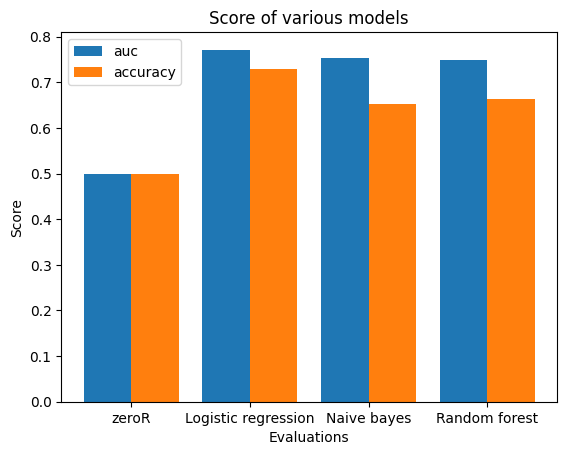

F1:  0.7286836568147406 0.5820672696438666 0.6591867934322744
auc:  [0.5, 0.7713709483793517, 0.7525042016806722, 0.7486458583433373]
accuracy:  [0.5, 0.7296894409937889, 0.6522567287784679, 0.6634782608695652]




Date J43 first reported (emphysema)_binary
Number of missing values: 
 Pack years of smoking                                                     0
Pack years adult smoking as proportion of life span exposed to smoking    0
Sex                                                                       0
Number of cigarettes previously smoked daily                              0
Age at recruitment                                                        0
Body mass index (BMI) | Instance 0                                        0
Standing height | Instance 0                                              0
allergy                                                                   0
rhinitis                                                                  0
eczema                        

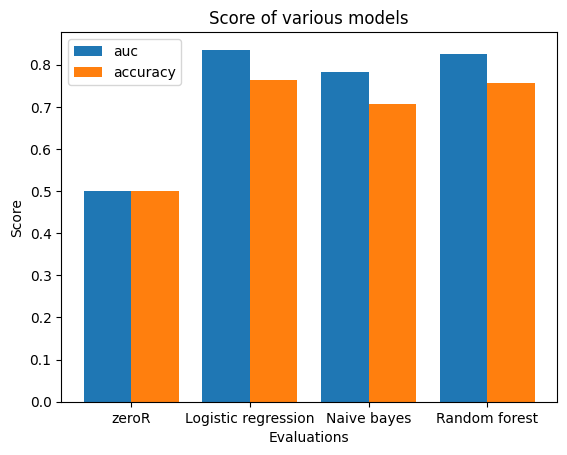

F1:  0.7611543493851514 0.6787130534067719 0.7608238642002729
auc:  [0.5, 0.8355047507534313, 0.782665404732999, 0.8262355006339006]
accuracy:  [0.5, 0.7645096390111974, 0.7076394729464536, 0.756175893401936]




Date J44 first reported (other chronic obstructive pulmonary disease)_binary
Number of missing values: 
 Pack years of smoking                                                           0
Pack years adult smoking as proportion of life span exposed to smoking          0
Sex                                                                             0
Number of cigarettes previously smoked daily                                    0
Age at recruitment                                                              0
Body mass index (BMI) | Instance 0                                              0
Standing height | Instance 0                                                    0
allergy                                                                         0
rhinitis                  

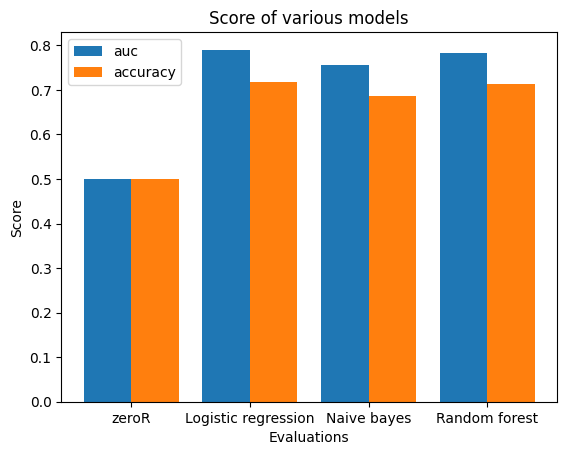

F1:  0.7103190656596888 0.6476293451611704 0.7105300807072971
auc:  [0.5, 0.7901082627558622, 0.756267232513137, 0.7819227387518167]
accuracy:  [0.5, 0.7174497491401344, 0.6864952387329848, 0.7130769662492373]




Date J47 first reported (bronchiectasis)_binary
Number of missing values: 
 Pack years of smoking                                                     0
Pack years adult smoking as proportion of life span exposed to smoking    0
Sex                                                                       0
Number of cigarettes previously smoked daily                              0
Age at recruitment                                                        0
Body mass index (BMI) | Instance 0                                        0
Standing height | Instance 0                                              0
allergy                                                                   0
rhinitis                                                                  0
eczema                    

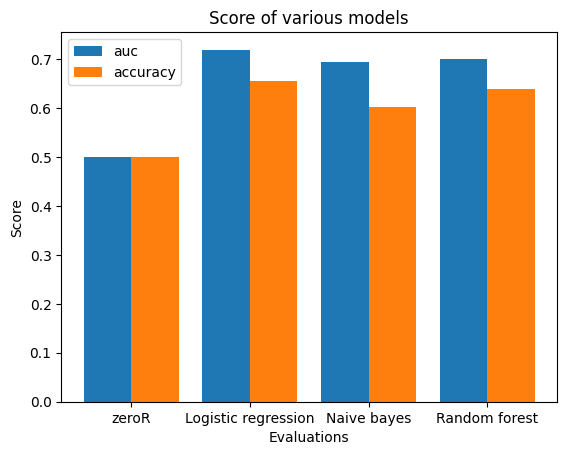

F1:  0.6592658463677954 0.46936045209671956 0.6462025370602786
auc:  [0.5, 0.7193201351875302, 0.6951342980552074, 0.6999149828250092]
accuracy:  [0.5, 0.6548354274351564, 0.6019663819618468, 0.6391584443372037]






In [183]:
for i in c:
    print(i)
    datacolumns_selected_lab = datacolumns_selected+[i]
    cohort = df[datacolumns_selected_lab].dropna()
    cohort = pd.concat([cohort[(cohort[i] == 1)],
                        cohort[(cohort[i] == 0)].sample(
                        cohort[(cohort[i] == 1)].shape[0]
                        )])
    cohort = cohort[datacolumns_selected_lab]
    emp.pipeline(cohort, i, datacolumns_selected,0.25, splits=5)
    print("\n\n\n")

In [184]:
datacolumns_selected =[
 'Pack years of smoking',
 'Pack years adult smoking as proportion of life span exposed to smoking',
'Sex',
'Number of cigarettes previously smoked daily',
'Age at recruitment',
'Body mass index (BMI) | Instance 0',
'Standing height | Instance 0',
'allergy',
 'rhinitis',
 'eczema',
'asbestosis',
 'chronic_sinusitis',
 'nasal_polyps',
 'nasal_sinus_disorder',
 'pneumonia',
 'Hayfever_allergic_rhinitis_eczema_doctor',
'Haemoglobin concentration | Instance 0',
'Diastolic blood pressure, automated reading | Instance 0 | Array 0',
 'Systolic blood pressure, automated reading | Instance 0 | Array 0',
'Brisk pace',
 'Slow pace',
 'Steady average pace',
'Summed MET minutes per week for all activity | Instance 0',
'Summed minutes activity | Instance 0',
'Vitamin D | Instance 0',
'C-reactive protein | Instance 0',
'Cholesterol | Instance 0',
'Glycated haemoglobin (HbA1c) | Instance 0',
'Albumin | Instance 0',
'IGF-1 | Instance 0'
]

Date J40 first reported (bronchitis, not specified as acute or chronic)_binary
Number of missing values: 
 Pack years of smoking                                                             0
Pack years adult smoking as proportion of life span exposed to smoking            0
Sex                                                                               0
Number of cigarettes previously smoked daily                                      0
Age at recruitment                                                                0
Body mass index (BMI) | Instance 0                                                0
Standing height | Instance 0                                                      0
allergy                                                                           0
rhinitis                                                                          0
eczema                                                                            0
asbestosis                                           

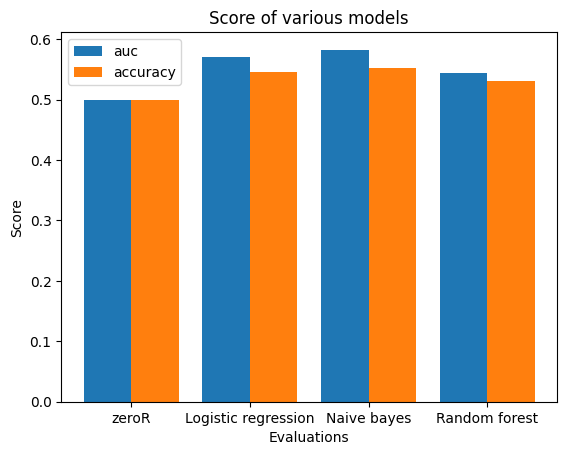

F1:  0.5177018889948115 0.3857542392449371 0.5115698210539947
auc:  [0.5, 0.5712940905071658, 0.5826999482703836, 0.5433915835468389]
accuracy:  [0.5, 0.5464444113871396, 0.5520823347272498, 0.531513528702005]




Date J41 first reported (simple and mucopurulent chronic bronchitis)_binary
Number of missing values: 
 Pack years of smoking                                                          0
Pack years adult smoking as proportion of life span exposed to smoking         0
Sex                                                                            0
Number of cigarettes previously smoked daily                                   0
Age at recruitment                                                             0
Body mass index (BMI) | Instance 0                                             0
Standing height | Instance 0                                                   0
allergy                                                                        0
rhinitis                          

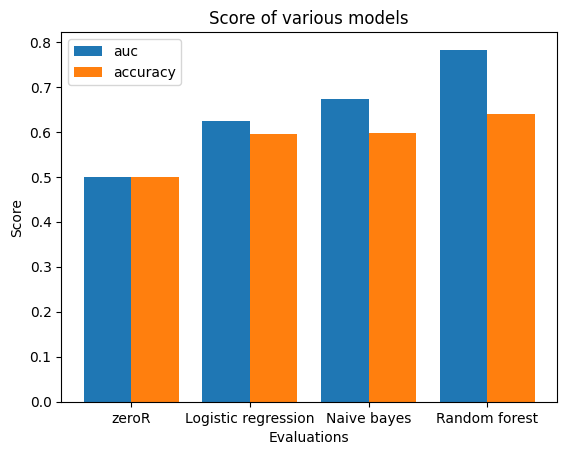

F1:  0.5797402597402598 0.5053968253968254 0.5690909090909091
auc:  [0.5, 0.625, 0.6725, 0.7825]
accuracy:  [0.5, 0.5944444444444444, 0.5972222222222222, 0.6388888888888888]




Date J42 first reported (unspecified chronic bronchitis)_binary
Number of missing values: 
 Pack years of smoking                                                     0
Pack years adult smoking as proportion of life span exposed to smoking    0
Sex                                                                       0
Number of cigarettes previously smoked daily                              0
Age at recruitment                                                        0
Body mass index (BMI) | Instance 0                                        0
Standing height | Instance 0                                              0
allergy                                                                   0
rhinitis                                                                  0
eczema                                        

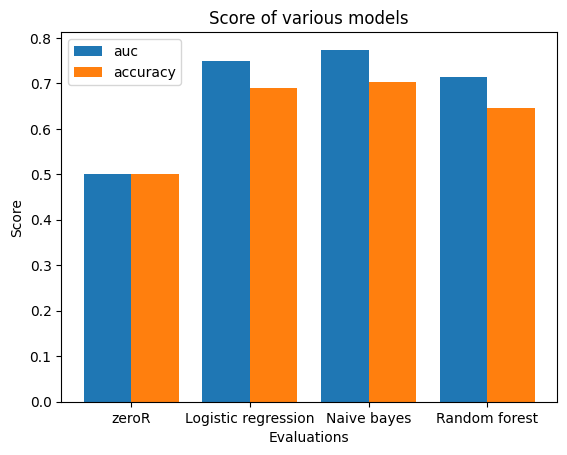

F1:  0.6862739737043143 0.6599789988806007 0.6458676102019756
auc:  [0.5, 0.7497448979591836, 0.7738520408163265, 0.7141581632653061]
accuracy:  [0.5, 0.6892857142857143, 0.7035714285714286, 0.6464285714285715]




Date J43 first reported (emphysema)_binary
Number of missing values: 
 Pack years of smoking                                                     0
Pack years adult smoking as proportion of life span exposed to smoking    0
Sex                                                                       0
Number of cigarettes previously smoked daily                              0
Age at recruitment                                                        0
Body mass index (BMI) | Instance 0                                        0
Standing height | Instance 0                                              0
allergy                                                                   0
rhinitis                                                                  0
eczema                        

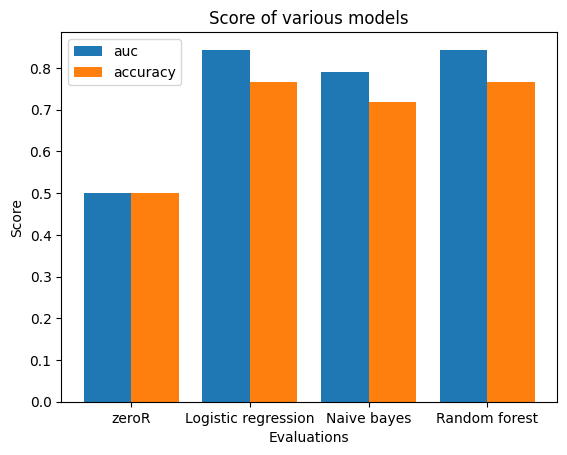

F1:  0.7647490372409138 0.7026064953944181 0.768827836324798
auc:  [0.5, 0.8439373047433146, 0.7905784538334488, 0.8424128713206981]
accuracy:  [0.5, 0.7674996343717176, 0.7186596731947935, 0.7656694986239081]




Date J44 first reported (other chronic obstructive pulmonary disease)_binary
Number of missing values: 
 Pack years of smoking                                                           0
Pack years adult smoking as proportion of life span exposed to smoking          0
Sex                                                                             0
Number of cigarettes previously smoked daily                                    0
Age at recruitment                                                              0
Body mass index (BMI) | Instance 0                                              0
Standing height | Instance 0                                                    0
allergy                                                                         0
rhinitis                 

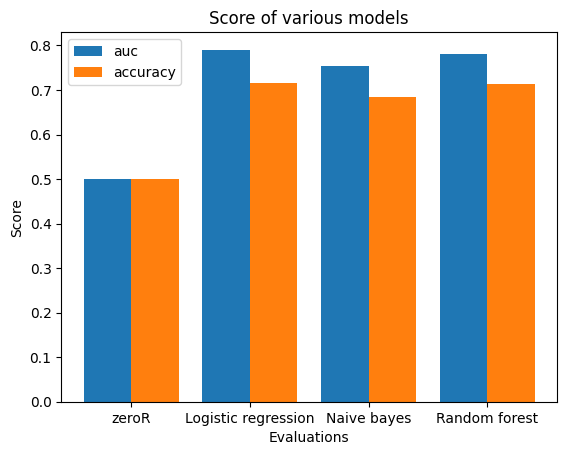

F1:  0.7070256442196811 0.6479460490426865 0.7124197290316456
auc:  [0.5, 0.7903726679291397, 0.7532274027921102, 0.7815572620871565]
accuracy:  [0.5, 0.7152735171330519, 0.684919096525265, 0.7135233150512942]




Date J47 first reported (bronchiectasis)_binary
Number of missing values: 
 Pack years of smoking                                                     0
Pack years adult smoking as proportion of life span exposed to smoking    0
Sex                                                                       0
Number of cigarettes previously smoked daily                              0
Age at recruitment                                                        0
Body mass index (BMI) | Instance 0                                        0
Standing height | Instance 0                                              0
allergy                                                                   0
rhinitis                                                                  0
eczema                    

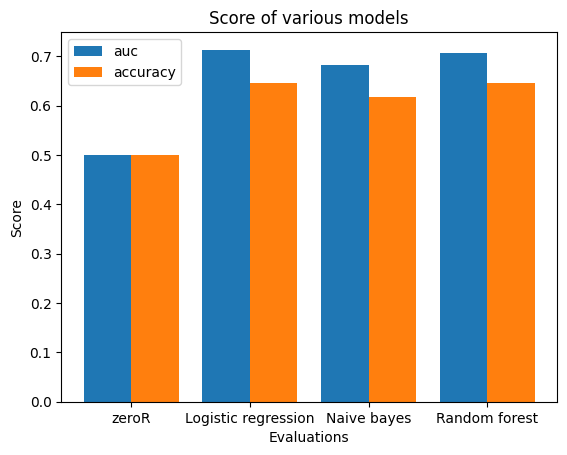

F1:  0.6543313416973818 0.5431666521002323 0.6560440737772174
auc:  [0.5, 0.7133487829177955, 0.6824287088716985, 0.706874388972043]
accuracy:  [0.5, 0.6467652579592877, 0.6168999325715744, 0.6454832066772365]






In [185]:
for i in c:
    print(i)
    datacolumns_selected_lab = datacolumns_selected+[i]
    cohort = df[datacolumns_selected_lab].dropna()
    cohort = pd.concat([cohort[(cohort[i] == 1)],
                        cohort[(cohort[i] == 0)].sample(
                        cohort[(cohort[i] == 1)].shape[0]
                        )])
    cohort = cohort[datacolumns_selected_lab]
    emp.pipeline(cohort, i, datacolumns_selected,0.25, splits=5)
    print("\n\n\n")

In [186]:
df['Doctor diagnosed asthma'] = df['Doctor diagnosed asthma'].apply(ap.yes_no_binairy)

In [187]:
datacolumns_selected =[
 'Pack years of smoking',
 'Pack years adult smoking as proportion of life span exposed to smoking',
'Sex',
'Number of cigarettes previously smoked daily',
'Age at recruitment',
'Body mass index (BMI) | Instance 0',
'Standing height | Instance 0',
'allergy',
 'rhinitis',
 'eczema',
'asbestosis',
 'chronic_sinusitis',
 'nasal_polyps',
 'nasal_sinus_disorder',
 'pneumonia',
 'Hayfever_allergic_rhinitis_eczema_doctor',
'Haemoglobin concentration | Instance 0',
'Diastolic blood pressure, automated reading | Instance 0 | Array 0',
 'Systolic blood pressure, automated reading | Instance 0 | Array 0',
'Brisk pace',
 'Slow pace',
 'Steady average pace',
'Summed MET minutes per week for all activity | Instance 0',
'Summed minutes activity | Instance 0',
'Vitamin D | Instance 0',
'C-reactive protein | Instance 0',
'Cholesterol | Instance 0',
'Glycated haemoglobin (HbA1c) | Instance 0',
'Albumin | Instance 0',
'IGF-1 | Instance 0',
    'Eosinophill count | Instance 0',
    'Neutrophill count | Instance 0',
    'Lymphocyte count | Instance 0',
    'Doctor diagnosed asthma'
]

Date J40 first reported (bronchitis, not specified as acute or chronic)_binary
Number of missing values: 
 Pack years of smoking                                                             0
Pack years adult smoking as proportion of life span exposed to smoking            0
Sex                                                                               0
Number of cigarettes previously smoked daily                                      0
Age at recruitment                                                                0
Body mass index (BMI) | Instance 0                                                0
Standing height | Instance 0                                                      0
allergy                                                                           0
rhinitis                                                                          0
eczema                                                                            0
asbestosis                                           

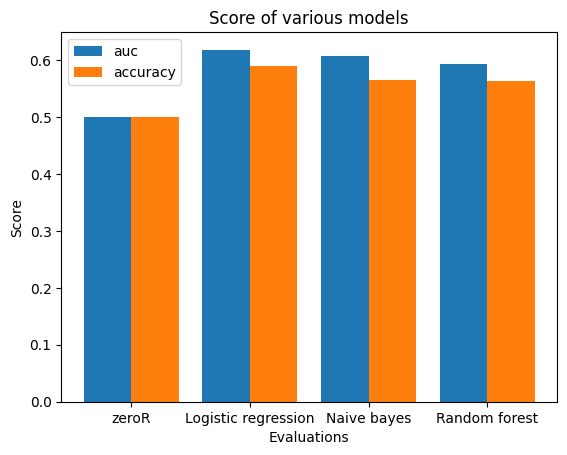

F1:  0.5522517772049164 0.4108093426865664 0.5419987727054763
auc:  [0.5, 0.6180224206502504, 0.6071204659256888, 0.5924345021946041]
accuracy:  [0.5, 0.5901509665507654, 0.5655419262469528, 0.5625408372535254]




Date J41 first reported (simple and mucopurulent chronic bronchitis)_binary
Number of missing values: 
 Pack years of smoking                                                          0
Pack years adult smoking as proportion of life span exposed to smoking         0
Sex                                                                            0
Number of cigarettes previously smoked daily                                   0
Age at recruitment                                                             0
Body mass index (BMI) | Instance 0                                             0
Standing height | Instance 0                                                   0
allergy                                                                        0
rhinitis                         

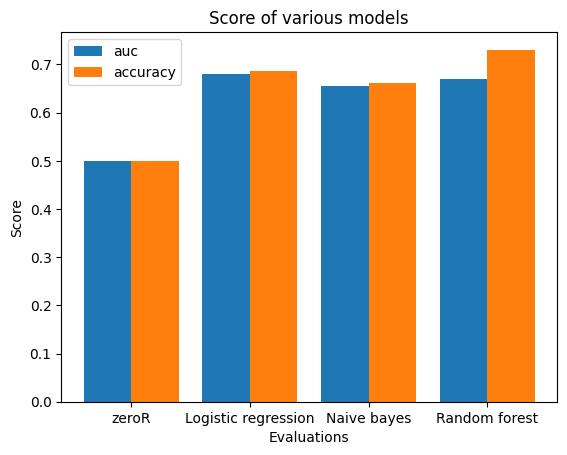

F1:  0.6851370851370852 0.584920634920635 0.7344877344877345
auc:  [0.5, 0.68, 0.655, 0.67]
accuracy:  [0.5, 0.6861111111111111, 0.6611111111111111, 0.7305555555555555]




Date J42 first reported (unspecified chronic bronchitis)_binary
Number of missing values: 
 Pack years of smoking                                                     0
Pack years adult smoking as proportion of life span exposed to smoking    0
Sex                                                                       0
Number of cigarettes previously smoked daily                              0
Age at recruitment                                                        0
Body mass index (BMI) | Instance 0                                        0
Standing height | Instance 0                                              0
allergy                                                                   0
rhinitis                                                                  0
eczema                                             

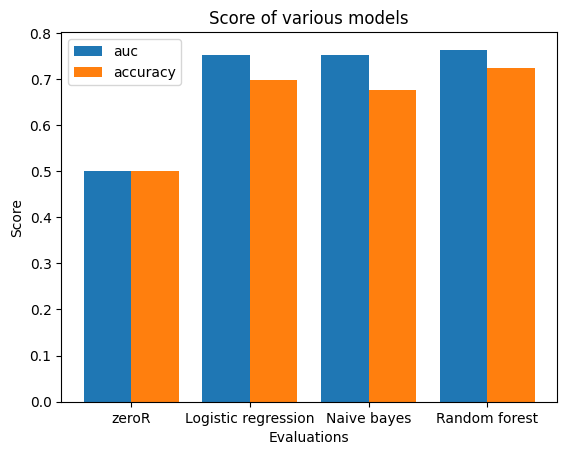

F1:  0.6886408376695579 0.6402958310199239 0.7183081642563575
auc:  [0.5, 0.7511621315192744, 0.752437641723356, 0.7633692365835223]
accuracy:  [0.5, 0.6975974025974025, 0.6762337662337662, 0.7230519480519481]




Date J43 first reported (emphysema)_binary
Number of missing values: 
 Pack years of smoking                                                     0
Pack years adult smoking as proportion of life span exposed to smoking    0
Sex                                                                       0
Number of cigarettes previously smoked daily                              0
Age at recruitment                                                        0
Body mass index (BMI) | Instance 0                                        0
Standing height | Instance 0                                              0
allergy                                                                   0
rhinitis                                                                  0
eczema                         

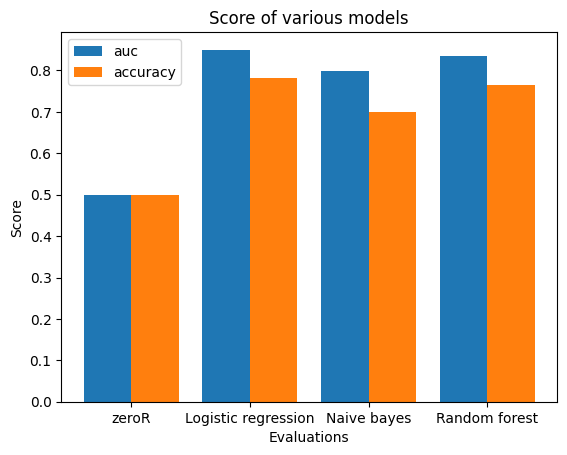

F1:  0.7805197252693081 0.6581549968008864 0.7712873413233415
auc:  [0.5, 0.8501795494363026, 0.7982098726038201, 0.8338857698679746]
accuracy:  [0.5, 0.7825211171753026, 0.6995543041673895, 0.7653404769212293]




Date J44 first reported (other chronic obstructive pulmonary disease)_binary
Number of missing values: 
 Pack years of smoking                                                           0
Pack years adult smoking as proportion of life span exposed to smoking          0
Sex                                                                             0
Number of cigarettes previously smoked daily                                    0
Age at recruitment                                                              0
Body mass index (BMI) | Instance 0                                              0
Standing height | Instance 0                                                    0
allergy                                                                         0
rhinitis                

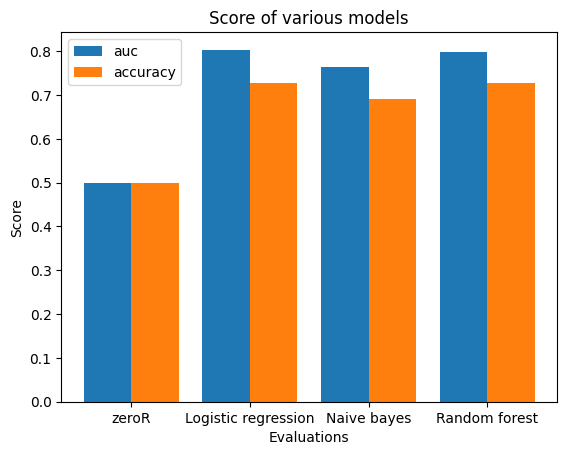

F1:  0.7203648413734324 0.6516760902940357 0.7254776764729189
auc:  [0.5, 0.8034930640859833, 0.7640824992961719, 0.7975382276290943]
accuracy:  [0.5, 0.7268269106373635, 0.6902920761348887, 0.727177825815395]




Date J47 first reported (bronchiectasis)_binary
Number of missing values: 
 Pack years of smoking                                                     0
Pack years adult smoking as proportion of life span exposed to smoking    0
Sex                                                                       0
Number of cigarettes previously smoked daily                              0
Age at recruitment                                                        0
Body mass index (BMI) | Instance 0                                        0
Standing height | Instance 0                                              0
allergy                                                                   0
rhinitis                                                                  0
eczema                    

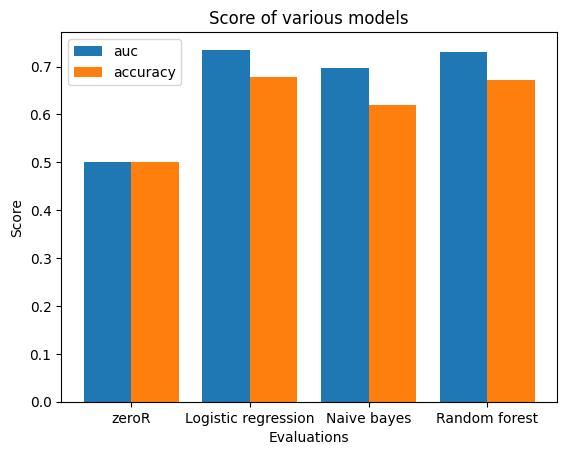

F1:  0.6788595708207157 0.527434278100434 0.6710548135696408
auc:  [0.5, 0.7350763852946068, 0.6974983563445102, 0.7305850325544816]
accuracy:  [0.5, 0.67845935159368, 0.6195505986550763, 0.6712189965921309]






In [188]:
for i in c:
    print(i)
    datacolumns_selected_lab = datacolumns_selected+[i]
    cohort = df[datacolumns_selected_lab].dropna()
    cohort = pd.concat([cohort[(cohort[i] == 1)],
                        cohort[(cohort[i] == 0)].sample(
                        cohort[(cohort[i] == 1)].shape[0]
                        )])
    cohort = cohort[datacolumns_selected_lab]
    emp.pipeline(cohort, i, datacolumns_selected,0.25, splits=5)
    print("\n\n\n")

#### Feature importance

On last datacolumns (previous smokers)

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [230]:
datacolumns_selected =[
 'Pack years of smoking',
 'Pack years adult smoking as proportion of life span exposed to smoking',
'Sex',
'Number of cigarettes previously smoked daily',
'Age at recruitment',
'Body mass index (BMI) | Instance 0',
'Standing height | Instance 0',
'allergy',
 'rhinitis',
 'eczema',
'asbestosis',
 'chronic_sinusitis',
 'nasal_polyps',
 'nasal_sinus_disorder',
 'pneumonia',
 'Hayfever_allergic_rhinitis_eczema_doctor',
'Haemoglobin concentration | Instance 0',
'Diastolic blood pressure, automated reading | Instance 0 | Array 0',
 'Systolic blood pressure, automated reading | Instance 0 | Array 0',
'Brisk pace',
 'Slow pace',
 'Steady average pace',
'Summed MET minutes per week for all activity | Instance 0',
'Summed minutes activity | Instance 0',
'Vitamin D | Instance 0',
'C-reactive protein | Instance 0',
'Cholesterol | Instance 0',
'Glycated haemoglobin (HbA1c) | Instance 0',
'Albumin | Instance 0',
'IGF-1 | Instance 0',
    'Eosinophill count | Instance 0',
    'Neutrophill count | Instance 0',
    'Lymphocyte count | Instance 0',
    'Doctor diagnosed asthma',
    'Age started smoking in former smokers'
]

Date J40 first reported (bronchitis, not specified as acute or chronic)_binary
Number of missing values: 
 Pack years of smoking                                                             0
Pack years adult smoking as proportion of life span exposed to smoking            0
Sex                                                                               0
Number of cigarettes previously smoked daily                                      0
Age at recruitment                                                                0
Body mass index (BMI) | Instance 0                                                0
Standing height | Instance 0                                                      0
allergy                                                                           0
rhinitis                                                                          0
eczema                                                                            0
asbestosis                                           

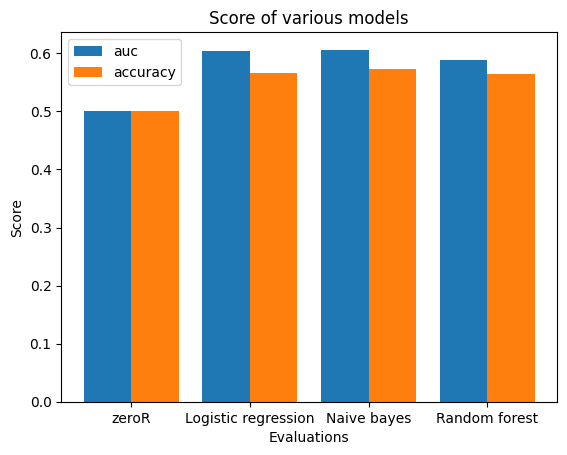

F1:  0.5153327907542468 0.45243128398720556 0.552532087746237
auc:  [0.5, 0.6033494185126728, 0.6061656604231741, 0.5886109020135907]
accuracy:  [0.5, 0.5658625436011963, 0.5721886556735453, 0.5641964389362137]




Date J41 first reported (simple and mucopurulent chronic bronchitis)_binary




Date J42 first reported (unspecified chronic bronchitis)_binary
Number of missing values: 
 Pack years of smoking                                                     0
Pack years adult smoking as proportion of life span exposed to smoking    0
Sex                                                                       0
Number of cigarettes previously smoked daily                              0
Age at recruitment                                                        0
Body mass index (BMI) | Instance 0                                        0
Standing height | Instance 0                                              0
allergy                                                                   0
rhini

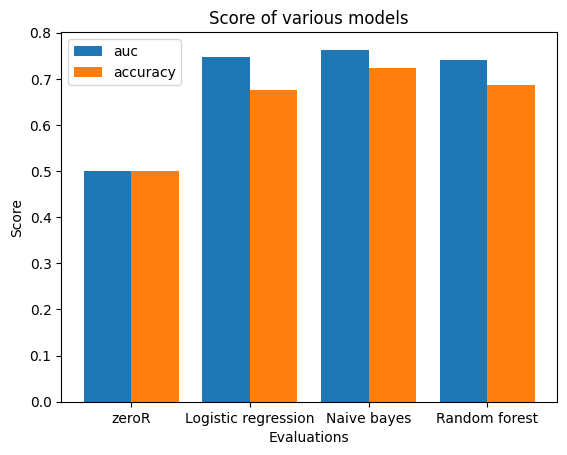

F1:  0.6679135935441189 0.6845132215104812 0.6893466303811131
auc:  [0.5, 0.7479119425547998, 0.7631613756613757, 0.7417611489040061]
accuracy:  [0.5, 0.6762987012987013, 0.7228571428571429, 0.6867532467532468]




Date J43 first reported (emphysema)_binary
Number of missing values: 
 Pack years of smoking                                                     0
Pack years adult smoking as proportion of life span exposed to smoking    0
Sex                                                                       0
Number of cigarettes previously smoked daily                              0
Age at recruitment                                                        0
Body mass index (BMI) | Instance 0                                        0
Standing height | Instance 0                                              0
allergy                                                                   0
rhinitis                                                                  0
eczema                        

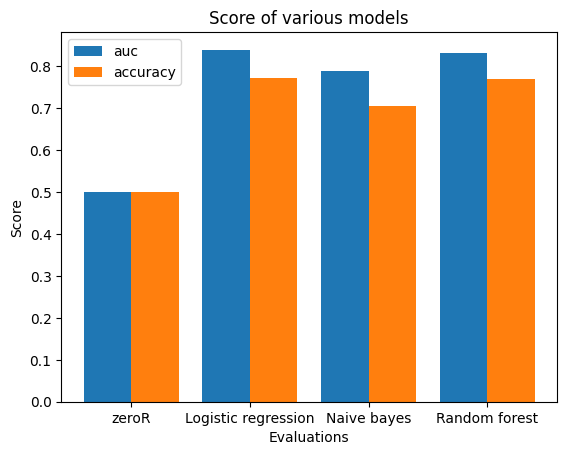

F1:  0.7706903090801818 0.671530765777941 0.7740684417420434
auc:  [0.5, 0.8397454730610467, 0.7883412305810942, 0.8329261074053018]
accuracy:  [0.5, 0.7733916919094197, 0.7057760311720199, 0.7693697540666409]




Date J44 first reported (other chronic obstructive pulmonary disease)_binary
Number of missing values: 
 Pack years of smoking                                                           0
Pack years adult smoking as proportion of life span exposed to smoking          0
Sex                                                                             0
Number of cigarettes previously smoked daily                                    0
Age at recruitment                                                              0
Body mass index (BMI) | Instance 0                                              0
Standing height | Instance 0                                                    0
allergy                                                                         0
rhinitis                 

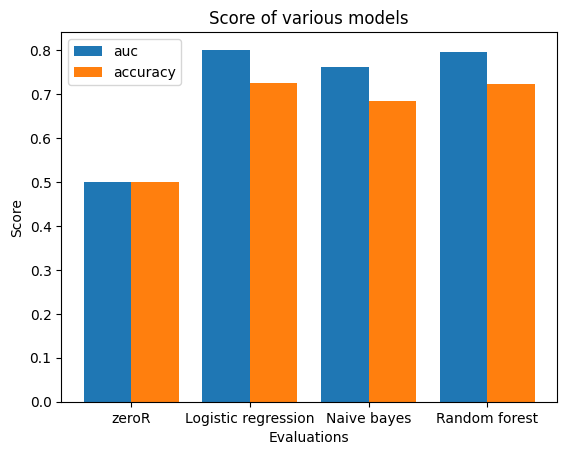

F1:  0.7193296695772166 0.6393688044805973 0.7219018036078556
auc:  [0.5, 0.8011121491245058, 0.7623778218214937, 0.7956656278280556]
accuracy:  [0.5, 0.7257760845605383, 0.6851236303232788, 0.7235862525399218]




Date J47 first reported (bronchiectasis)_binary
Number of missing values: 
 Pack years of smoking                                                     0
Pack years adult smoking as proportion of life span exposed to smoking    0
Sex                                                                       0
Number of cigarettes previously smoked daily                              0
Age at recruitment                                                        0
Body mass index (BMI) | Instance 0                                        0
Standing height | Instance 0                                              0
allergy                                                                   0
rhinitis                                                                  0
eczema                   

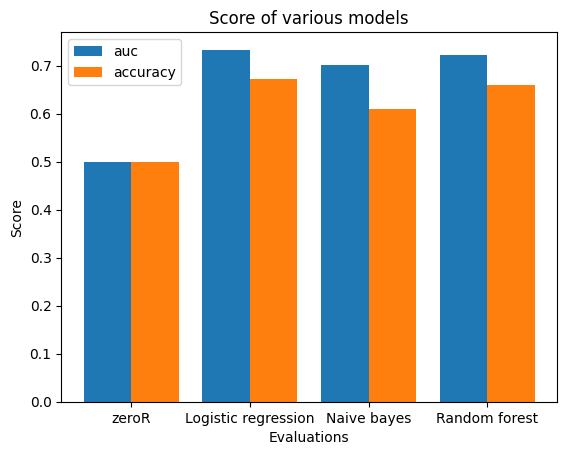

F1:  0.6780307198219037 0.5045001705042726 0.6663078009050735
auc:  [0.5, 0.7329760655783569, 0.7015963430802492, 0.721686561503801]
accuracy:  [0.5, 0.6725028702640643, 0.608893262624606, 0.6592814316694914]






In [231]:
for i in c:
    print(i)
    datacolumns_selected_lab = datacolumns_selected+[i]
    cohort = df[datacolumns_selected_lab].dropna()
    
    cohort = pd.concat([cohort[(cohort[i] == 1)],
                        cohort[(cohort[i] == 0)].sample(
                        cohort[(cohort[i] == 1)].shape[0]
                        )])
        
    cohort = cohort[datacolumns_selected_lab]
    if cohort.shape[0] > 100:
        emp.pipeline(cohort, i, datacolumns_selected,0.25, splits=5)
    print("\n\n\n")

Date J40 first reported (bronchitis, not specified as acute or chronic)_binary
Date J41 first reported (simple and mucopurulent chronic bronchitis)_binary
Date J42 first reported (unspecified chronic bronchitis)_binary
Date J43 first reported (emphysema)_binary
Date J44 first reported (other chronic obstructive pulmonary disease)_binary
Date J47 first reported (bronchiectasis)_binary


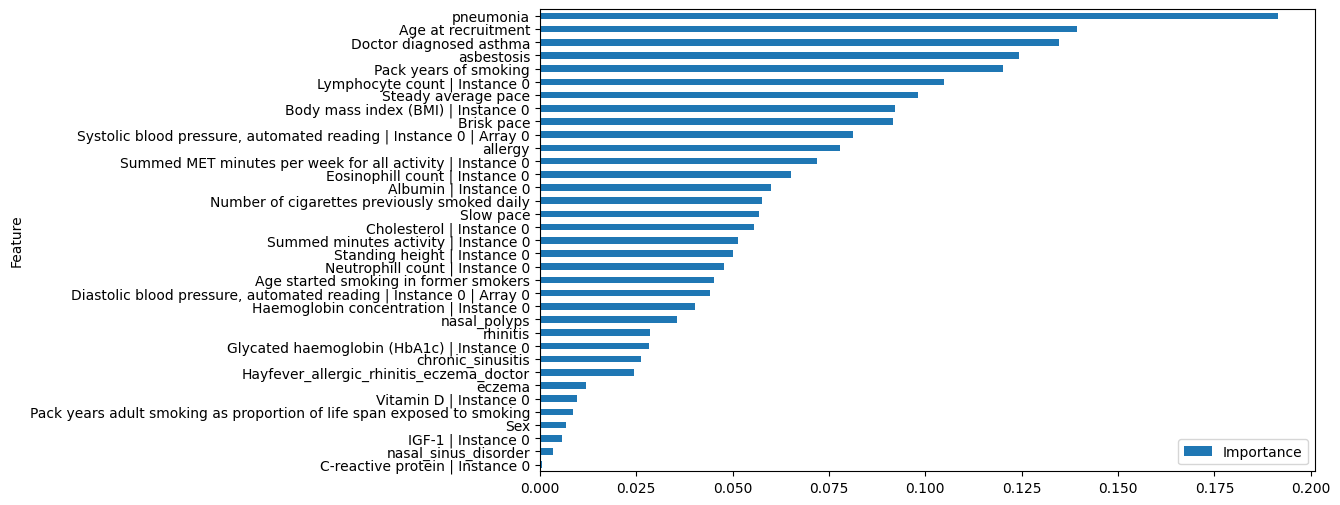

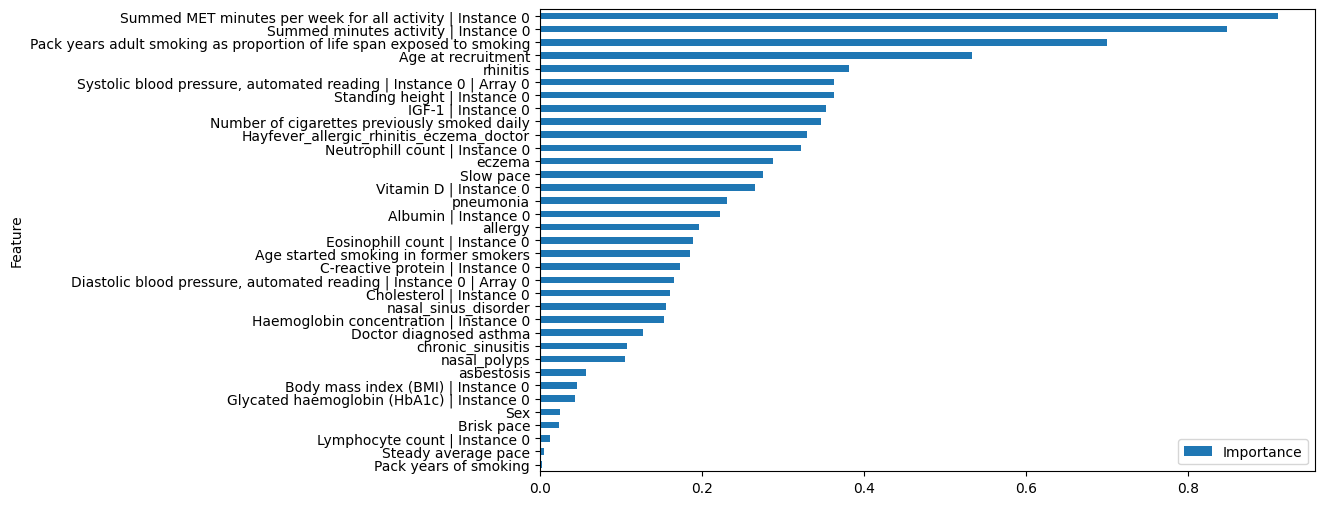

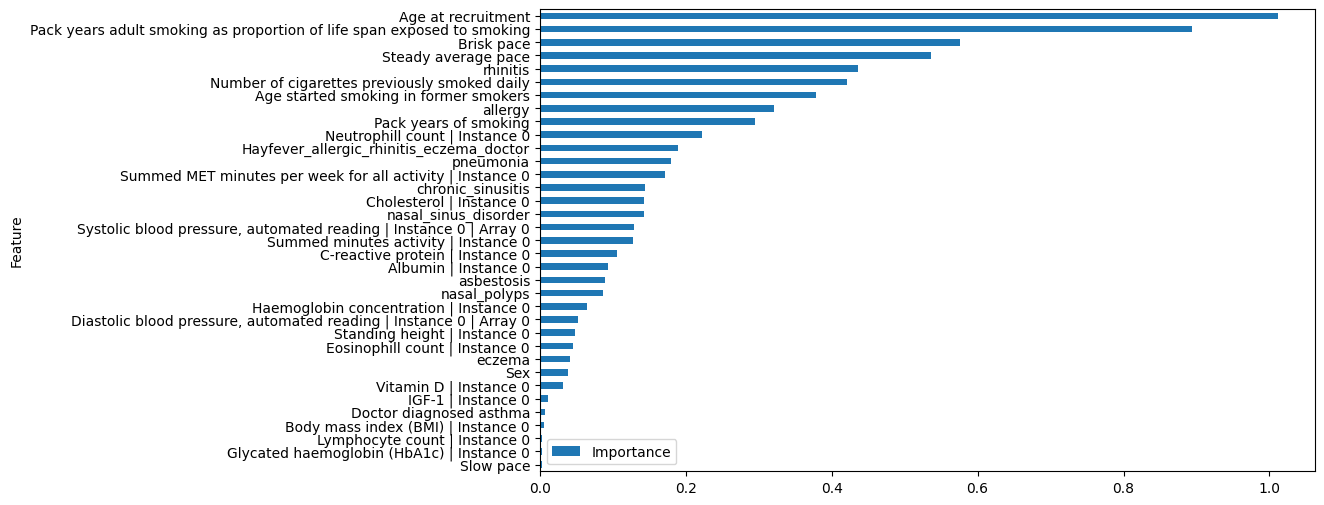

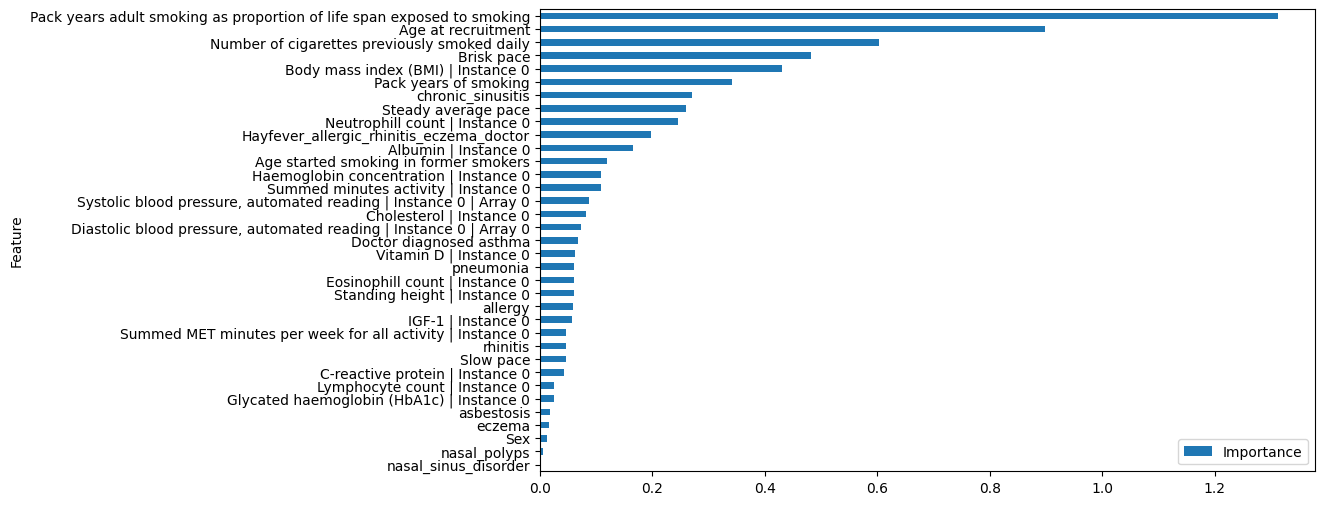

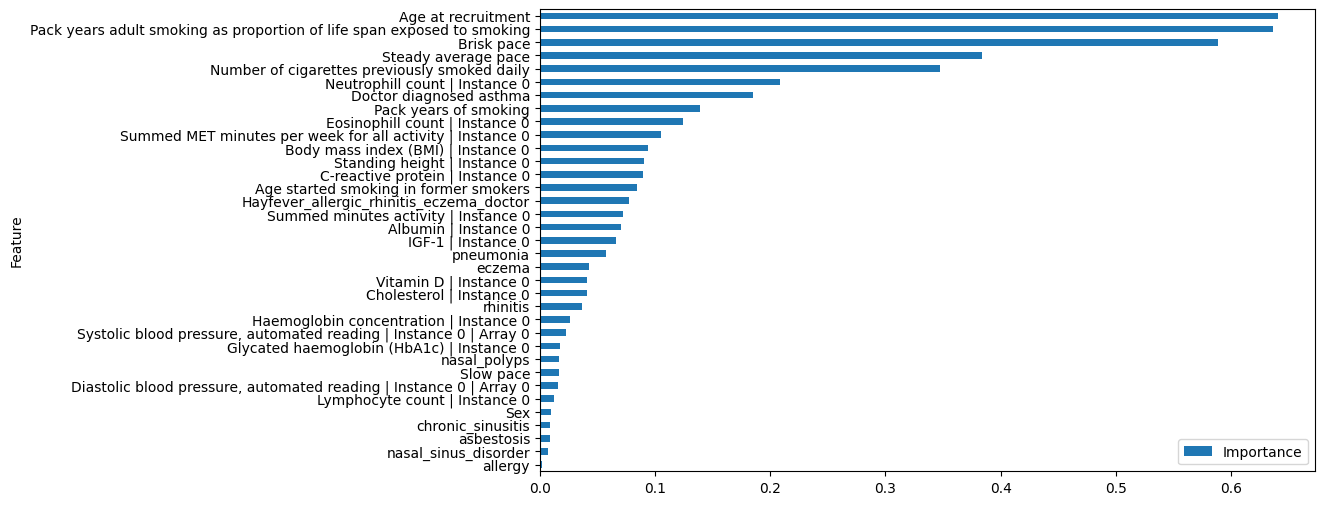

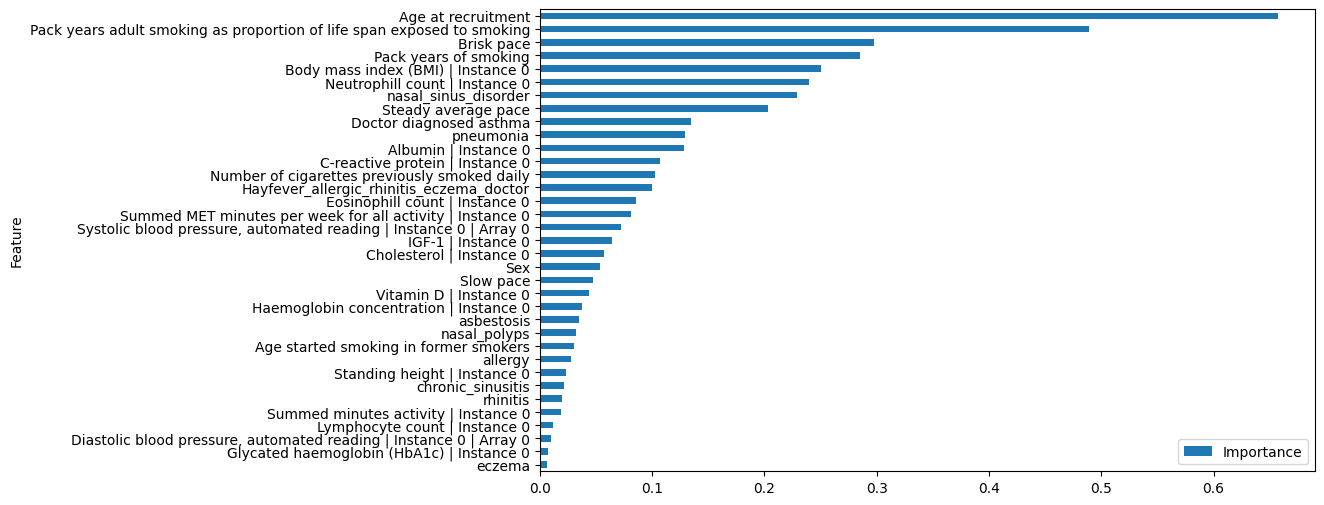

In [232]:
for i in c:
    print(i)
    tdf = df[datacolumns_selected+[i]].dropna()
    
    X = tdf[datacolumns_selected]
    y = tdf[i]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    
    coefficients = model.coef_[0]
    
    feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
    feature_importance = feature_importance.sort_values('Importance', ascending=True)
    feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
    

In [256]:
ten_chronic_bronchitis = [
    'Age at recruitment',
    'Pack years adult smoking as proportion of life span exposed to smoking',
    'Brisk pace',
    'Steady average pace',
    'Number of cigarettes previously smoked daily',
    'rhinitis',
    'Age started smoking in former smokers',
    'allergy',
    'Pack years of smoking',
    'Neutrophill count | Instance 0',
]
ten_emphysema= [
    'Pack years adult smoking as proportion of life span exposed to smoking',
    'Age at recruitment',
    'Number of cigarettes previously smoked daily',
    'Brisk pace',
    'Body mass index (BMI) | Instance 0',
    'chronic_sinusitis',
    'Steady average pace',
    'Neutrophill count | Instance 0',
    'Pack years of smoking',
    'Hayfever_allergic_rhinitis_eczema_doctor',
]
ten_other = [
    'Age at recruitment',
    'Brisk pace',
    'Pack years adult smoking as proportion of life span exposed to smoking',
    'Steady average pace',
    'Number of cigarettes previously smoked daily',
    'Pack years of smoking',
    'Neutrophill count | Instance 0',
    'Doctor diagnosed asthma',
    'Eosinophill count | Instance 0',
    'Summed MET minutes per week for all activity | Instance 0'
]

Number of missing values: 
 Age at recruitment                                                        0
Pack years adult smoking as proportion of life span exposed to smoking    0
Brisk pace                                                                0
Steady average pace                                                       0
Number of cigarettes previously smoked daily                              0
rhinitis                                                                  0
Age started smoking in former smokers                                     0
allergy                                                                   0
Pack years of smoking                                                     0
Neutrophill count | Instance 0                                            0
Date J42 first reported (unspecified chronic bronchitis)_binary           0
dtype: int64
Dataframe dimensions:  (494, 11)


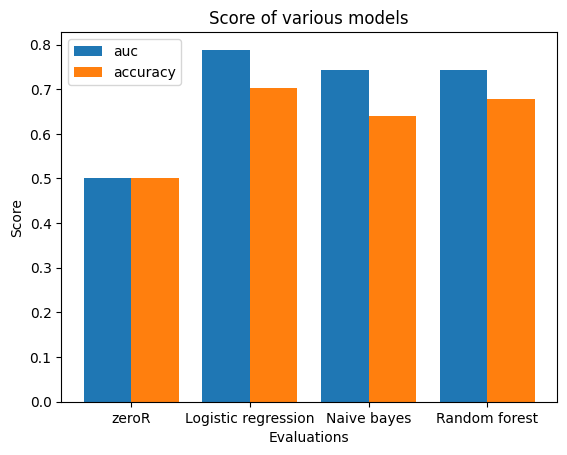

F1:  0.7040001587679606 0.6182998705645455 0.6759259896252865
auc:  [0.5, 0.7884414827155352, 0.7435268638067472, 0.7422732194918784]
accuracy:  [0.5, 0.702473716759431, 0.6395176252319109, 0.6781076066790352]


In [257]:
datacolumns_selected_lab = ten_chronic_bronchitis+['Date J42 first reported (unspecified chronic bronchitis)_binary']
cohort = df[datacolumns_selected_lab].dropna()
cohort = pd.concat([cohort[(cohort['Date J42 first reported (unspecified chronic bronchitis)_binary'] == 1)],
                    cohort[(cohort['Date J42 first reported (unspecified chronic bronchitis)_binary'] == 0)].sample(
                    cohort[(cohort['Date J42 first reported (unspecified chronic bronchitis)_binary'] == 1)].shape[0]
                    )])
cohort = cohort[datacolumns_selected_lab]
emp.pipeline(cohort, 'Date J42 first reported (unspecified chronic bronchitis)_binary', ten_chronic_bronchitis,0.25, splits=5)

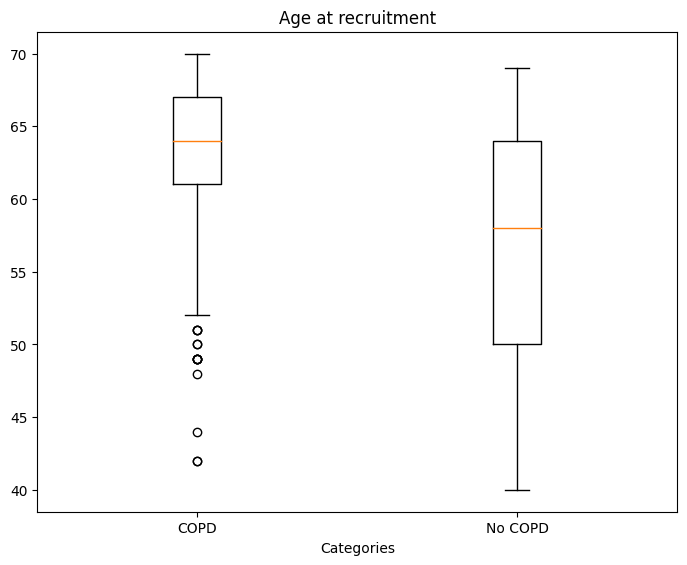

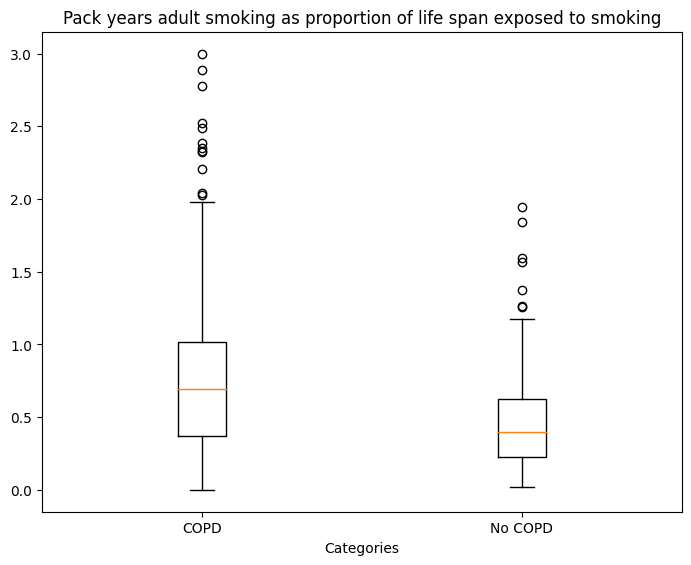

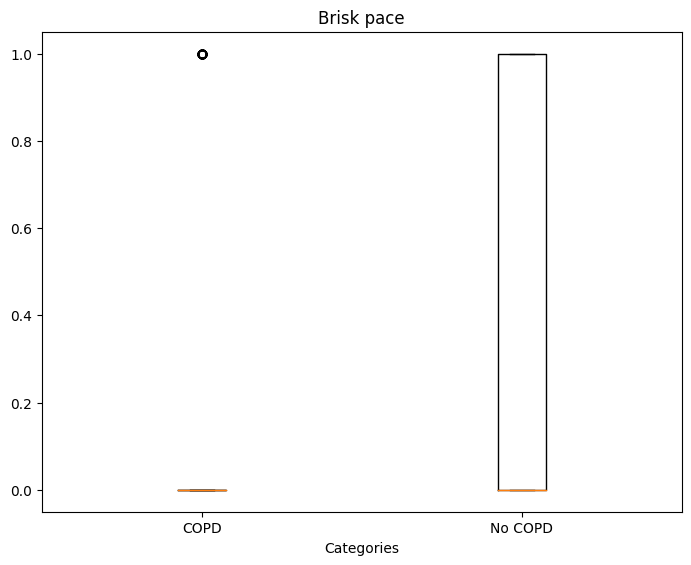

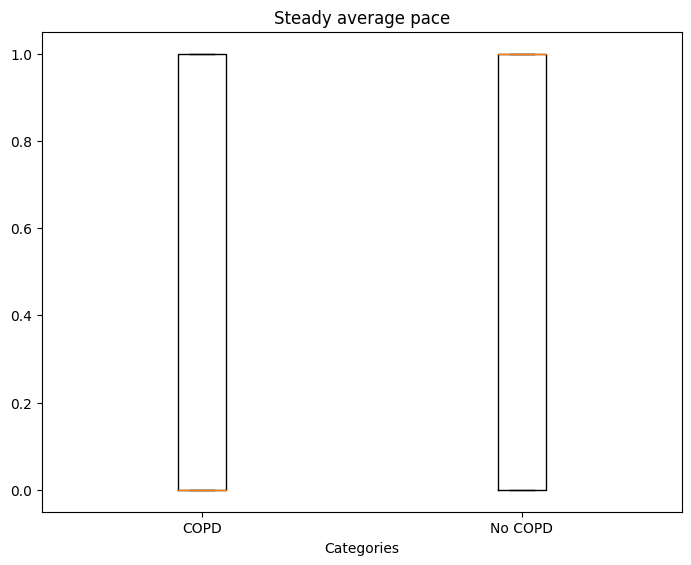

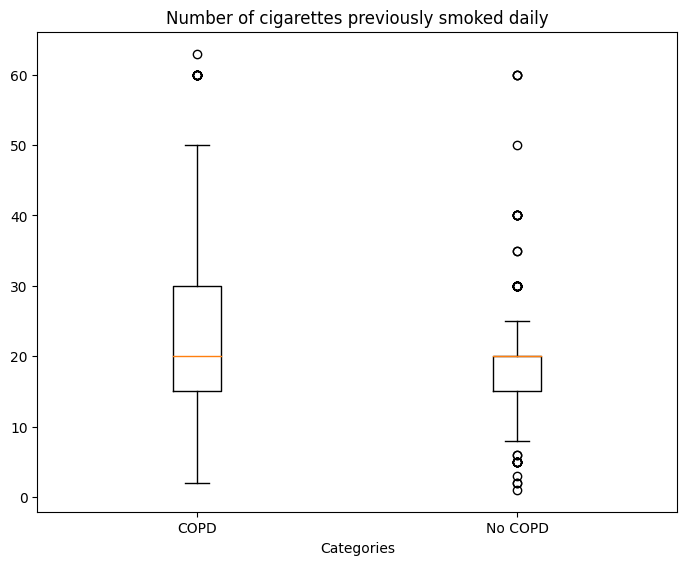

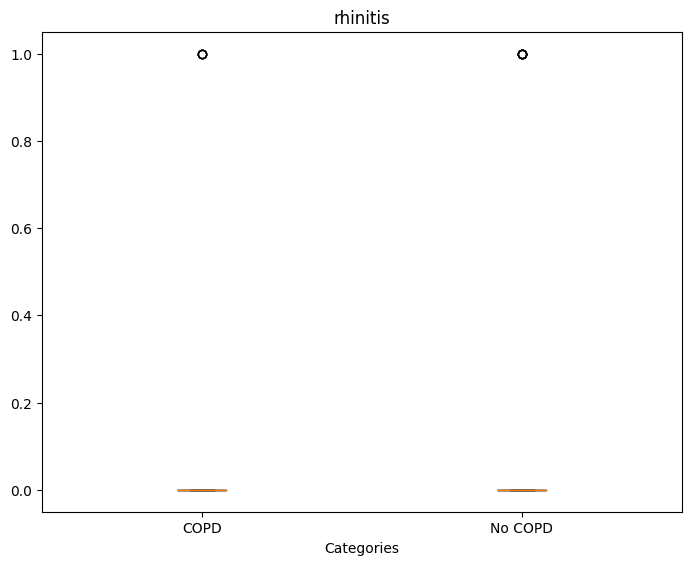

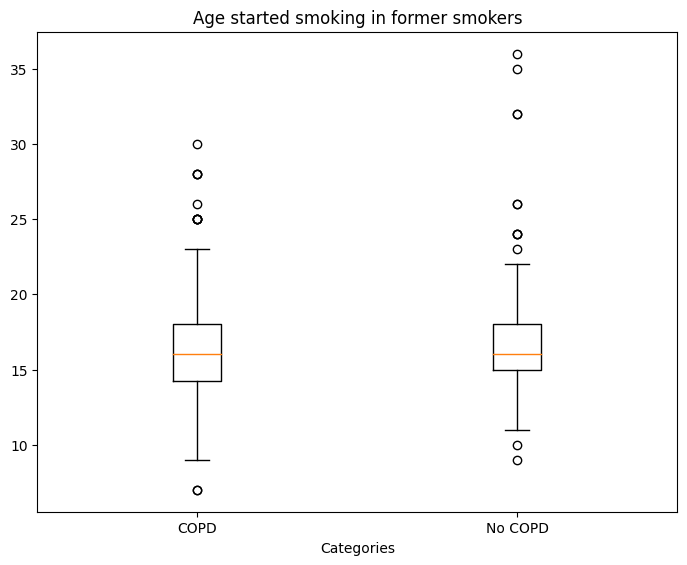

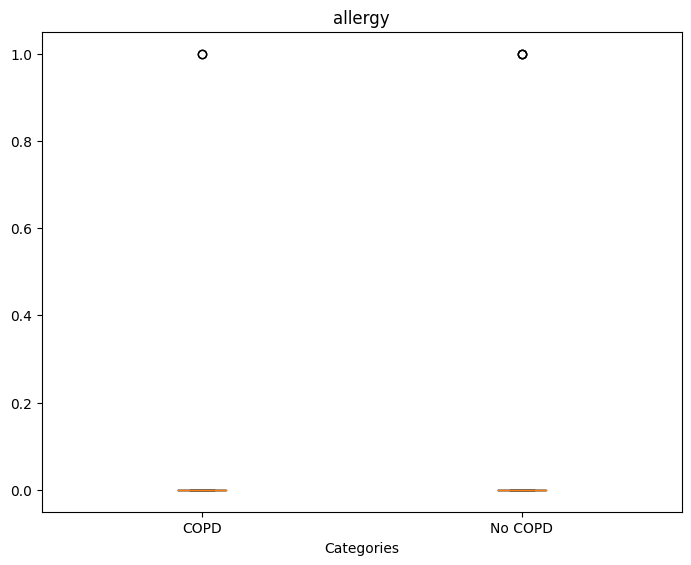

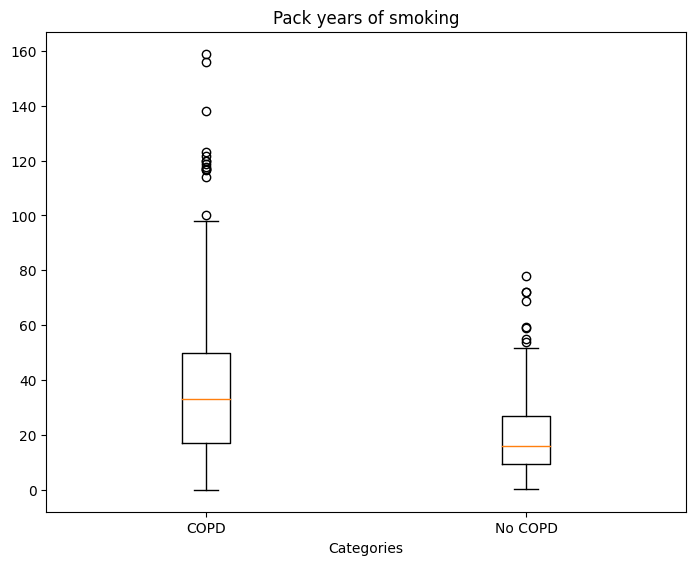

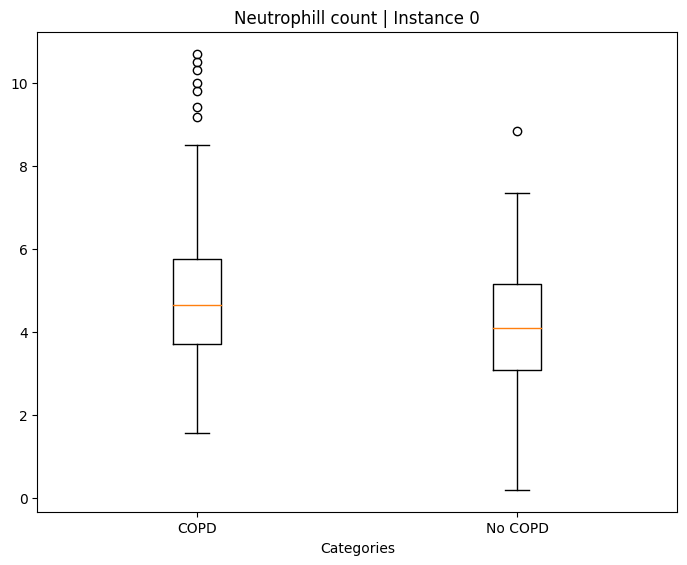

In [258]:
for i in ten_chronic_bronchitis:
    data = [[x for x in cohort[i].loc[((df["all_copd"] == 1) )].tolist() if str(x) != 'nan' ], 
            [x for x in cohort[i].loc[((df["all_copd"] == 0) )].tolist() if str(x) != 'nan' ]]
    
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ax.set_title(i)
    
    ax.set_xlabel("Categories")
    # Creating plot
    bp = ax.boxplot(data, labels=['COPD', 'No COPD'])

Number of missing values: 
 Pack years adult smoking as proportion of life span exposed to smoking    0
Age at recruitment                                                        0
Number of cigarettes previously smoked daily                              0
Brisk pace                                                                0
Body mass index (BMI) | Instance 0                                        0
chronic_sinusitis                                                         0
Steady average pace                                                       0
Neutrophill count | Instance 0                                            0
Pack years of smoking                                                     0
Hayfever_allergic_rhinitis_eczema_doctor                                  0
Date J43 first reported (emphysema)_binary                                0
dtype: int64
Dataframe dimensions:  (4788, 11)


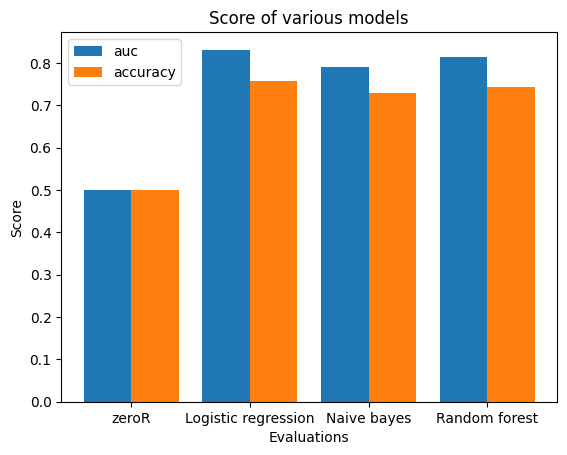

F1:  0.7570953224993544 0.7236748016640716 0.7463959915235431
auc:  [0.5, 0.8314282963766457, 0.7897436445452956, 0.8140369875490913]
accuracy:  [0.5, 0.7585615713684247, 0.7280687517315549, 0.7439405937570217]


In [259]:
datacolumns_selected_lab = ten_emphysema+['Date J43 first reported (emphysema)_binary']
cohort = df[datacolumns_selected_lab].dropna()
cohort = pd.concat([cohort[(cohort['Date J43 first reported (emphysema)_binary'] == 1)],
                    cohort[(cohort['Date J43 first reported (emphysema)_binary'] == 0)].sample(
                    cohort[(cohort['Date J43 first reported (emphysema)_binary'] == 1)].shape[0]
                    )])
cohort = cohort[datacolumns_selected_lab]
emp.pipeline(cohort, 'Date J43 first reported (emphysema)_binary', ten_emphysema,0.25, splits=5)

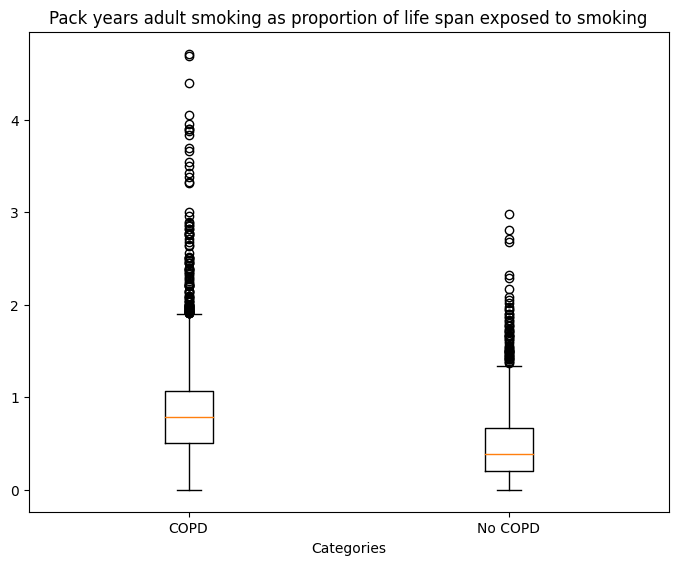

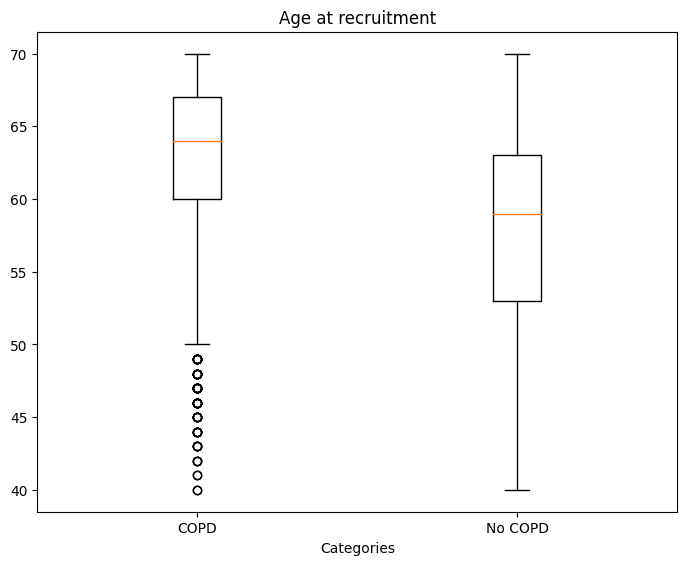

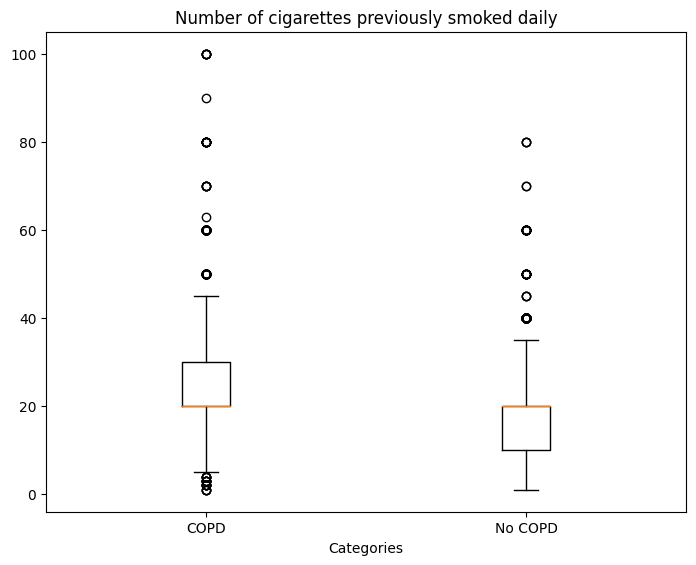

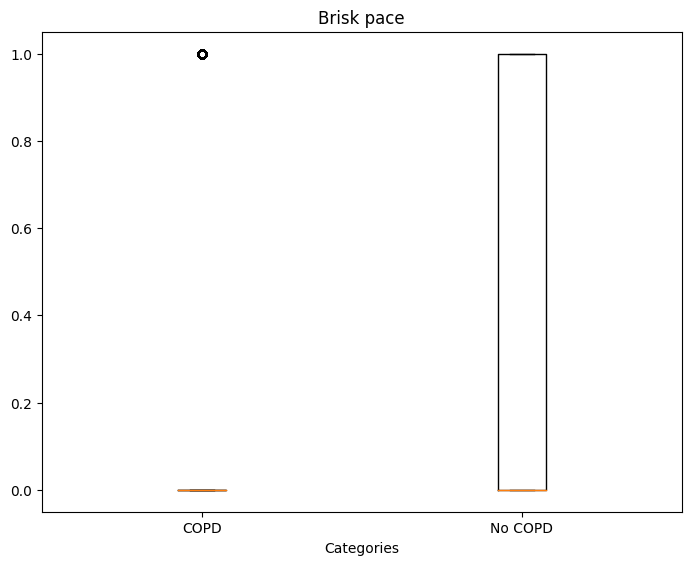

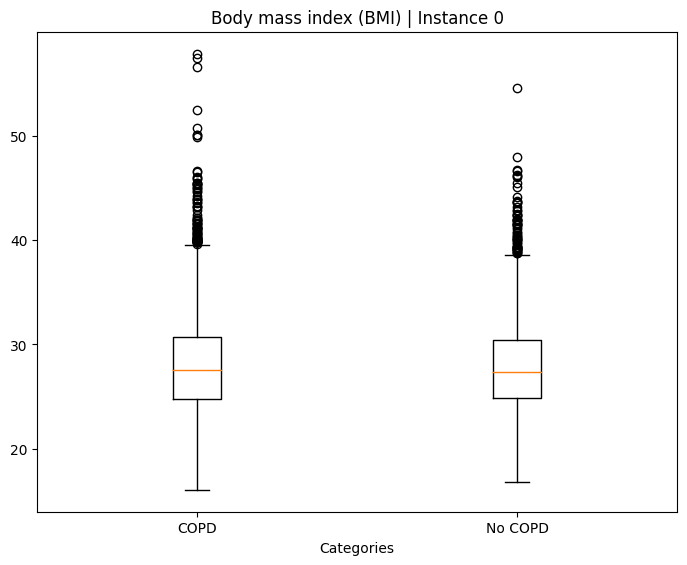

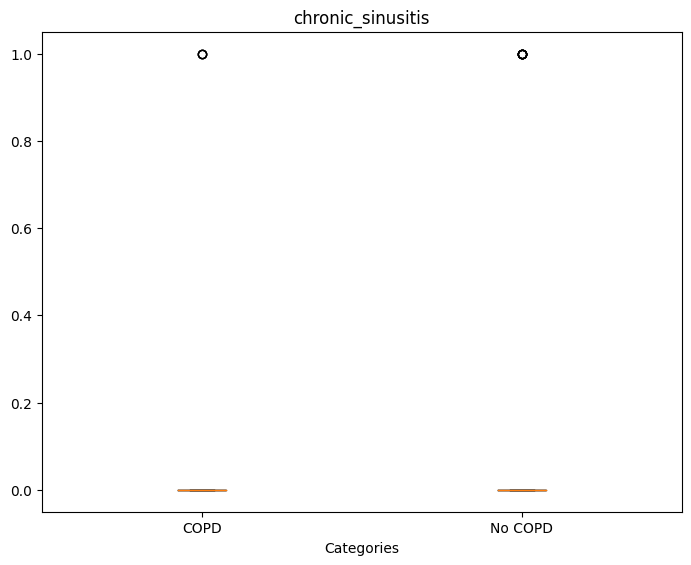

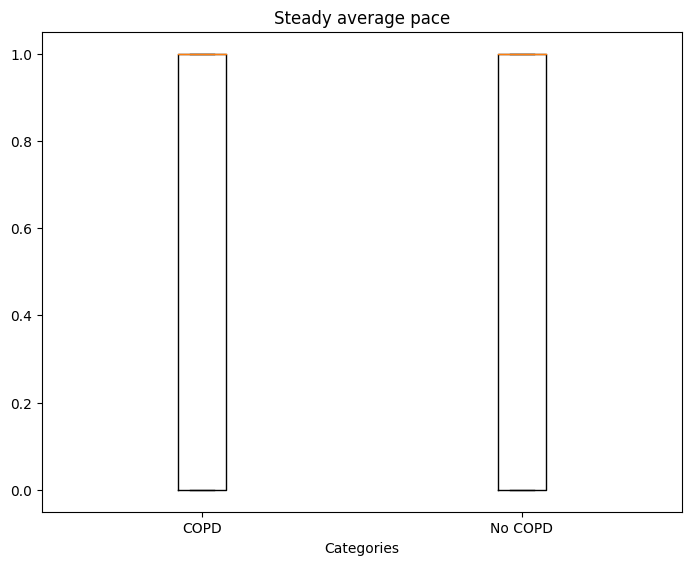

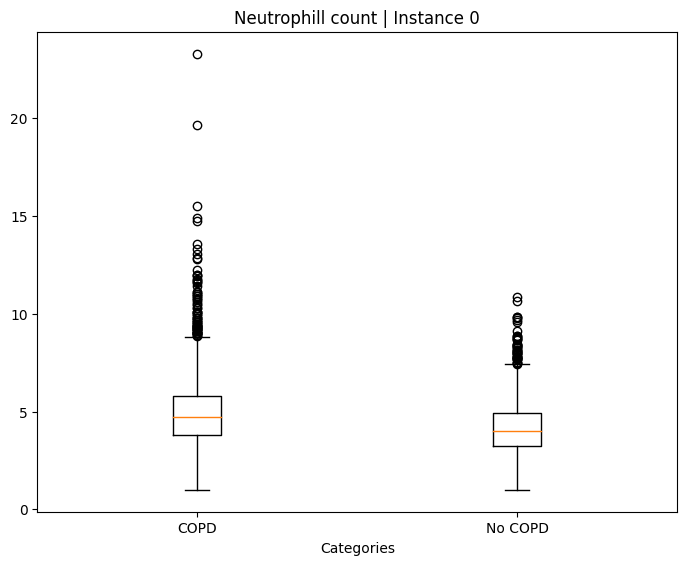

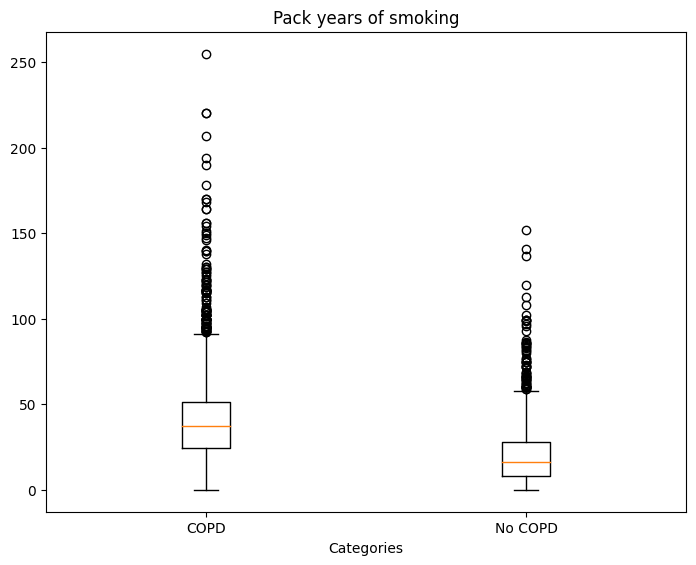

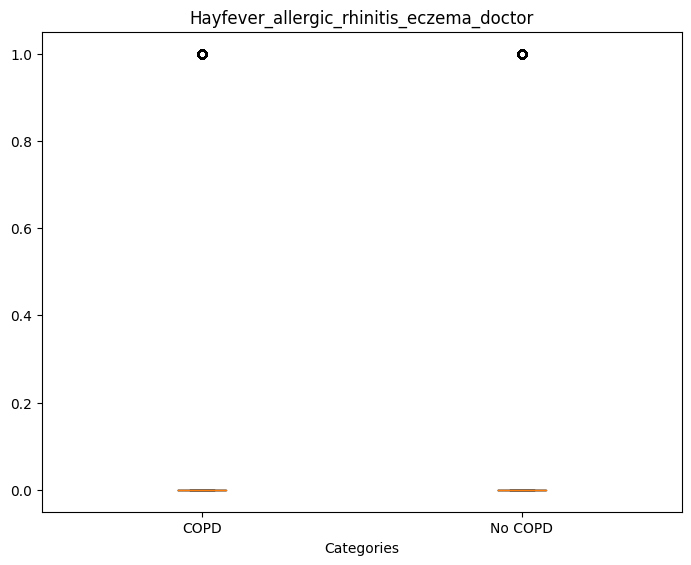

In [260]:
for i in ten_emphysema:
    data = [[x for x in cohort[i].loc[((df["all_copd"] == 1) )].tolist() if str(x) != 'nan' ], 
            [x for x in cohort[i].loc[((df["all_copd"] == 0) )].tolist() if str(x) != 'nan' ]]
    
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ax.set_title(i)
    
    ax.set_xlabel("Categories")
    # Creating plot
    bp = ax.boxplot(data, labels=['COPD', 'No COPD'])

Number of missing values: 
 Age at recruitment                                                              0
Brisk pace                                                                      0
Pack years adult smoking as proportion of life span exposed to smoking          0
Steady average pace                                                             0
Number of cigarettes previously smoked daily                                    0
Pack years of smoking                                                           0
Neutrophill count | Instance 0                                                  0
Doctor diagnosed asthma                                                         0
Eosinophill count | Instance 0                                                  0
Summed MET minutes per week for all activity | Instance 0                       0
Date J44 first reported (other chronic obstructive pulmonary disease)_binary    0
dtype: int64
Dataframe dimensions:  (15346, 11)


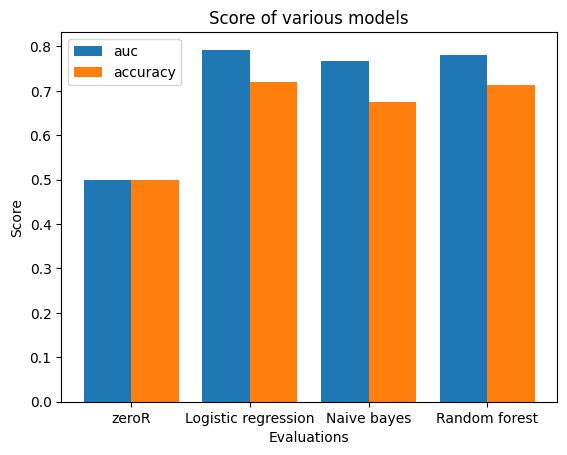

F1:  0.7064402119495325 0.6144608864944954 0.7138986287724367
auc:  [0.5, 0.792656422569951, 0.7679121175352543, 0.7808740757080508]
accuracy:  [0.5, 0.719145346498504, 0.6747036191482971, 0.7136716540205035]


In [261]:
datacolumns_selected_lab = ten_other+['Date J44 first reported (other chronic obstructive pulmonary disease)_binary']
cohort = df[datacolumns_selected_lab].dropna()
cohort = pd.concat([cohort[(cohort['Date J44 first reported (other chronic obstructive pulmonary disease)_binary'] == 1)],
                    cohort[(cohort['Date J44 first reported (other chronic obstructive pulmonary disease)_binary'] == 0)].sample(
                    cohort[(cohort['Date J44 first reported (other chronic obstructive pulmonary disease)_binary'] == 1)].shape[0]
                    )])
cohort = cohort[datacolumns_selected_lab]
emp.pipeline(cohort,'Date J44 first reported (other chronic obstructive pulmonary disease)_binary', ten_other,0.25, splits=5)

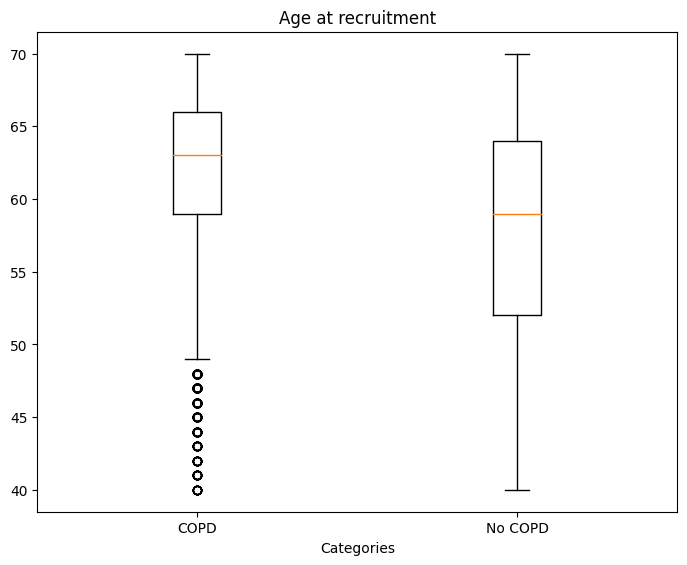

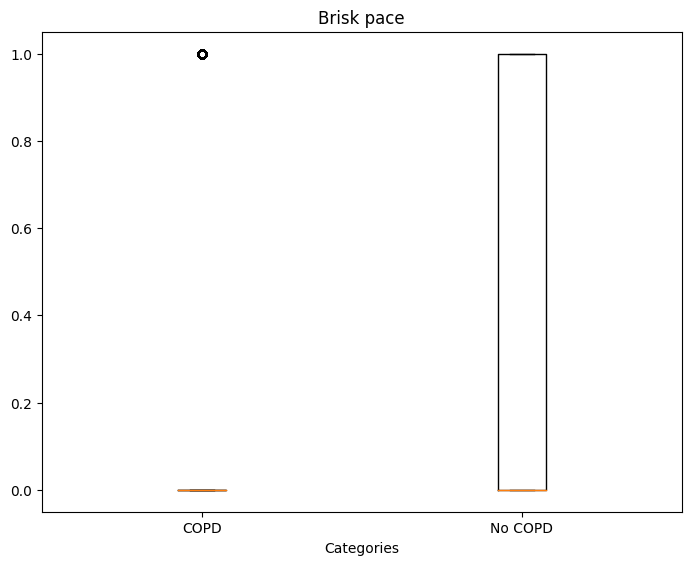

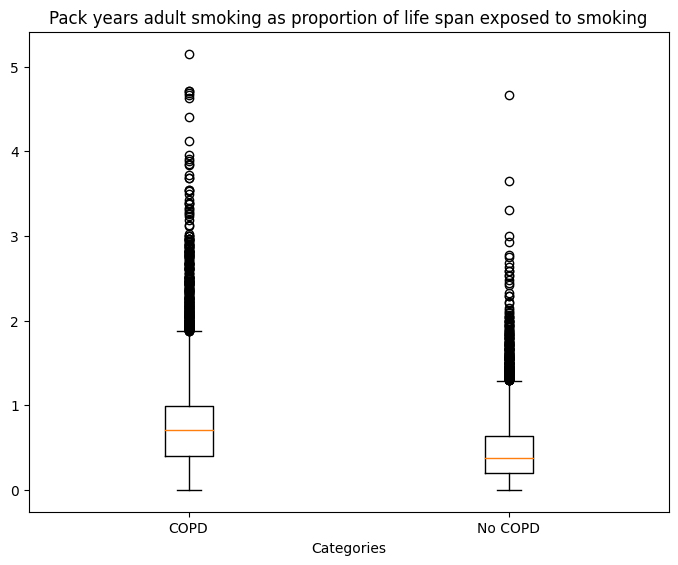

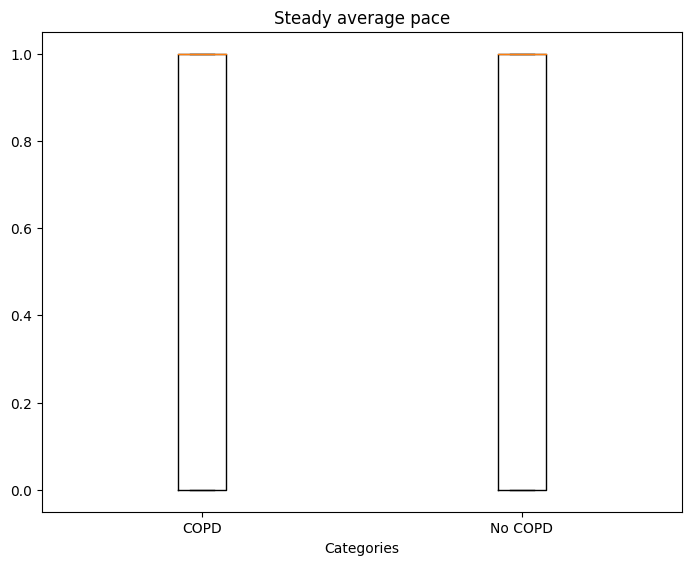

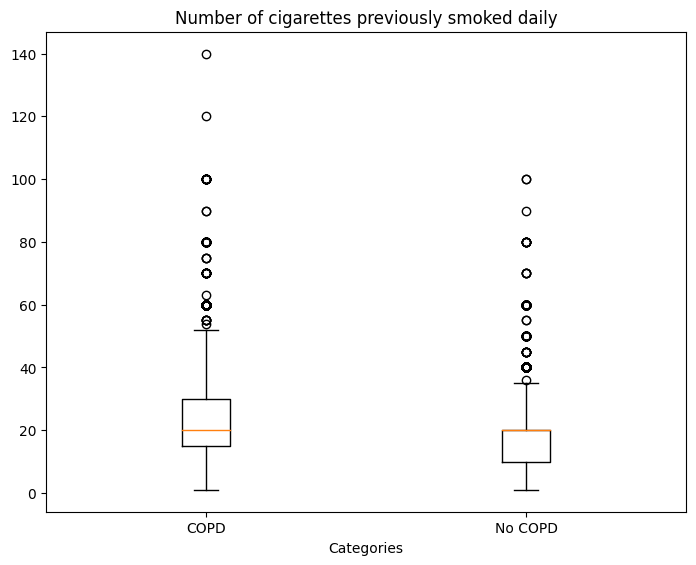

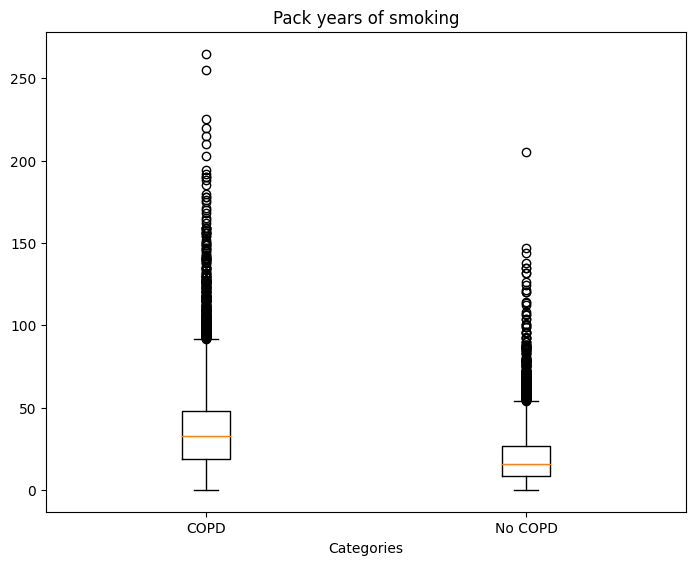

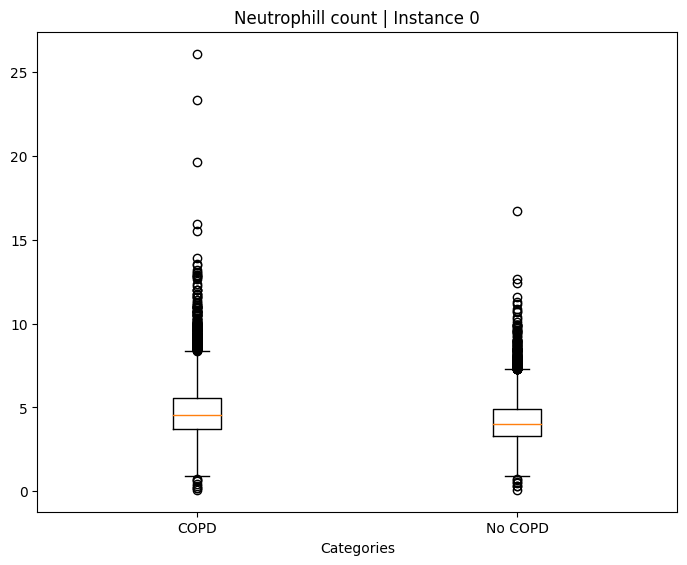

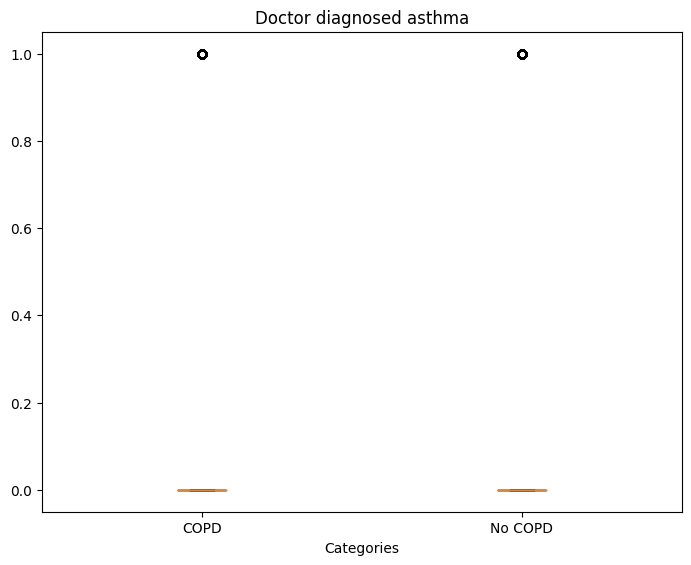

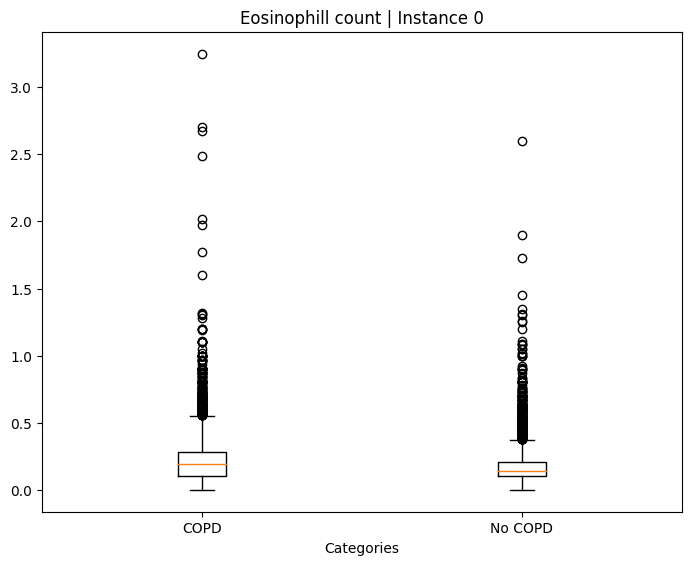

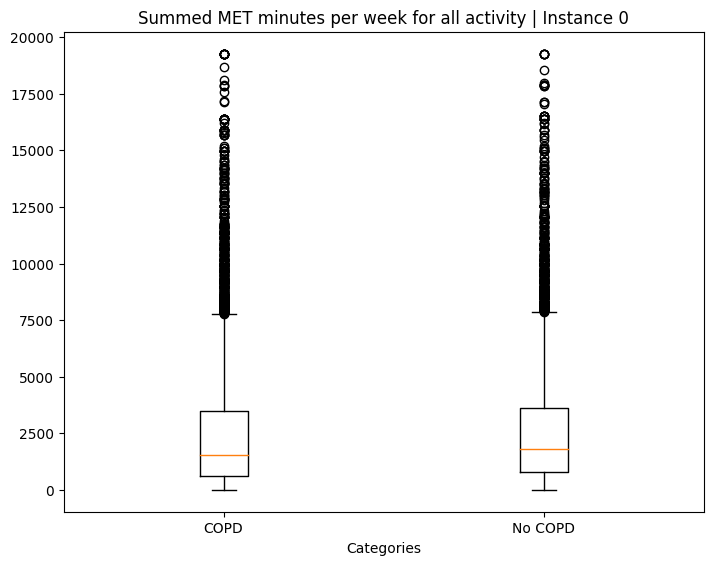

In [262]:
for i in ten_other:
    data = [[x for x in cohort[i].loc[((df["all_copd"] == 1) )].tolist() if str(x) != 'nan' ], 
            [x for x in cohort[i].loc[((df["all_copd"] == 0) )].tolist() if str(x) != 'nan' ]]
    
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ax.set_title(i)
    
    ax.set_xlabel("Categories")
    # Creating plot
    bp = ax.boxplot(data, labels=['COPD', 'No COPD'])

#### In current smokers

In [211]:
datacolumns_selected =[
 'Pack years of smoking',
 'Pack years adult smoking as proportion of life span exposed to smoking',
'Sex',

'Age at recruitment',
'Body mass index (BMI) | Instance 0',
'Standing height | Instance 0',
'allergy',
 'rhinitis',
 'eczema',
'asbestosis',
 'chronic_sinusitis',
 'nasal_polyps',
 'nasal_sinus_disorder',
 'pneumonia',
 'Hayfever_allergic_rhinitis_eczema_doctor',
'Haemoglobin concentration | Instance 0',
'Diastolic blood pressure, automated reading | Instance 0 | Array 0',
 'Systolic blood pressure, automated reading | Instance 0 | Array 0',
'Brisk pace',
 'Slow pace',
 'Steady average pace',
'Summed MET minutes per week for all activity | Instance 0',
'Summed minutes activity | Instance 0',
'Vitamin D | Instance 0',
'C-reactive protein | Instance 0',
'Cholesterol | Instance 0',
'Glycated haemoglobin (HbA1c) | Instance 0',
'Albumin | Instance 0',
'IGF-1 | Instance 0',
    'Eosinophill count | Instance 0',
    'Neutrophill count | Instance 0',
    'Lymphocyte count | Instance 0',
    'Doctor diagnosed asthma',
    'Age started smoking in current smokers',
    'Number of cigarettes currently smoked daily (current cigarette smokers)'
]

Date J40 first reported (bronchitis, not specified as acute or chronic)_binary
Number of missing values: 
 Pack years of smoking                                                             0
Pack years adult smoking as proportion of life span exposed to smoking            0
Sex                                                                               0
Age at recruitment                                                                0
Body mass index (BMI) | Instance 0                                                0
Standing height | Instance 0                                                      0
allergy                                                                           0
rhinitis                                                                          0
eczema                                                                            0
asbestosis                                                                        0
chronic_sinusitis                                    

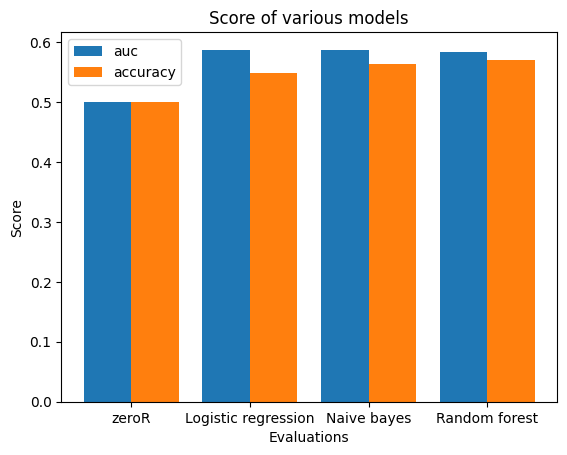

F1:  0.5254266265499763 0.46113597474265844 0.5482863561955078
auc:  [0.5, 0.5867056033566416, 0.5870749196189171, 0.5834297137263369]
accuracy:  [0.5, 0.5477688561274187, 0.5627352902461498, 0.5693080601992014]




Date J41 first reported (simple and mucopurulent chronic bronchitis)_binary
Number of missing values: 
 Pack years of smoking                                                          0
Pack years adult smoking as proportion of life span exposed to smoking         0
Sex                                                                            0
Age at recruitment                                                             0
Body mass index (BMI) | Instance 0                                             0
Standing height | Instance 0                                                   0
allergy                                                                        0
rhinitis                                                                       0
eczema                          

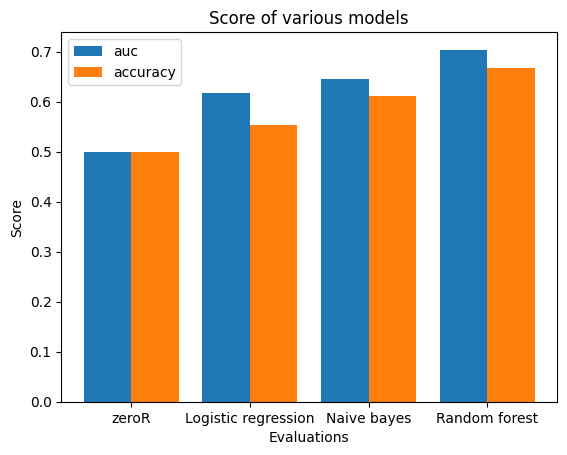

F1:  0.5764102564102563 0.5724242424242424 0.6647435897435897
auc:  [0.5, 0.6168367346938776, 0.6448979591836734, 0.7038265306122449]
accuracy:  [0.5, 0.5533333333333333, 0.6114285714285714, 0.6666666666666666]




Date J42 first reported (unspecified chronic bronchitis)_binary
Number of missing values: 
 Pack years of smoking                                                      0
Pack years adult smoking as proportion of life span exposed to smoking     0
Sex                                                                        0
Age at recruitment                                                         0
Body mass index (BMI) | Instance 0                                         0
Standing height | Instance 0                                               0
allergy                                                                    0
rhinitis                                                                   0
eczema                                                                     0


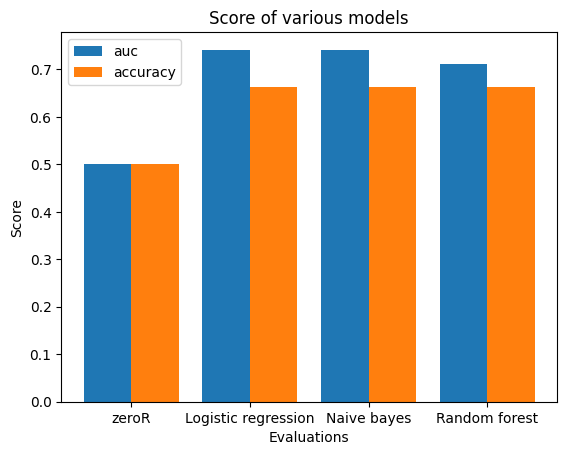

F1:  0.6556785243741765 0.6834578754578755 0.6373913043478261
auc:  [0.5, 0.7404958677685951, 0.7413223140495868, 0.7107438016528925]
accuracy:  [0.5, 0.6636363636363637, 0.6636363636363636, 0.6636363636363636]




Date J43 first reported (emphysema)_binary
Number of missing values: 
 Pack years of smoking                                                      0
Pack years adult smoking as proportion of life span exposed to smoking     0
Sex                                                                        0
Age at recruitment                                                         0
Body mass index (BMI) | Instance 0                                         0
Standing height | Instance 0                                               0
allergy                                                                    0
rhinitis                                                                   0
eczema                                                                     0
asbestosis           

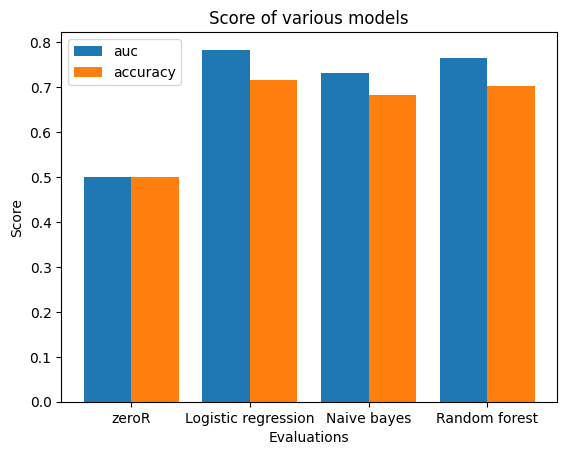

F1:  0.7193362524254749 0.6875729862449431 0.709407165815092
auc:  [0.5, 0.783584328477962, 0.730747561988759, 0.7658458238456898]
accuracy:  [0.5, 0.7161765026251008, 0.6825447138531251, 0.7035629479554714]




Date J44 first reported (other chronic obstructive pulmonary disease)_binary
Number of missing values: 
 Pack years of smoking                                                           0
Pack years adult smoking as proportion of life span exposed to smoking          0
Sex                                                                             0
Age at recruitment                                                              0
Body mass index (BMI) | Instance 0                                              0
Standing height | Instance 0                                                    0
allergy                                                                         0
rhinitis                                                                        0
eczema                     

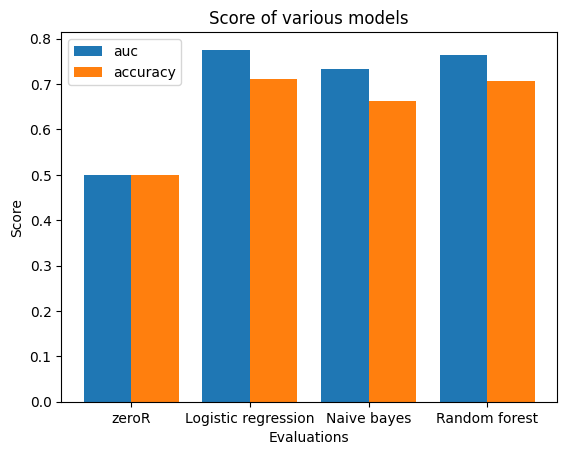

F1:  0.7153200800520524 0.6249060196247179 0.7129039322626602
auc:  [0.5, 0.7755845232196747, 0.7333444439439666, 0.7640915274086754]
accuracy:  [0.5, 0.7100671140939597, 0.6636241610738255, 0.7061744966442953]




Date J47 first reported (bronchiectasis)_binary
Number of missing values: 
 Pack years of smoking                                                      0
Pack years adult smoking as proportion of life span exposed to smoking     0
Sex                                                                        0
Age at recruitment                                                         0
Body mass index (BMI) | Instance 0                                         0
Standing height | Instance 0                                               0
allergy                                                                    0
rhinitis                                                                   0
eczema                                                                     0
asbestosis      

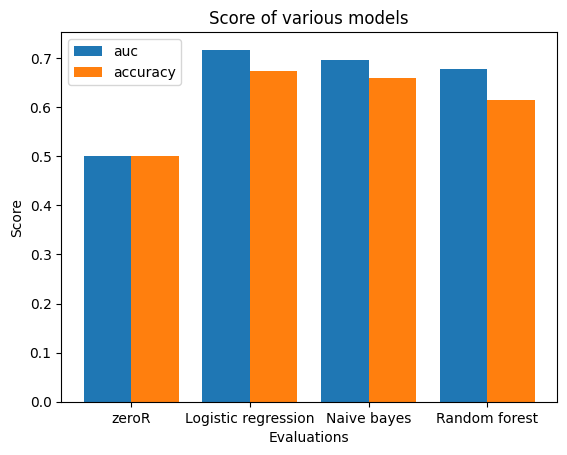

F1:  0.6798198636420218 0.6556560876852869 0.6130595012154163
auc:  [0.5, 0.7169586776859503, 0.6951404958677686, 0.6784793388429752]
accuracy:  [0.5, 0.6745454545454546, 0.66, 0.6145454545454545]






In [213]:
for i in c:
    print(i)
    datacolumns_selected_lab = datacolumns_selected+[i]
    cohort = df[datacolumns_selected_lab].dropna()
    cohort = pd.concat([cohort[(cohort[i] == 1)],
                        cohort[(cohort[i] == 0)].sample(
                        cohort[(cohort[i] == 1)].shape[0]
                        )])
    cohort = cohort[datacolumns_selected_lab]
    emp.pipeline(cohort, i, datacolumns_selected,0.25, splits=5)
    print("\n\n\n")

Date J40 first reported (bronchitis, not specified as acute or chronic)_binary
Date J41 first reported (simple and mucopurulent chronic bronchitis)_binary
Date J42 first reported (unspecified chronic bronchitis)_binary
Date J43 first reported (emphysema)_binary
Date J44 first reported (other chronic obstructive pulmonary disease)_binary
Date J47 first reported (bronchiectasis)_binary


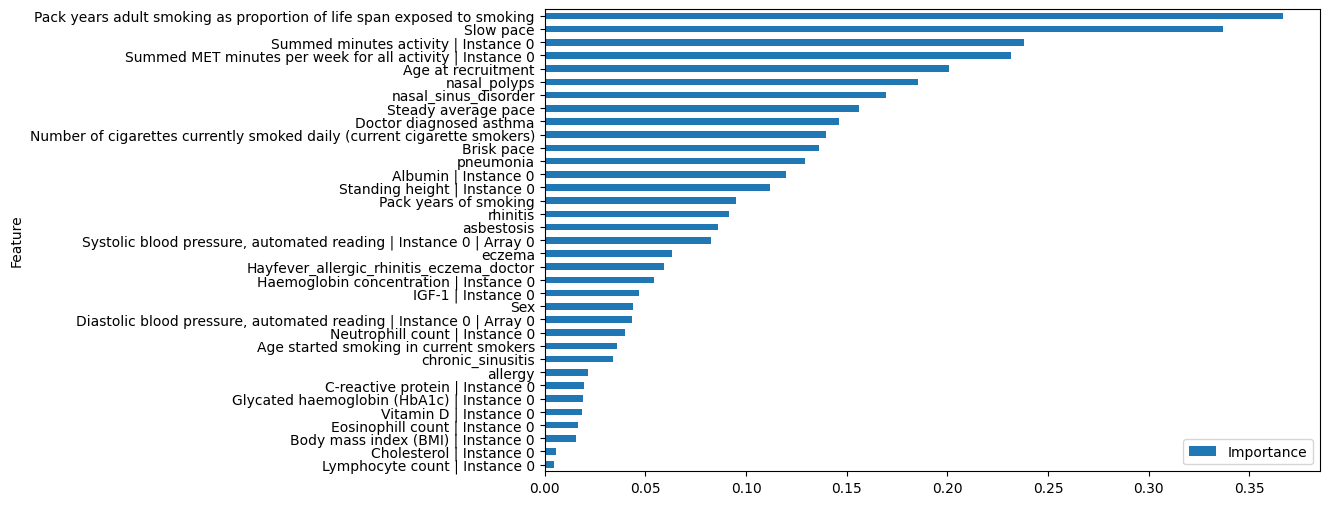

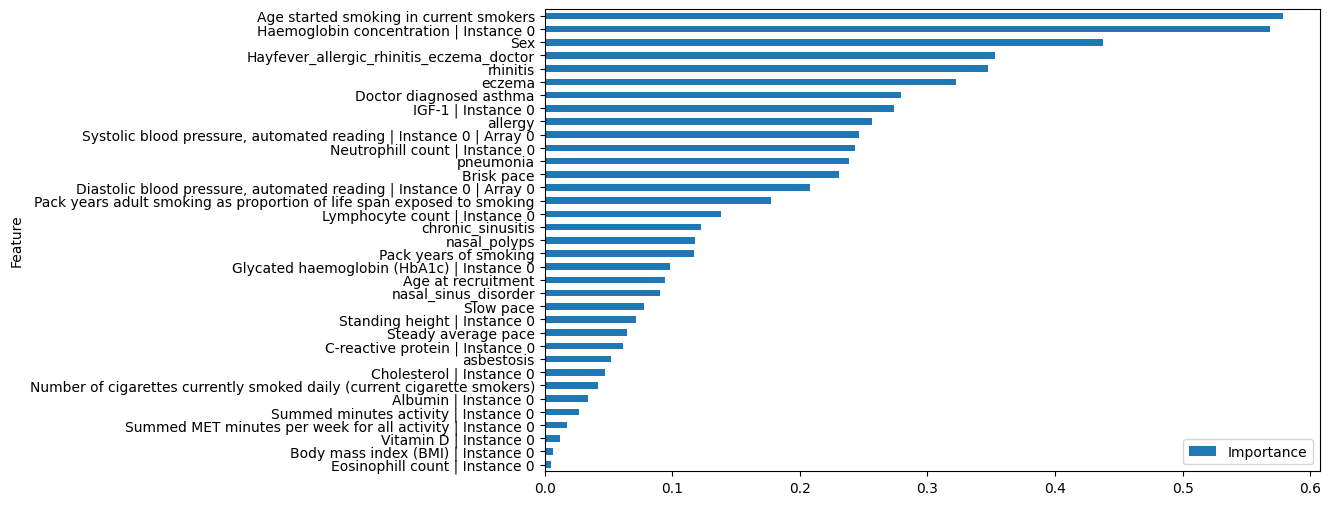

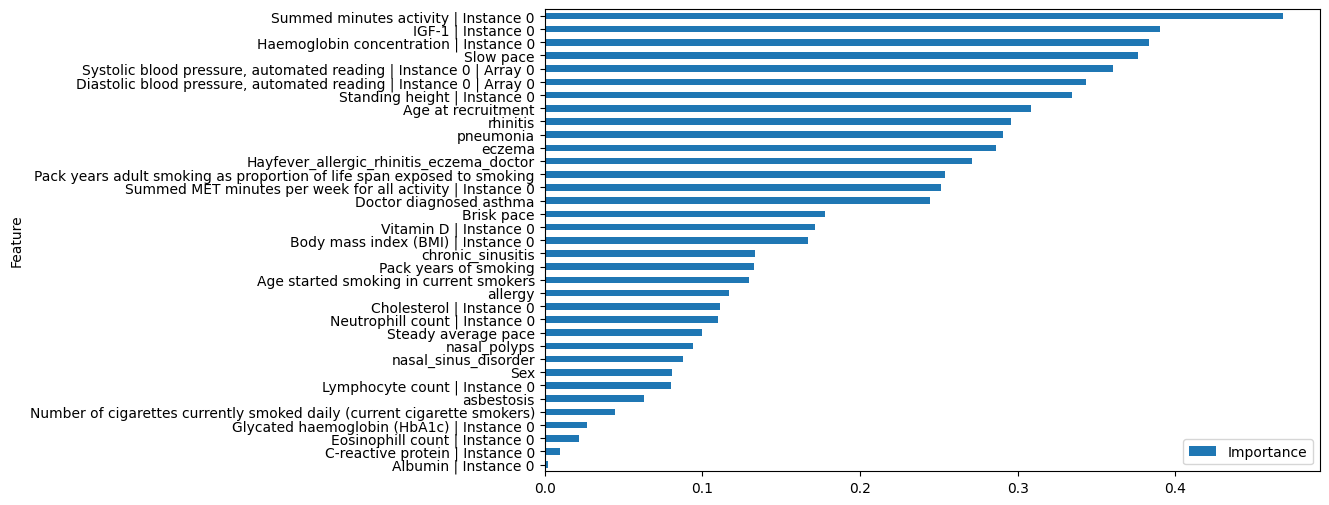

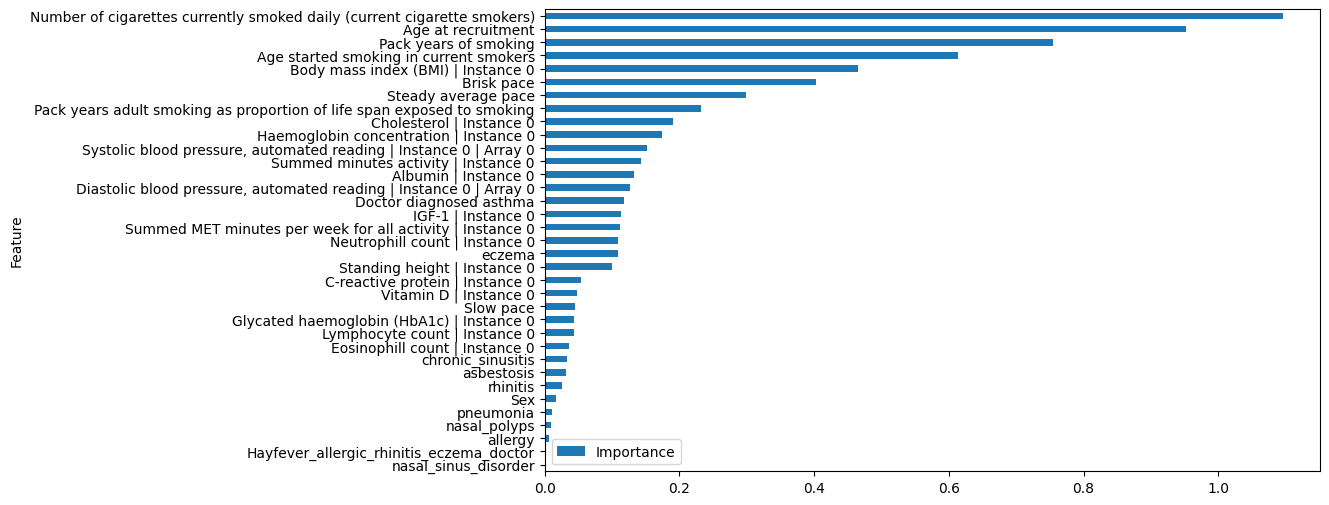

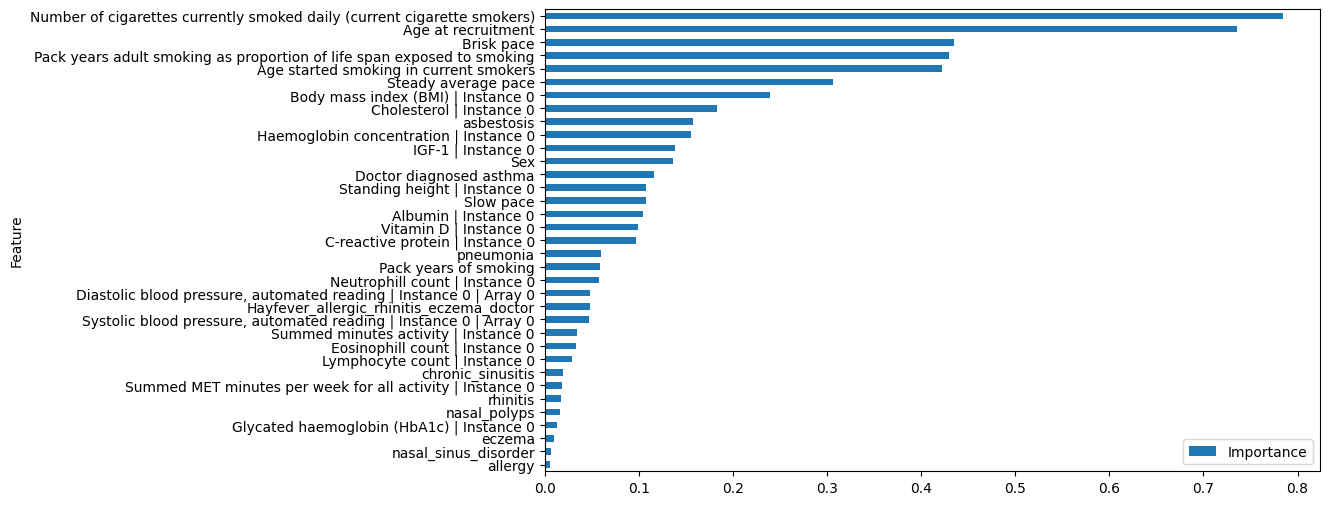

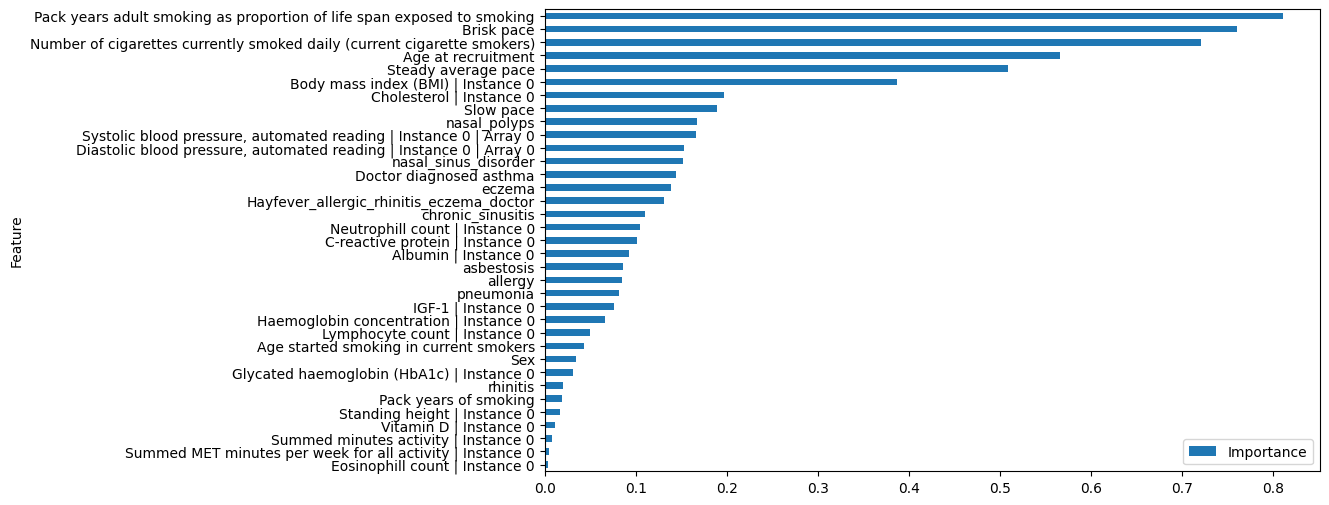

In [212]:
for i in c:
    print(i)
    tdf = df[datacolumns_selected+[i]].dropna()
    
    X = tdf[datacolumns_selected]
    y = tdf[i]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    
    coefficients = model.coef_[0]
    
    feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
    feature_importance = feature_importance.sort_values('Importance', ascending=True)
    feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
    

In [215]:
ten_emphysema = [
    'Number of cigarettes currently smoked daily (current cigarette smokers)',
    'Age at recruitment',
    'Pack years of smoking',
    'Age started smoking in current smokers',
    'Body mass index (BMI) | Instance 0',
    'Brisk pace',
    'Steady average pace',
    'Pack years adult smoking as proportion of life span exposed to smoking',
    'Cholesterol | Instance 0',
    'Haemoglobin concentration | Instance 0'
]
ten_other = [
    'Number of cigarettes currently smoked daily (current cigarette smokers)',
    'Age at recruitment',
    'Brisk pace',
    'Pack years adult smoking as proportion of life span exposed to smoking',
    'Age started smoking in current smokers',
    'Steady average pace',
    'Body mass index (BMI) | Instance 0',
    'Cholesterol | Instance 0',
    'asbestosis',
    'Haemoglobin concentration | Instance 0'
]

Number of missing values: 
 Number of cigarettes currently smoked daily (current cigarette smokers)    0
Age at recruitment                                                         0
Pack years of smoking                                                      0
Age started smoking in current smokers                                     0
Body mass index (BMI) | Instance 0                                         0
Brisk pace                                                                 0
Steady average pace                                                        0
Pack years adult smoking as proportion of life span exposed to smoking     0
Cholesterol | Instance 0                                                   0
Haemoglobin concentration | Instance 0                                     0
Date J43 first reported (emphysema)_binary                                 0
dtype: int64
Dataframe dimensions:  (3552, 11)


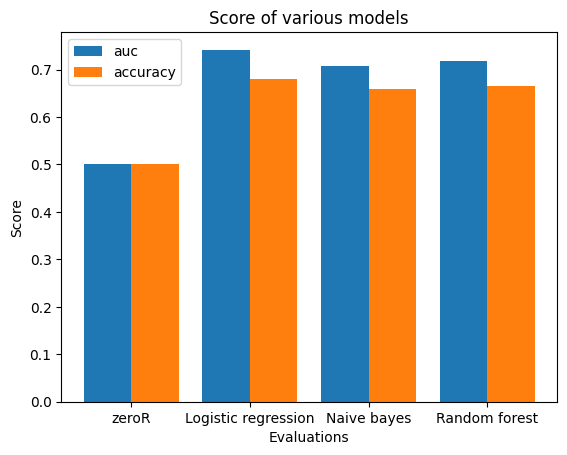

F1:  0.6893189743250866 0.6705139520918267 0.6728351306699212
auc:  [0.5, 0.7416976121645206, 0.7082832191757922, 0.7171581837917838]
accuracy:  [0.5, 0.680739684237634, 0.6579362532437947, 0.6644095798419207]


In [251]:
datacolumns_selected_lab = ten_emphysema+['Date J43 first reported (emphysema)_binary']
cohort = df[datacolumns_selected_lab].dropna()
cohort = pd.concat([cohort[(cohort['Date J43 first reported (emphysema)_binary'] == 1)],
                    cohort[(cohort['Date J43 first reported (emphysema)_binary'] == 0)].sample(
                    cohort[(cohort['Date J43 first reported (emphysema)_binary'] == 1)].shape[0]
                    )])
cohort = cohort[datacolumns_selected_lab]
emp.pipeline(cohort, 'Date J43 first reported (emphysema)_binary', ten_emphysema,0.25, splits=5)

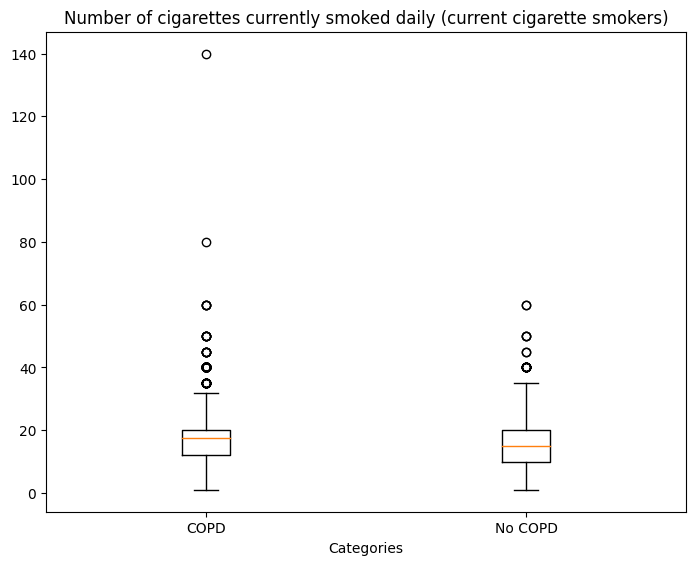

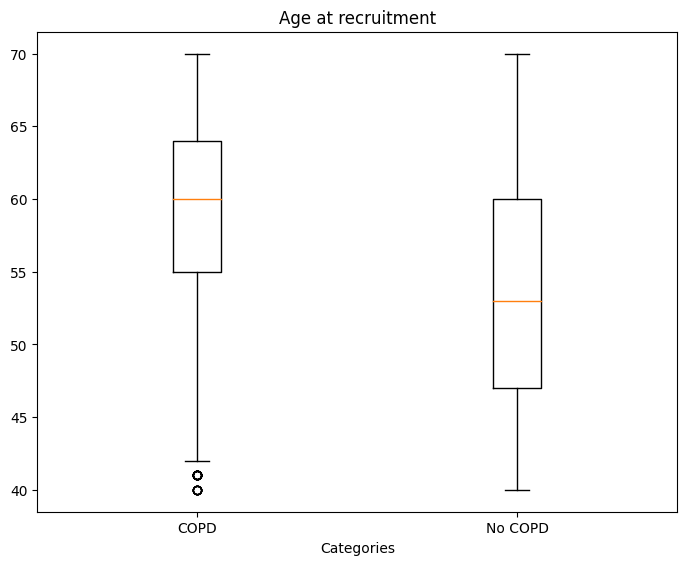

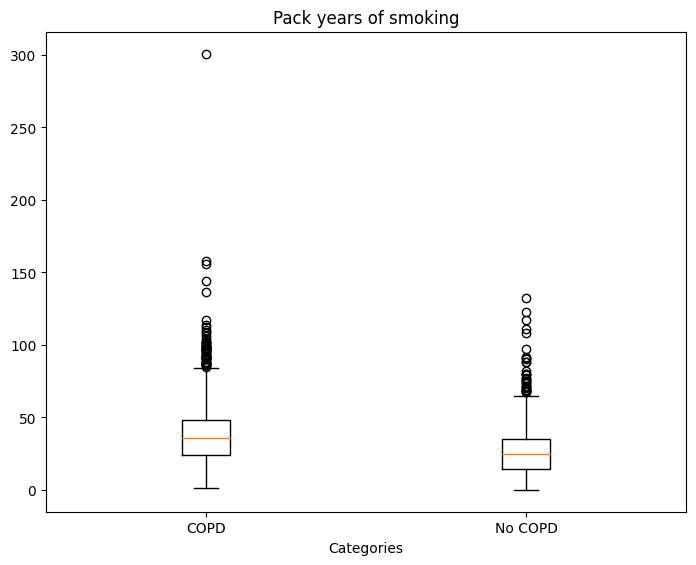

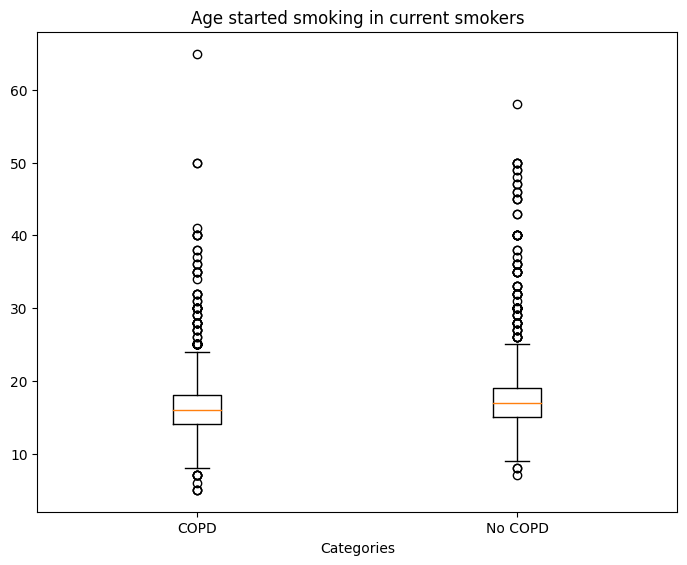

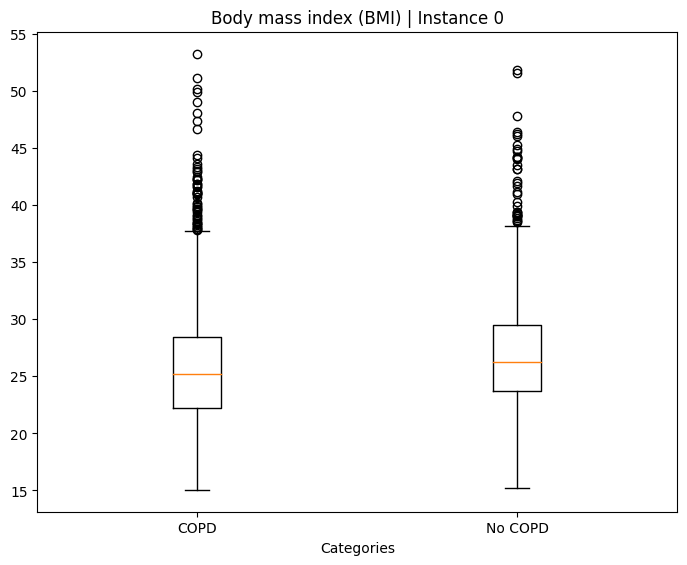

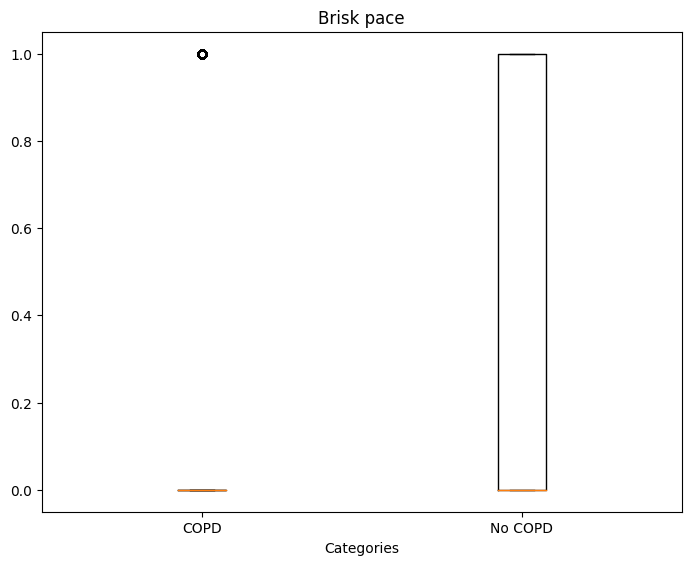

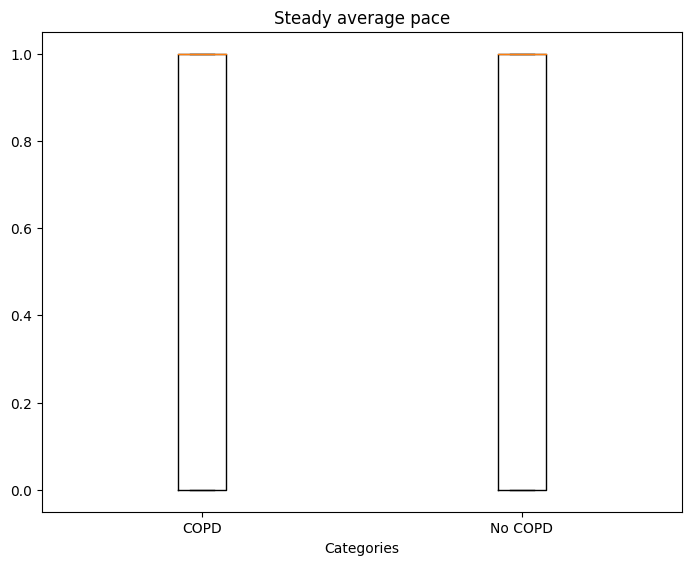

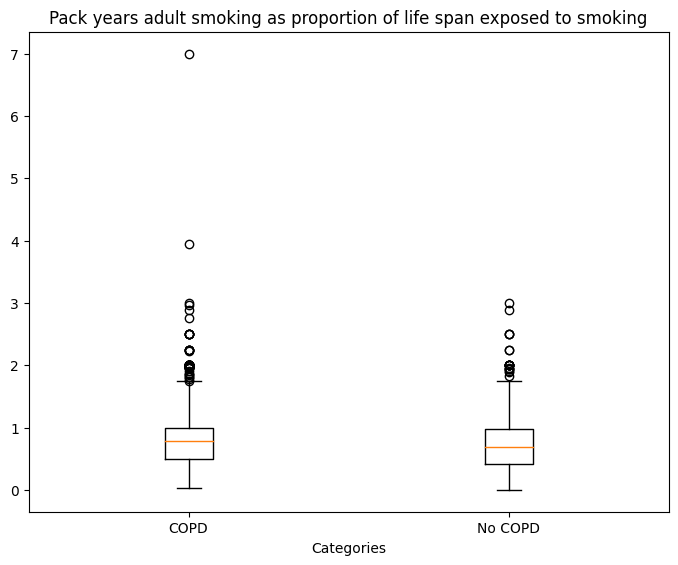

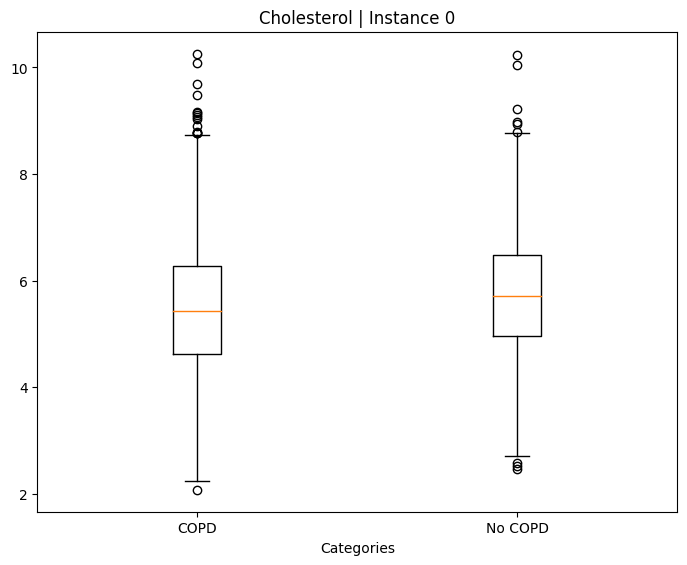

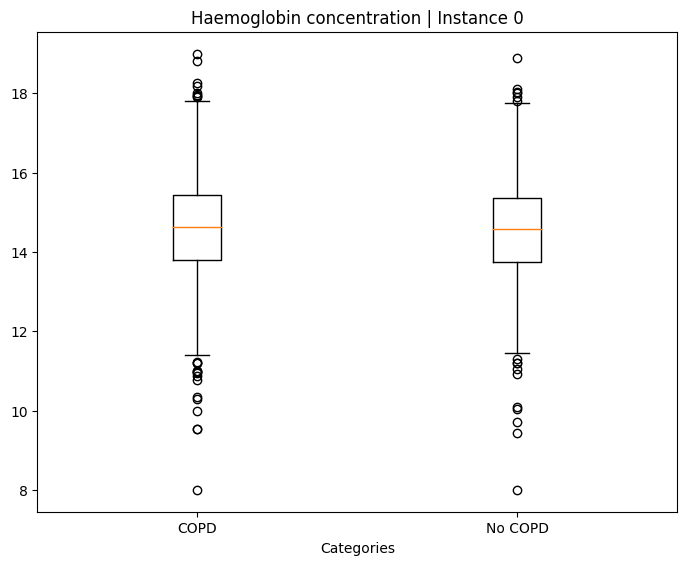

In [252]:
for i in ten_emphysema:
    data = [[x for x in cohort[i].loc[((df["all_copd"] == 1) )].tolist() if str(x) != 'nan' ], 
            [x for x in cohort[i].loc[((df["all_copd"] == 0) )].tolist() if str(x) != 'nan' ]]
    
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ax.set_title(i)
    
    ax.set_xlabel("Categories")
    # Creating plot
    bp = ax.boxplot(data, labels=['COPD', 'No COPD'])

Number of missing values: 
 Number of cigarettes currently smoked daily (current cigarette smokers)         0
Age at recruitment                                                              0
Brisk pace                                                                      0
Pack years adult smoking as proportion of life span exposed to smoking          0
Age started smoking in current smokers                                          0
Steady average pace                                                             0
Body mass index (BMI) | Instance 0                                              0
Cholesterol | Instance 0                                                        0
asbestosis                                                                      0
Haemoglobin concentration | Instance 0                                          0
Date J44 first reported (other chronic obstructive pulmonary disease)_binary    0
dtype: int64
Dataframe dimensions:  (13266, 11)


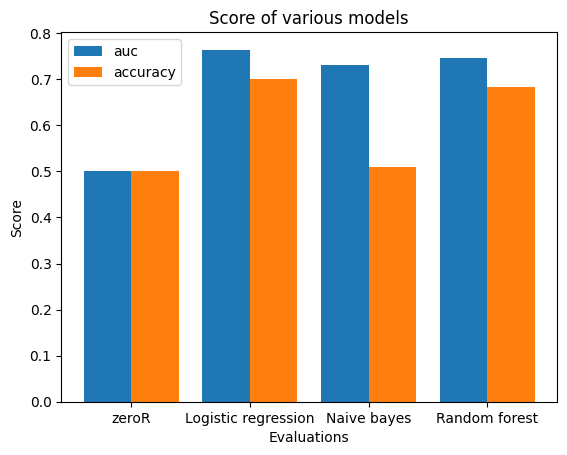

F1:  0.7030277089433495 0.05106358658857479 0.6906455032453288
auc:  [0.5, 0.7641575466498395, 0.7320596210525366, 0.7456162917731533]
accuracy:  [0.5, 0.7002119282574134, 0.5099502035346373, 0.682723060810997]


In [253]:
datacolumns_selected_lab = ten_other+['Date J44 first reported (other chronic obstructive pulmonary disease)_binary']
cohort = df[datacolumns_selected_lab].dropna()
cohort = pd.concat([cohort[(cohort['Date J44 first reported (other chronic obstructive pulmonary disease)_binary'] == 1)],
                    cohort[(cohort['Date J44 first reported (other chronic obstructive pulmonary disease)_binary'] == 0)].sample(
                    cohort[(cohort['Date J44 first reported (other chronic obstructive pulmonary disease)_binary'] == 1)].shape[0]
                    )])
cohort = cohort[datacolumns_selected_lab]
emp.pipeline(cohort,'Date J44 first reported (other chronic obstructive pulmonary disease)_binary', ten_other,0.25, splits=5)

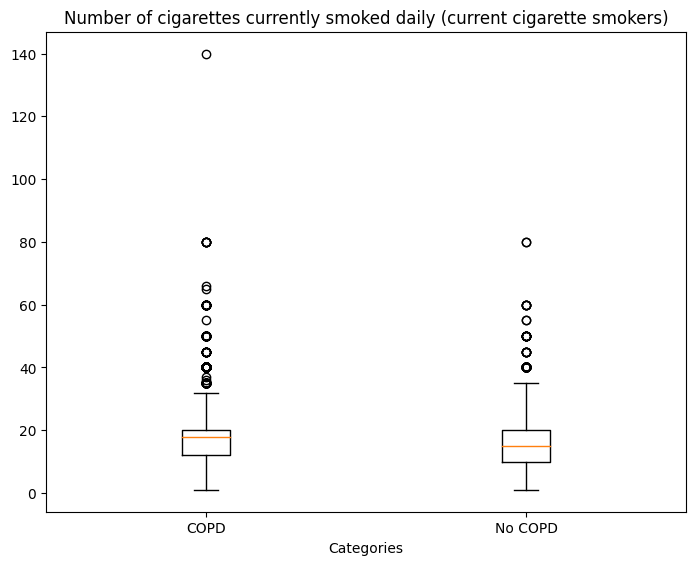

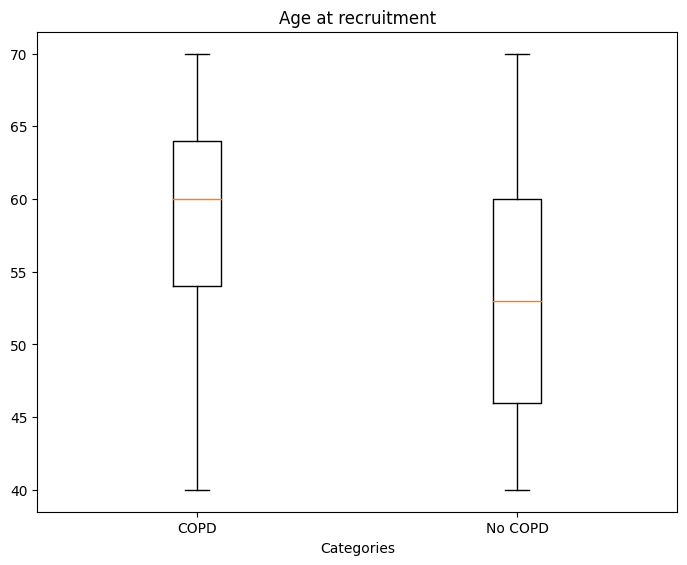

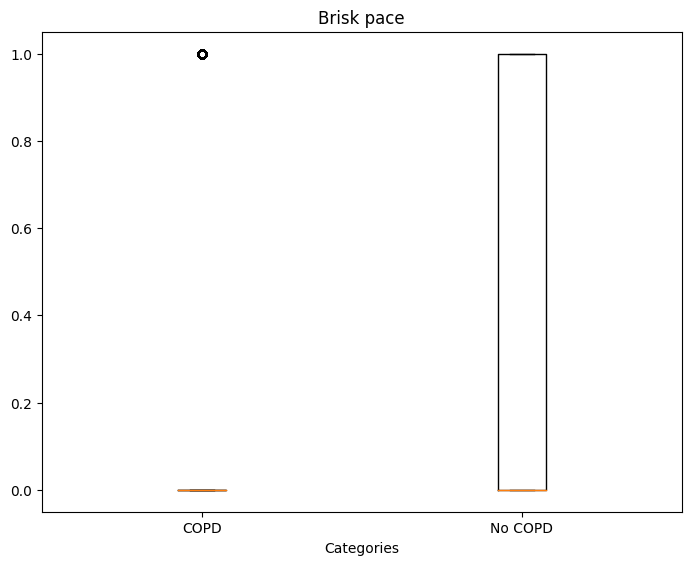

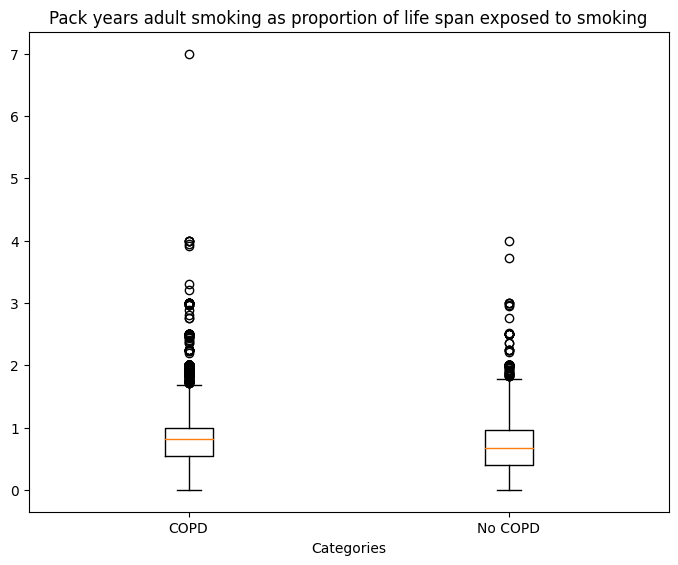

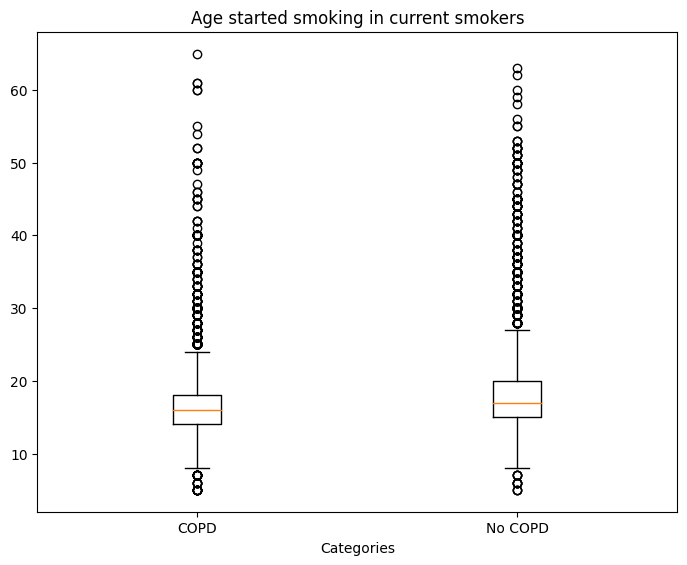

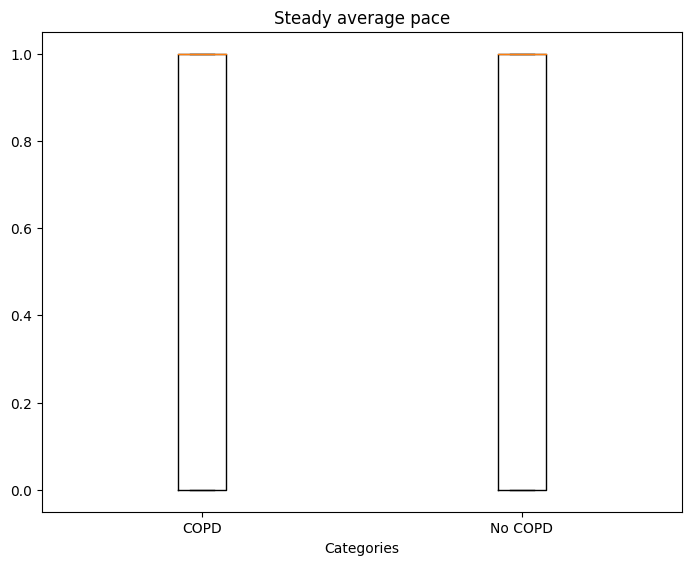

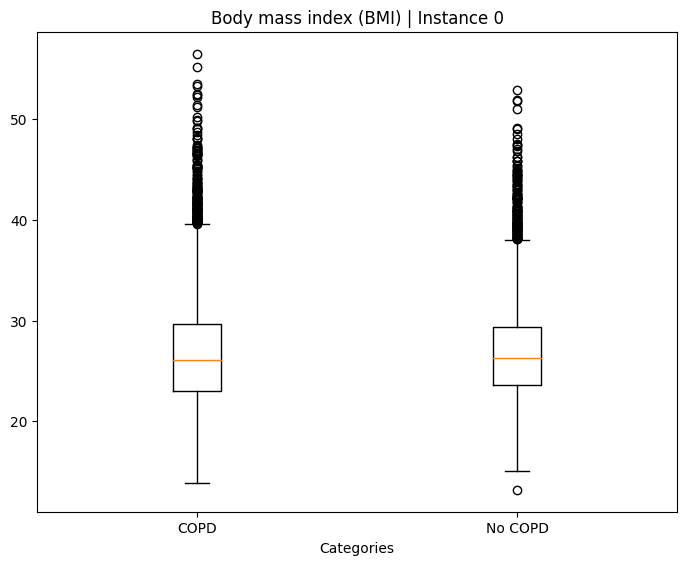

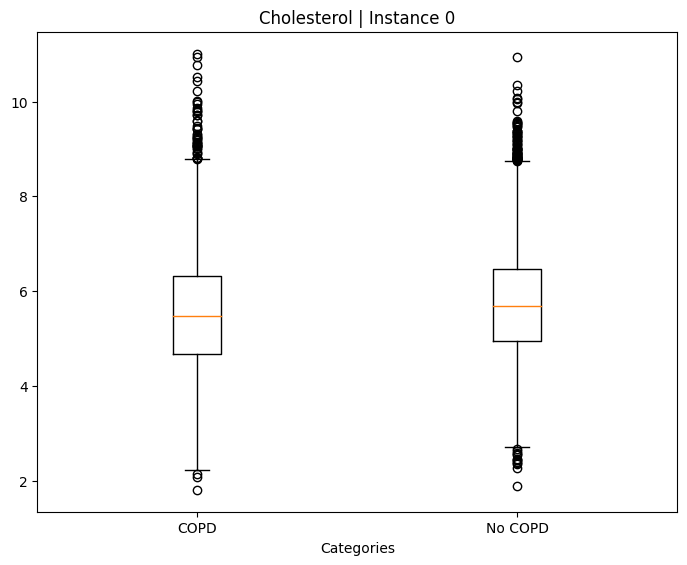

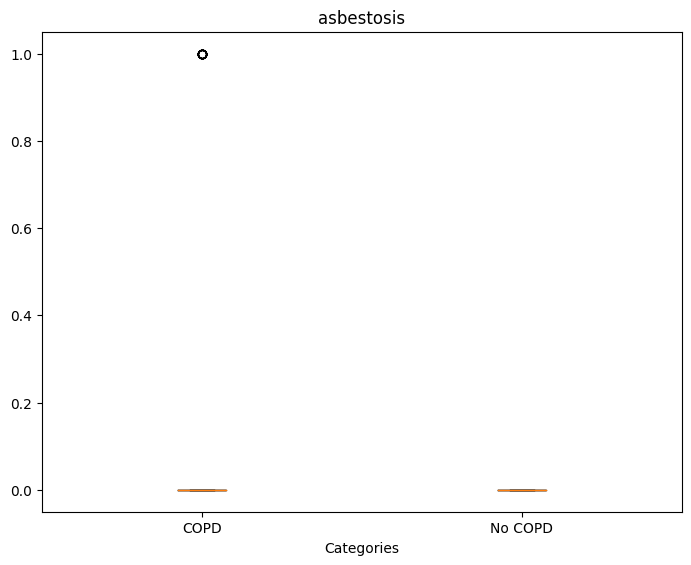

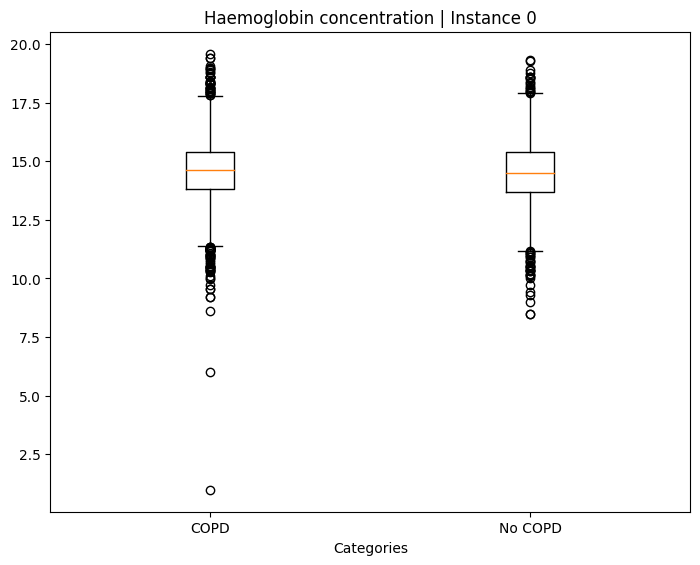

In [255]:
for i in ten_other:
    data = [[x for x in cohort[i].loc[((df["all_copd"] == 1) )].tolist() if str(x) != 'nan' ], 
            [x for x in cohort[i].loc[((df["all_copd"] == 0) )].tolist() if str(x) != 'nan' ]]
    
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ax.set_title(i)
    
    ax.set_xlabel("Categories")
    # Creating plot
    bp = ax.boxplot(data, labels=['COPD', 'No COPD'])

### Using knn

In [ ]:
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [263]:
datacolumns_selected =[
 'Pack years of smoking',
 'Pack years adult smoking as proportion of life span exposed to smoking',
'Sex',
'Age at recruitment',
'Body mass index (BMI) | Instance 0',
'Standing height | Instance 0',
'allergy',
 'rhinitis',
 'eczema',
'asbestosis',
 'chronic_sinusitis',
 'nasal_polyps',
 'nasal_sinus_disorder',
 'pneumonia',
 'Hayfever_allergic_rhinitis_eczema_doctor',
'Haemoglobin concentration | Instance 0',
'Diastolic blood pressure, automated reading | Instance 0 | Array 0',
 'Systolic blood pressure, automated reading | Instance 0 | Array 0',
'Brisk pace',
 'Slow pace',
 'Steady average pace',
'Summed MET minutes per week for all activity | Instance 0',
'Summed minutes activity | Instance 0',
'Vitamin D | Instance 0',
'C-reactive protein | Instance 0',
'Cholesterol | Instance 0',
'Glycated haemoglobin (HbA1c) | Instance 0',
'Albumin | Instance 0',
'IGF-1 | Instance 0',
'Eosinophill count | Instance 0',
'Neutrophill count | Instance 0',
'Lymphocyte count | Instance 0',
'Doctor diagnosed asthma',
'Age started smoking in current smokers',
'Number of cigarettes currently smoked daily (current cigarette smokers)'
]

Date J40 first reported (bronchitis, not specified as acute or chronic)_binary
Accuracy: 0.9675974710221286


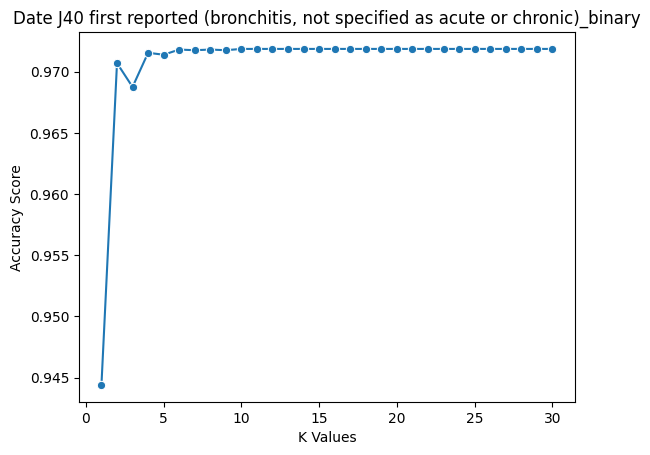

Date J41 first reported (simple and mucopurulent chronic bronchitis)_binary
Accuracy: 0.9978925184404637


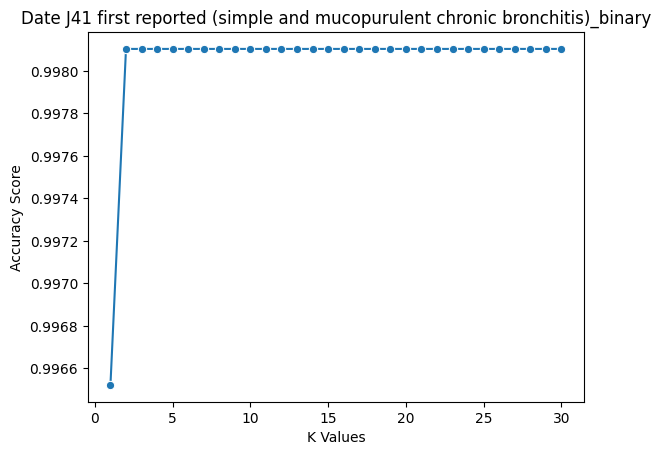

Date J42 first reported (unspecified chronic bronchitis)_binary
Accuracy: 0.9978925184404637


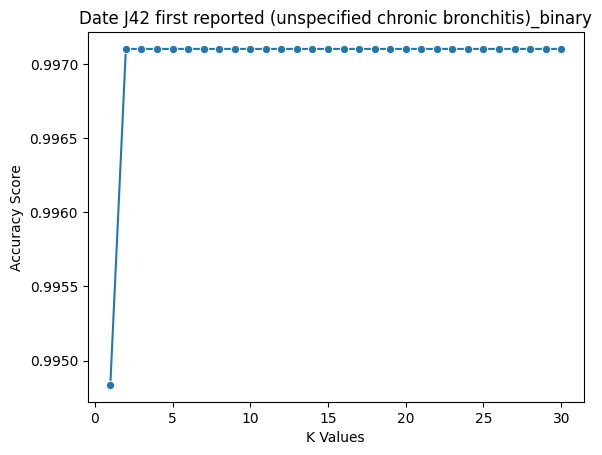

Date J43 first reported (emphysema)_binary
Accuracy: 0.934668071654373


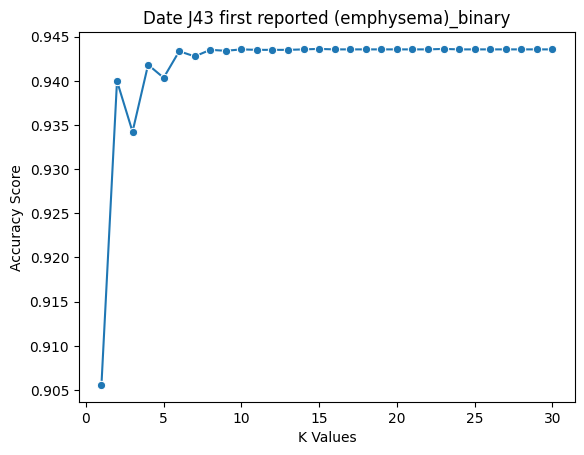

Date J44 first reported (other chronic obstructive pulmonary disease)_binary
Accuracy: 0.7663329820864068


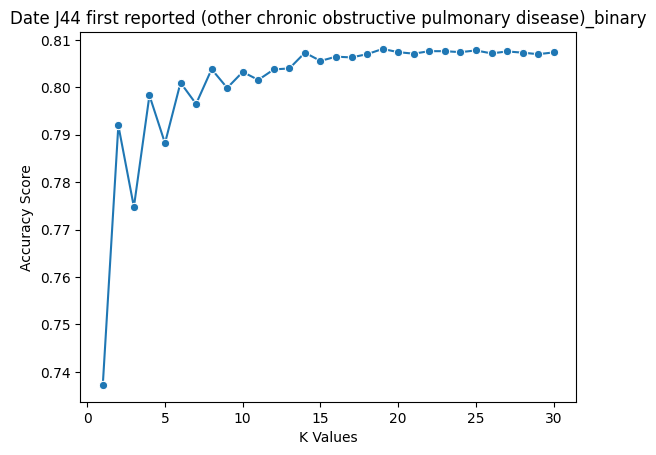

Date J47 first reported (bronchiectasis)_binary
Accuracy: 0.9831401475237092


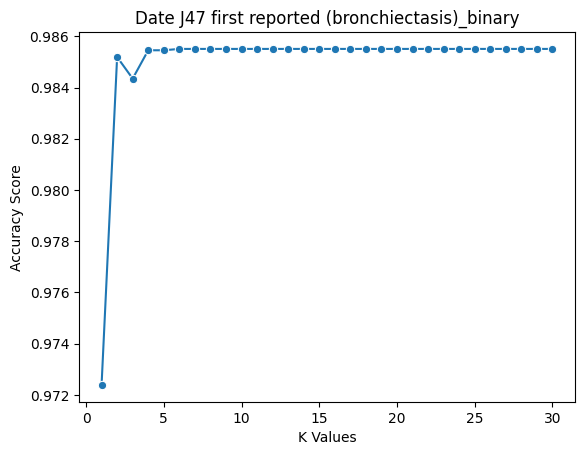

In [286]:
for i in c:
    print(i)
    # Split the data into features (X) and target (y)
    tdf = df[datacolumns_selected+[i]].dropna()
    X = tdf[datacolumns_selected]
    y = tdf[i]
    
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Scale the features using StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    k_values = [i for i in range (1,31)]
    scores = []
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        score = cross_val_score(knn, X, y, cv=5)
        scores.append(np.mean(score))

    sns.lineplot(x = k_values, y = scores, marker = 'o')
    plt.xlabel("K Values")
    plt.ylabel("Accuracy Score")
    plt.title(i)
    plt.show()

In [287]:
datacolumns_selected =[
 'Pack years of smoking',
 'Pack years adult smoking as proportion of life span exposed to smoking',
'Sex',
'Number of cigarettes previously smoked daily',
'Age at recruitment',
'Body mass index (BMI) | Instance 0',
'Standing height | Instance 0',
'allergy',
 'rhinitis',
 'eczema',
'asbestosis',
 'chronic_sinusitis',
 'nasal_polyps',
 'nasal_sinus_disorder',
 'pneumonia',
 'Hayfever_allergic_rhinitis_eczema_doctor',
'Haemoglobin concentration | Instance 0',
'Diastolic blood pressure, automated reading | Instance 0 | Array 0',
 'Systolic blood pressure, automated reading | Instance 0 | Array 0',
'Brisk pace',
 'Slow pace',
 'Steady average pace',
'Summed MET minutes per week for all activity | Instance 0',
'Summed minutes activity | Instance 0',
'Vitamin D | Instance 0',
'C-reactive protein | Instance 0',
'Cholesterol | Instance 0',
'Glycated haemoglobin (HbA1c) | Instance 0',
'Albumin | Instance 0',
'IGF-1 | Instance 0',
'Eosinophill count | Instance 0',
'Neutrophill count | Instance 0',
'Lymphocyte count | Instance 0',
'Doctor diagnosed asthma',
'Age started smoking in former smokers'
]

Date J40 first reported (bronchitis, not specified as acute or chronic)_binary
Accuracy: 0.975791005899027


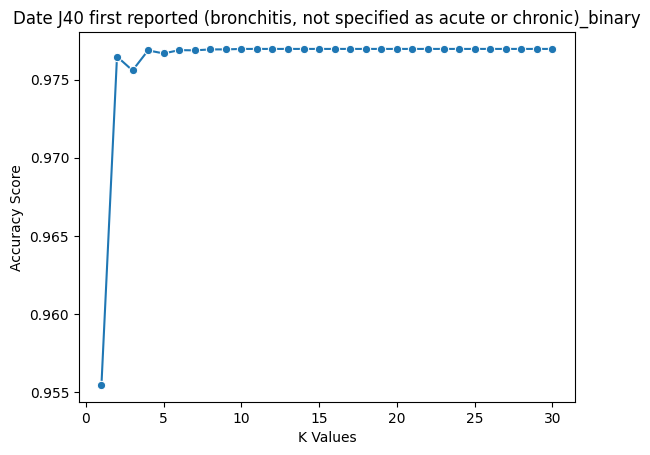

Date J41 first reported (simple and mucopurulent chronic bronchitis)_binary
Accuracy: 0.9997701677775224


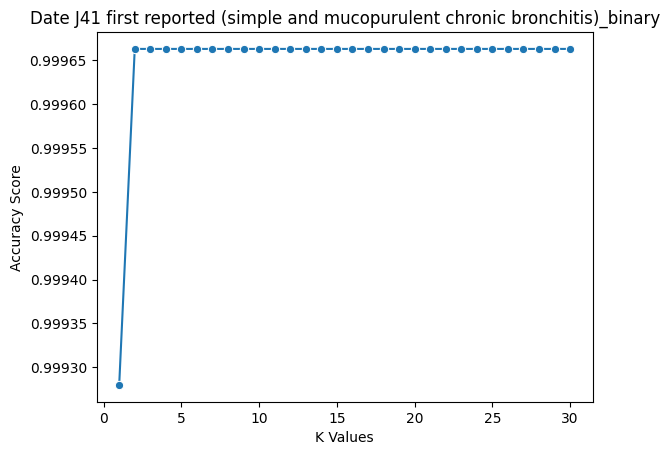

Date J42 first reported (unspecified chronic bronchitis)_binary
Accuracy: 0.9976250670343982


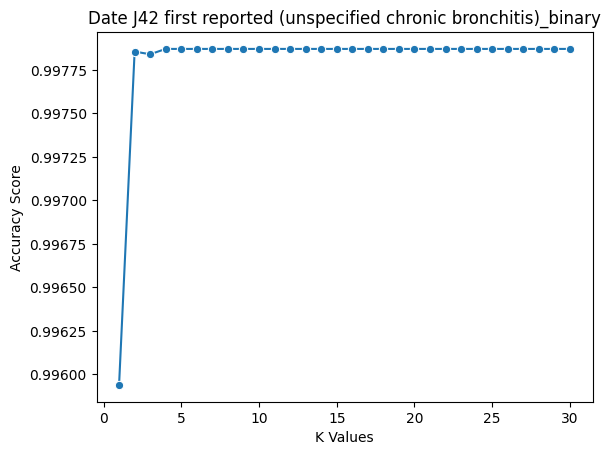

Date J43 first reported (emphysema)_binary
Accuracy: 0.9774764421971961


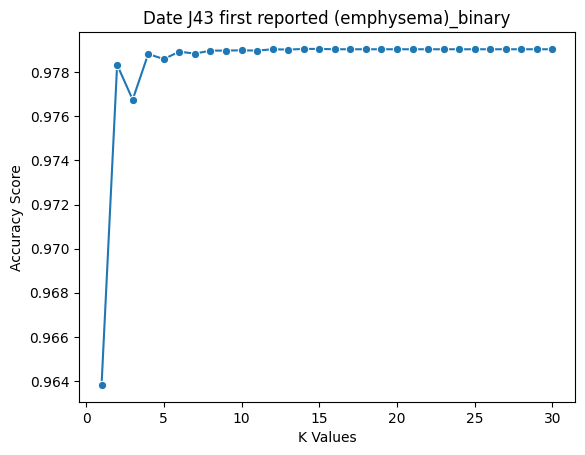

Date J44 first reported (other chronic obstructive pulmonary disease)_binary
Accuracy: 0.9030874128552823


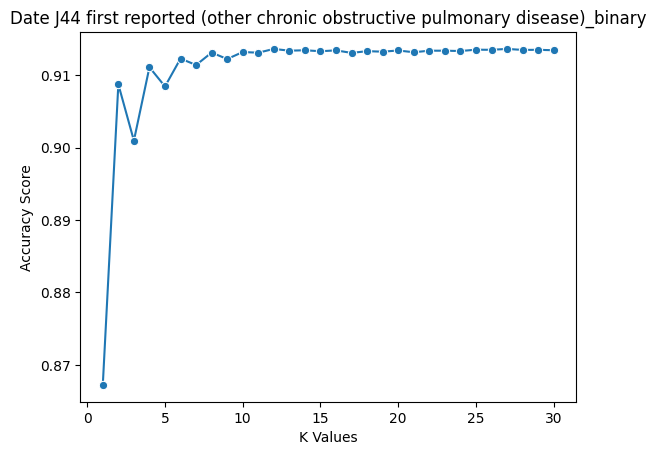

Date J47 first reported (bronchiectasis)_binary
Accuracy: 0.9796215429403202


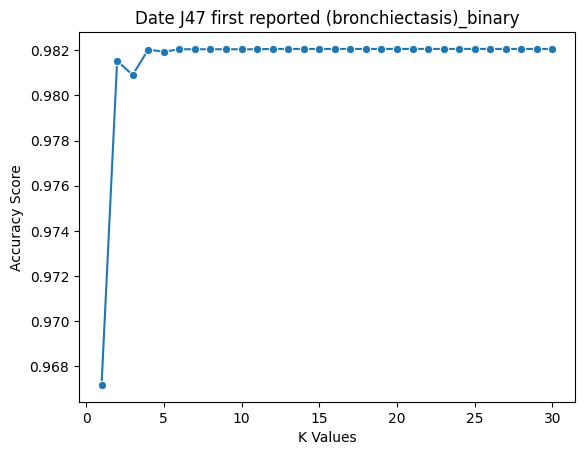

In [288]:
for i in c:
    print(i)
    # Split the data into features (X) and target (y)
    tdf = df[datacolumns_selected+[i]].dropna()
    X = tdf[datacolumns_selected]
    y = tdf[i]
    
    # Split the data into training and test sets
    
    
    # Scale the features using StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    k_values = [i for i in range (1,31)]
    scores = []
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        score = cross_val_score(knn, X, y, cv=5)
        scores.append(np.mean(score))

    sns.lineplot(x = k_values, y = scores, marker = 'o')
    plt.xlabel("K Values")
    plt.ylabel("Accuracy Score")
    plt.title(i)
    plt.show()

### Future diagnosed only

In [289]:
df['Date of attending assessment centre | Instance 0']= pd.to_datetime(df['Date of attending assessment centre | Instance 0'])

In [290]:
def binary_assesment(l):
    if l[0] > l[1] and not pd.isnull(l[0]) and not pd.isnull(l[1]):
        return 1
    return 0
df["binary_assesment"] = df[["all_copd_date", 'Date of attending assessment centre | Instance 0']].apply(binary_assesment, 1)

In [291]:
df["binary_assesment"].value_counts()

0    478497
1     23837
Name: binary_assesment, dtype: int64

In [292]:
print(df[(df["all_copd"]==1) & (df["binary_assesment"] == 1)].shape)
print(df[(df["all_copd"]==1) & (df["binary_assesment"] == 0)].shape)

(23837, 461)
(18124, 461)


In [220]:
df['Age of stopping smoking'].unique()[:5]

array([nan, 42., 23., 60., 68.])

In [250]:
df.columns.tolist()

['Participant ID',
 'Date J40 first reported (bronchitis, not specified as acute or chronic)',
 'Date J41 first reported (simple and mucopurulent chronic bronchitis)',
 'Date J42 first reported (unspecified chronic bronchitis)',
 'Date J43 first reported (emphysema)',
 'Date J44 first reported (other chronic obstructive pulmonary disease)',
 'Date J47 first reported (bronchiectasis)',
 'Date J40 first reported (bronchitis, not specified as acute or chronic)_binary',
 'Date J41 first reported (simple and mucopurulent chronic bronchitis)_binary',
 'Date J42 first reported (unspecified chronic bronchitis)_binary',
 'Date J43 first reported (emphysema)_binary',
 'Date J44 first reported (other chronic obstructive pulmonary disease)_binary',
 'Date J47 first reported (bronchiectasis)_binary',
 'all_copd',
 'all_copd_date',
 'Date of attending assessment centre | Instance 0',
 'Date of attending assessment centre | Instance 1',
 'Date of attending assessment centre | Instance 2',
 'Date of a